# Modeling | News ( HK NLP Project )

# Table of Contents<a id='#home'></a>
* [5.0 Modelling](#mod)
  * [5.1 Contents](#contents)
    * [5.1.1 Libraries](#pp_lib)
    * [5.1.2 DataFrame Imports](#pp_dfs)
    * [5.1.3 Modelling DataFrame](#pp_df)
  * [5.2 Setting the Stage for Clustering](#ssfc)
    * [5.2 Title pyLDAvis](#mod_t_pyLDAvis)
      * [5.2.1  Lemmatization](#mod_t_lemming)
      * [5.2.2  Stop Word Removal](#mod_t_swr)
      * [5.2.3  Bag of Words](#mod_t_bow)
      * [5.2.4 LdaModeling](#mod_t_ldam)   
      * [5.2.5 Bigrams](#mod_t_bgrams)
      * [5.2.6 TfidF](#mod_t_gen_tfidf)
      * [5.2.7 Coherence Score](#mod_t_cscore)
      
      
      
      
      
      
      * [5.2.8 Words in Topics](#mod_t_words_in_t)
      * [5.2.9 Topics Distribution](#mod_t_top_dist)
      * [5.2.10 Reading Between the Lines](#mod_t_between)
        * [5.2.10.1 RBL Title Topics](#mod_t_rdl)
        * [5.2.10.2 RBL All Title Topics : Initial Summary](#mod_t_rbl_all)
        * [5.2.10.3 RBL All Title Topics : Initial Review](#mod_t_rbl_all_int_rev)
        * [5.2.10.4 Sentiment Intensity Analyzer](#mod_t_rbl_all_sia)

  * [5.3 Project Summary](#project_summary)



# **2.1 Contents & Imports**<a id='contents'></a>

Here we will do Pre-Processing & Modeling Based on what we could initially see from EDA, **we will examine different ideas whereby we can potentially cluster Topics** successfully to give us a clearer idea of what Topics were reported.

As a reminder, **we have five (5) data frames to start**; notably:
   * **Main |** The main data frame with the data untouched with no new additions.
     * `news`
   * **TfidfVectorizer (Title) |** The data frame with TfidfVectorizer used on the Title.
     * `news_title_tfidf`
   * **TfidfVectorizer (Article) |**  The data frame with TfidfVectorizer used on the Article.
     * `news_article_tfidf`
   * **CountVectorizer (Title) |**  The data frame with CountVectorizer used on the Title.
     * `news_title_cvec`
   * **CountVectorizer (Article) |** The data frame with CountVectorizer used on the Article.
     * `news_article_cvec`

**Three (5) new additional data frames will be created** to place the **combined Title & Article as one column** as below:

   * **Main (Combined) |** The main data drame with the Title & Article combined as one column.
     * `news_c`
   * **TfidfVectorizer (Combined) |** The news_article_tfidf data drame with the Title & Article combined as one column.
     * `news_tfidf_c`
   * **CountVectorizer (Combined) |** The news_article_cvec data drame with the Title & Article combined as one column.
     * `news_cvec_c`

**Our overall findings will be found in the section below**:
   * [5.3 Project Summary](#p_summary)

In the **process of Clustering the data will be passed through the below before the it gets to pyLDAvis**:

   * Stop Word Re-Removal, 
   * Lemmatization & 
   * Bag of Words 

Once complete, **pyLDAvis will help better visualize potential clustering.** Please note, **for those looking at this on GitHub**, my apologies but **pyLDAvis doesn't show up there. You will see the output in the**: 
   * Report &
   * Presentations

Please also note, the word **"Hong Kong"** may be referred to as **"HK"**; I would just like to clarify this.

<a id='pp_lib'></a>**Libraries**

In [1]:
# Main Imports
import os
import sys
import json
import glob
import statistics
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib import pyplot

%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
import enchant 
import wget
import zipfile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# NLP Imports
import re
import string
import requests
import urllib.request
import nltk
import pickle
import emoji
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, MmCorpus
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.language import Language


from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
import en_core_web_sm
nltk.download("stopwords")
stop = stopwords.words('english')
stops =  set(stopwords.words('english')+['com'])
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

%watermark -d -t -v -p pandas
print('Complete')

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.10.0

pandas: 1.2.4

Complete


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='pp_dfs'></a>**DataFrame Imports** | Here we will import the data frames built during Data Wrangling and used during Exploratory Data Analytics (EDA). We will also ensure they are clean here.

In [2]:
cd

C:\Users\rands


In [3]:
# news is the main dataframe
news = pd.read_csv('./_Capstone_Two_NLP/data/_news/_main_holdings/news_bf_regex.csv')

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   30 non-null     object
 1   date        30 non-null     object
 2   source      30 non-null     object
 3   country     30 non-null     object
 4   local       30 non-null     object
 5   title       30 non-null     object
 6   article     30 non-null     object
 7   word_count  30 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


**`News` Data Defined** | Clean import confirmed. First explain the data.

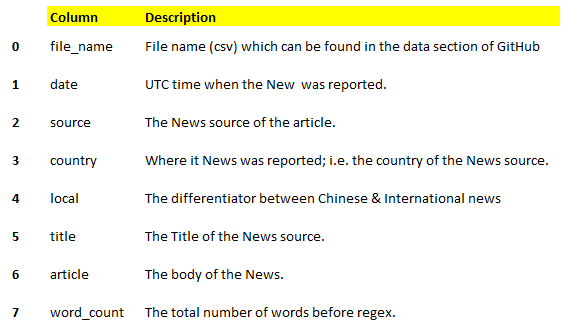

**TfidfVectorizer Imports** | Both for the Titles & Articles

In [5]:
# News titles TfidfVectorizer
news_title_tfidf = pd.DataFrame([])
news_title_tfidf = pd.read_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_title_tfidf.xlsx')
news_title_tfidf = news_title_tfidf.reset_index()
news_title_tfidf = news_title_tfidf.drop(columns=['Unnamed: 0','index'])

In [6]:
news_title_tfidf.head(1)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174,...,0.0,0.0,0.0,0.528091,0.0,0.0,0.699405,0.0,0.0,0.0


**`TfidfVectorizer` Data Defined** | We will hold on on info as there are a lot of words for columns. We have a clean imported dataframe. We will first explain some news additions That were:
   * comp_title
   * neg_title
   * neu_title
   * pos_title

These apply to the Titles of the news articles. **We will see the same with the articles but with different number's**. They originate from Sentiment Analysis in a **the process of ‘computationally’ determining the the percent probabilities of whether a title is one of the below**: 
   * comp | This is the actual score. The higher the more positive it is
   * neg | The allocation of negative to the 'comp score'
   * neu | The allocation of neutral / "tbc" to the 'comp score'
   * pos | The allocation of positive to the 'comp score' 

It’s also known as opinion mining, deriving the opinion or attitude of the author / news source. **The probabilities of the last three (3) add up to 100%.**

In [7]:
# News articles TfidfVectorizer
news_article_tfidf = pd.DataFrame([])
news_article_tfidf = pd.read_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_article_tfidf.xlsx')
news_article_tfidf = news_article_tfidf.reset_index()
news_article_tfidf = news_article_tfidf.drop(columns=['Unnamed: 0','index'])

**CountVectorizer Imports** | Both for the Titles & Articles 

In [8]:
# News titles CountVectorizer
news_title_cvec = pd.DataFrame([])
news_title_cvec = pd.read_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_title_cvec.xlsx')
news_title_cvec = news_title_cvec.reset_index()
news_title_cvec = news_title_cvec.drop(columns=['Unnamed: 0','index'])

In [9]:
# News articles CountVectorizer
news_article_cvec = pd.DataFrame([])
news_article_cvec = pd.read_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_article_cvec.xlsx')
news_article_cvec = news_article_cvec.reset_index()
news_article_cvec = news_article_cvec.drop(columns=['Unnamed: 0','index','level_0'])

**Cleaning** | Brilliant, let's ensure those are all clean.

In [10]:
print('Printing out to ensure no Null Values (all shld be False)','\n',news.isnull().values.any(),'| Main','\n',
        news_title_tfidf.isnull().values.any(),'| Tfidf (Title)','\n',
        news_article_tfidf.isnull().values.any(),'| Tfidf (Article)','\n',
        news_title_cvec.isnull().values.any(),'| CountVec (Title)','\n',
        news_article_cvec.isnull().values.any(),'| CountVec (Article)'
     )

Printing out to ensure no Null Values (all shld be False) 
 False | Main 
 False | Tfidf (Title) 
 False | Tfidf (Article) 
 False | CountVec (Title) 
 False | CountVec (Article)


Clean. Let's model combine the Title & Article as one column for the selected data frames.

In [11]:
news_c = pd.DataFrame([])
news_c = news.copy()
news_c['text_c'] = news_c[['title', 'article']].agg(' '.join, axis=1)

In [12]:
news_c.head(1)

,file_name,date,source,country,local,title,article,word_count,text_c
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,15490,Hong Kong security law: What is it and is it w...


In [13]:
print('Confirming it worked correctly:','\n',
     'Title   |', news_c['title'][0][0:54],'\n',
     'Article |', news_c['article'][0][0:31],'\n',
     'text_c  |', news_c['text_c'][0][0:86]
     )

Confirming it worked correctly: 
 Title   | Hong Kong security law: What is it and is it worrying? 
 Article | China has passed a wide-ranging 
 text_c  | Hong Kong security law: What is it and is it worrying? China has passed a wide-ranging


Main worked

In [14]:
# news_tfidf_c
news_tfidf_c = pd.DataFrame([])
news_tfidf_c = news_article_tfidf.copy()
news_tfidf_c['title'] = news_c['title'].copy()
news_tfidf_c['text_c'] = news_tfidf_c[['title', 'article']].agg(' '.join, axis=1)

In [15]:
print('Confirming it worked correctly:','\n',
     'Title   |', news_tfidf_c['title'][0][0:54],'\n',
     'Article |', news_tfidf_c['article'][0][0:25],'\n',
     'text_c  |', news_tfidf_c['text_c'][0][0:81]
     )

Confirming it worked correctly: 
 Title   | Hong Kong security law: What is it and is it worrying? 
 Article | China passed wide-ranging 
 text_c  | Hong Kong security law: What is it and is it worrying? China passed wide-ranging 


Tfidf worked

In [16]:
# news_tfidf_c
news_cvec_c = pd.DataFrame([])
news_cvec_c = news_article_cvec.copy()
news_cvec_c['title'] = news_c['title'].copy()
news_cvec_c['text_c'] = news_cvec_c[['title', 'article']].agg(' '.join, axis=1)

In [17]:
print('Confirming it worked correctly:','\n',
     'Title   |', news_tfidf_c['title'][0][0:54],'\n',
     'Article |', news_tfidf_c['article'][0][0:25],'\n',
     'text_c  |', news_tfidf_c['text_c'][0][0:81]
     )

Confirming it worked correctly: 
 Title   | Hong Kong security law: What is it and is it worrying? 
 Article | China passed wide-ranging 
 text_c  | Hong Kong security law: What is it and is it worrying? China passed wide-ranging 


Count Vectorizer worked

**Cleaning** | Brilliant, let's ensure those are all clean.

In [18]:
print('Printing out to ensure no Null Values (all shld be False)','\n',news.isnull().values.any(),'| Main (Combined)','\n',
        news_c.isnull().values.any(),'| Tfidf (Combined)','\n',
        news_cvec_c.isnull().values.any(),'| CountVec (Combined)'
     )

Printing out to ensure no Null Values (all shld be False) 
 False | Main (Combined) 
 False | Tfidf (Combined) 
 False | CountVec (Combined)


**`news_c` Data Defined** | Clean import confirmed. First explain the data.

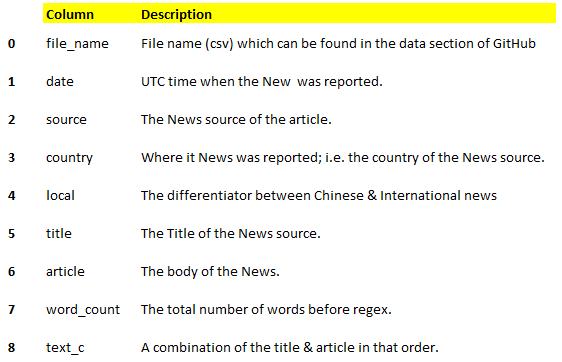

# 5.2 Setting the Stage for Clustering<a id='ssfc'></a>

**We will undertake the Clustering on `news_tfidf_c`** & use `news_cvec_c` if & when required.

We will provide a brief explaination of the tool for clustering which is pyLDAvis:
   * pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

**For those looking at this on GitHub**, my apologies but **pyLDAvis doesn't show up there. You will see the output in the**: 
   * Report &
   * Presentations


<a id='mod_t_pyLDAvis'></a>**Title pyLDAvis** | We will start with the Titles; we will start by setting up a new Data Frame to ensure the original is not disturbed.

In [19]:
df_clus = news_tfidf_c.copy()
#lowercasing the words in the tweets
df_clus['text_c'] = df_clus['text_c'].str.lower()
#removing punctuation
df_clus['text_c'] = df_clus['text_c'].str.replace('[^\w\s]','')
#removing numbers
df_clus['text_c'] = df_clus['text_c'].str.replace('\d+', '')

<>:5: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \d
<ipython-input-19-42dcc48063dc>:5: DeprecationWarning: invalid escape sequence \w
  df_clus['text_c'] = df_clus['text_c'].str.replace('[^\w\s]','')
<ipython-input-19-42dcc48063dc>:7: DeprecationWarning: invalid escape sequence \d
  df_clus['text_c'] = df_clus['text_c'].str.replace('\d+', '')


In [20]:
df_clus['text_c'][0]

'hong kong security law what is it and is it worrying china passed wideranging new security law hong kong makes easier punish protesters reduces citys autonomy critics called the end hong kong  know people fear most hong kong always meant security law could never pass one unpopular so china stepping ensure city legal framework deal sees serious challenges authority the details laws  articles kept secret passed it criminalises act of secession  breaking away countrysubversion  undermining power authority central governmentterrorism  using violence intimidation peoplecollusion foreign external forces the law came effect  local time  june hour rd anniversary citys handover china british rule it gives beijing powers shape life hong kong never before critics say effectively curtails protest freedom speech  china said return stability the new laws key provisions include that crimes secession subversion terrorism collusion foreign forces punishable maximum sentence life prisondamaging public 

In [21]:
print(len(df_clus),'| There should be 30')

30 | There should be 30


In [22]:
print(df_clus['title'].isnull().sum(), '| We should have Zero null values')

0 | We should have Zero null values


<a id='mod_t_lemming'></a>**Lemmatization**

In [23]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized = lemmatization(df_clus['text_c'])
print(lemmatized[0][0:90])

hong kong security law be be worry china pass widerange new security law hong kong make ea


<a id='mod_t_swr'></a>**Stop Word Removal** | Reduce text to individual words & double confirm stop words have been removed.

In [24]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True) #deacc is a boolean for accent words; may have so it's true
        final.append(new)
    return (final)

data_words = gen_words(lemmatized)

print(data_words[1][0:20])

['hong', 'kong', 'new', 'security', 'law', 'why', 'scare', 'people', 'china', 'introduce', 'new', 'national', 'security', 'law', 'hong', 'kong', 'bbc', 'bristow', 'take', 'close']


In [25]:
len(data_words[0])

553

<a id='mod_t_bow'></a>**Bag of Words**

In [26]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print (corpus[1][0:20])

[(9, 2), (11, 3), (19, 9), (20, 1), (23, 3), (26, 1), (31, 1), (33, 1), (35, 2), (41, 1), (42, 3), (48, 1), (49, 10), (51, 5), (55, 2), (57, 1), (65, 2), (72, 1), (73, 1), (74, 2)]


That list of arrays doesn't make much sense to us humans so I will show you what the first array means for reference.

In [27]:
word = id2word[[1][:][0]]
print(word)

activist


<a id='mod_t_ldam'></a>**LdaModeling** | We now have a dictionary to lookup words & their frequency. We will start with 20 topics.

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=20,    # this may result for a lot in the "mistake" topic
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the data of the LdaModeling.

In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.134525 -0.076816       1        1  55.223065
1     -0.257225 -0.059011       2        1  23.383573
5     -0.005853 -0.266477       3        1   8.509122
4     -0.156339 -0.187520       4        1   4.806812
3      0.085545  0.286142       5        1   2.986935
15    -0.192272  0.034063       6        1   2.613542
13    -0.140112  0.164277       7        1   2.425014
14     0.056222  0.006355       8        1   0.004213
7      0.057464  0.006908       9        1   0.004189
9      0.058956  0.007626      10        1   0.004148
6      0.060795  0.007929      11        1   0.004122
18     0.061788  0.008228      12        1   0.004101
19     0.062943  0.008443      13        1   0.004033
10     0.060781  0.007596      14        1   0.004021
16     0.062829  0.008571      15        1   0.003964
0      0.063104  0.008520      16        1   0.003951
12     0.063119  0.008642      17        1   0.003893
8      0.063955  0.008754      18        1   0.003861
17     0.064255  0.008859      19        1   0.003721
2      0.064572  0.008913      20        1   0.003720, topic_info=          Term        Freq       Total Category  logprob  loglift
136       hong  597.000000  597.000000  Default  30.0000  30.0000
162       kong  590.000000  590.000000  Default  29.0000  29.0000
166        law  444.000000  444.000000  Default  28.0000  28.0000
49       china  290.000000  290.000000  Default  27.0000  27.0000
187   national  277.000000  277.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
11        also    0.000207   71.697766  Topic20  -8.0472  -2.5551
1514      side    0.000203   13.078400  Topic20  -8.0653  -0.8716
25       basic    0.000206   40.567875  Topic20  -8.0544  -1.9928
157       june    0.000206   38.861136  Topic20  -8.0549  -1.9504
179       make    0.000205   62.897143  Topic20  -8.0585  -2.4354

[1532 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2610      7  0.989193     abscond
2991      3  0.836911       abuse
2993      3  0.836698  accurately
1832      1  0.191752  accusation
1832      3  0.191752  accusation
...     ...       ...         ...
3265      6  1.111978     zhanshu
1131      1  0.076884        zhao
1131      2  0.076884        zhao
1131      3  0.845721        zhao
3206      3  0.956066         zte

[1073 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 2, 6, 5, 4, 16, 14, 15, 8, 10, 7, 19, 20, 11, 17, 1, 13, 9, 18, 3])

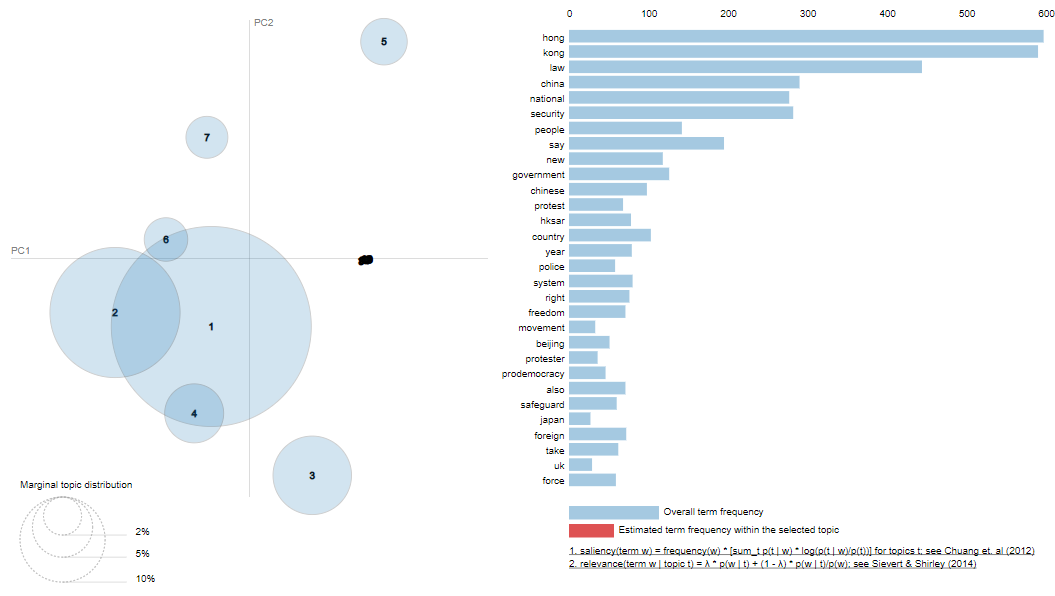

To reiterate, my apologies **pyLDAvis doesn't show up for those looking at this on GitHub**. You will see the output in the: 
   * Report &
   * Presentations

For our first round with 20 topics, we will outline what is observed:
   * The area of each circle represents the importance of the topic relative to `corpus`
   * We have 30 Topics thus 30 circles
     * Circles numbered 8+ are very small suggesting they aren't important 
   * The distance between the center of the circles indicates the similarity between the topics
     * Topic 1 shares common words with Topic's 4 & 6
   * On the right side, the Top 30 identified words for each Topic are outlined


<a id='mod_t_bgrams'></a>**Bigrams** | There are a lot of words that aren't really words with a lot of meaning or helping us much. We will now see how **Bigrams** & **Trigrams** (a collection of words) present clusters.

In [30]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=3)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=3)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [31]:
print(data_bigrams_trigrams[16][0:8])

['hong_kong', 'national_security_law', 'help', 'ensure', 'longterm', 'stability', 'country_system', 'june']


For reference, the below was the original. You may compare that to the bigram & trigram restructure above.

In [32]:
df_clus['title'][16]

'Hong Kong national security law helps ensure long-term stability of "one country, two systems"'

Let's start working with gensim & TfidF

In [33]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


As our previous round of LdaModel conveyed that +8 topics didn't show much, **we will limit the new pyLDAvis to 7.**

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=7,    # this may result for a lot in the "mistake" topic
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.072751  0.002602       1        1  48.234740
5     -0.013787 -0.158509       2        1  20.219946
1     -0.161729 -0.025427       3        1  14.100077
4     -0.044955  0.158542       4        1  10.957143
3      0.110870 -0.071255       5        1   2.596176
0      0.135782  0.072452       6        1   2.556422
2      0.046571  0.021594       7        1   1.335496, topic_info=                      Term        Freq       Total Category  logprob  loglift
136              hong_kong  442.000000  442.000000  Default  30.0000  30.0000
167                    law  164.000000  164.000000  Default  29.0000  29.0000
254                    say  175.000000  175.000000  Default  28.0000  28.0000
231                protest   60.000000   60.000000  Default  27.0000  27.0000
191  national_security_law   68.000000   68.000000  Default  26.0000  26.0000
..                     ...         ...         ...      ...      ...      ...
28                 beijing    0.626086   47.465833   Topic7  -5.7782  -0.0124
167                    law    0.644593  164.616577   Topic7  -5.7490  -1.2269
213                 people    0.385304   89.528677   Topic7  -6.2636  -1.1324
122             government    0.360860   64.700640   Topic7  -6.3292  -0.8732
191  national_security_law    0.346889   68.554271   Topic7  -6.3686  -0.9705

[493 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1390      2  0.934425          abe
2710      5  0.914571      abscond
3098      2  0.733122   accordance
3098      6  0.244374   accordance
1778      1  0.536281      account
...     ...       ...          ...
317       3  0.108792         year
317       4  0.130550         year
3376      4  0.902324      zhanshu
1182      1  0.084601  zhao_lijian
1182      2  0.846009  zhao_lijian

[842 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 5, 4, 1, 3])

Bigrams & Trigrams present themselves on what I believe are the correct ones; notably:
   * hong_kong
   * china
   * national_security
   * national_security_law

Further to this, we have x7 clearly defined clusters. Numbers 1 & 3 have moderate overlap. The only reasonably distinction they have from the others are mentions of the protests.

Like anything, Data Science can be a science (as the name suggests) but it also has an art component. Picking how to properly configure so far has leaned more to the art side of the equation but we will add in a more mathematical / science side later.

We would normally update a Stop Word list but the above looks correct.

**Lemmatization**

In [36]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(df_clus['title'])
print(lemmatized_texts[12][0:90])

security law pro - democracy book pull library


**Bag of Words**

In [37]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print(corpus[1][0:20])

[(9, 2), (11, 3), (19, 9), (20, 1), (23, 3), (26, 1), (31, 1), (33, 1), (35, 2), (41, 1), (42, 3), (48, 1), (49, 10), (51, 5), (55, 2), (57, 1), (65, 2), (72, 1), (73, 1), (74, 2)]


That list of arrays doesn't make much sense to us humans so I will show you what it means for reference.

In [38]:
print([(id2word[idx] , freq) for idx, freq in corpus[7][0:10]])

[('act', 1), ('activist', 1), ('affect', 1), ('afraid', 1), ('agreement', 1), ('also', 1), ('apply', 2), ('ask', 1), ('authority', 1), ('autonomy', 3)]


We now have a dictionary to lookup words & their frequency.

In [39]:
print('',len(corpus),'  | Observations total #','\n',
     len(id2word), ' | Words total #')

 30   | Observations total # 
 3331  | Words total #


In this round of LdaModel, we will also limit to 7 topics.

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=7,    # this may result for a lot in the "mistake" topic
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the Tweet Data

In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.099918 -0.007712       1        1  56.979587
5     -0.014921 -0.127990       2        1  17.816720
4     -0.131401 -0.043679       3        1   9.642396
6     -0.067826  0.125232       4        1   8.092247
3      0.123580 -0.092883       5        1   7.464438
2      0.097198  0.073877       6        1   0.002921
0      0.093289  0.073155       7        1   0.001691, topic_info=             Term        Freq       Total Category  logprob  loglift
49          china  270.000000  270.000000  Default  30.0000  30.0000
136          hong  572.000000  572.000000  Default  29.0000  29.0000
162          kong  565.000000  565.000000  Default  28.0000  28.0000
166           law  428.000000  428.000000  Default  27.0000  27.0000
246           say  180.000000  180.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
219  prodemocracy    0.000107   43.906591   Topic7  -7.9239  -1.9414
214         power    0.000105   35.299561   Topic7  -7.9371  -1.7364
389   legislation    0.000106   48.307236   Topic7  -7.9261  -2.0391
117       freedom    0.000108   66.238269   Topic7  -7.9108  -2.3395
114         force    0.000106   56.903124   Topic7  -7.9275  -2.2043

[547 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1832      1  0.100028  accusation
1832      2  0.300083  accusation
1832      4  0.100028  accusation
1832      5  0.500139  accusation
1774      3  0.739478     acquire
...     ...       ...         ...
310       5  0.136807        year
3315      3  0.942293    yiuchung
1131      1  0.079311        zhao
1131      2  0.793109        zhao
1131      4  0.079311        zhao

[733 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 7, 4, 3, 1])

This moved Topics numbered 1 & 3 closer together. It also made numbers 6 & 7 smaller or more irrelevant. Things to keep in mind.

Let's run one last gensim & TfidF Topic review.

<a id='mod_t_gen_tfidf'></a>**TfidF** | Let's start working with gensim & TfidF

In [42]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=3)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=3)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [43]:
print(data_bigrams_trigrams[16][0:9])

['hong_kong', 'national_security_law', 'help', 'ensure', 'longterm', 'stability', 'country_system', 'june', 'stand_committee_national_people']


In [44]:
df_clus['title'][16]

'Hong Kong national security law helps ensure long-term stability of "one country, two systems"'

**The phrase "one country, two systems" has been changed to country_system.** Certainly something to remember later.

In [45]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


In [46]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=6,    # this may result for a lot in the "mistake" topic
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.010997  0.019017       1        1  35.677789
5      0.143613  0.029723       2        1  32.657606
1     -0.154390  0.034559       3        1  16.322271
3      0.065255 -0.114840       4        1   7.102437
0      0.016516  0.123378       5        1   4.237148
2     -0.059998 -0.091836       6        1   4.002750, topic_info=                      Term        Freq       Total Category  logprob  loglift
136              hong_kong  429.000000  429.000000  Default  30.0000  30.0000
191  national_security_law   63.000000   63.000000  Default  29.0000  29.0000
167                    law  159.000000  159.000000  Default  28.0000  28.0000
254                    say  169.000000  169.000000  Default  27.0000  27.0000
115                freedom   35.000000   35.000000  Default  26.0000  26.0000
..                     ...         ...         ...      ...      ...      ...
317                   year    1.981781   43.613717   Topic6  -5.7236   0.1268
213                 people    2.105065   86.487906   Topic6  -5.6632  -0.4975
293                   time    1.806857   33.395883   Topic6  -5.8160   0.3013
10                    also    1.948428   64.538130   Topic6  -5.7405  -0.2820
611                 police    1.829219   41.581319   Topic6  -5.8037   0.0944

[444 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
486       1  0.409352       accord
486       2  0.341127       accord
486       4  0.136451       accord
486       5  0.136451       accord
486       6  0.068225       accord
...     ...       ...          ...
317       5  0.022929         year
317       6  0.045857         year
3376      4  0.493199      zhanshu
1182      1  0.082100  zhao_lijian
1182      2  0.903099  zhao_lijian

[845 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 4, 1, 3])

For this round with 6 topics, we will outline what is observed visually:
   * The **sizes look to be reasonably similar**
   * The **distance between the center for all less the first circle indicates they are distinct**
     * A closer look at #1 may be required
   * On the right side, **the top words & trigrams to be the following for each topic**:
     * **Topic 1** | protest, prodemocracy & freedom
     * **Topic 2** | country, foreign, uk & international
     * **Topic 3** | police, movement & protestor
     * **Topic 4** | bbc, chinese_scholar & peaceful
     * **Topic 5** | hksar, hong_kong_special_administrative & hksar_government
     * **Topic 6** | freedom, prodemocracy & book


<a id='mod_t_cscore'></a>**Coherence Score** | Instead of a manual assignment, **we can use an iterative approach & build several models with differing numbers of topics to ultimately select the one that has the highest coherence score.**

We will first have to downgrade the genism to ensure this approach works.

In [48]:
# gensim uninstalled a lot of things (wrappers in this case ) so we must move back to version 3.8.3
!pip install gensim==3.8.3

In [49]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus,
                                                      texts=data_bigrams_trigrams,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

perplexity = -8.50105
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.3047453084701465
Model Perplexity: -8.50105


In [50]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=30, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        ldamodel = gensim.models.LdaModel(corpus=corpus,
                                          num_topics=topic_nums,
                                          id2word=id2word,
                                          random_state=47,
                                          iterations=500)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel,
                                                              corpus=corpus,
                                                              texts=texts,
                                                              dictionary=id2word,
                                                              coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(ldamodel)
    
    return models, coherence_scores

We will now run the previously defined `topic_model_coherence_generator` over 88 rounds.

In [51]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_bigrams_trigrams,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=88, step=1, cpus=4)


100%|██████████| 87/87 [21:33<00:00, 14.86s/it]


In [52]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 89, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)


,Number of Topics,Coherence Score
82,84,0.5486
84,86,0.5469
81,83,0.5399
80,82,0.5385
77,79,0.5363
86,88,0.5361
85,87,0.5346
64,66,0.5346
71,73,0.5320
76,78,0.5317


**The Coherence Score indicates that the optimal number of Topics is 84 mathematically**. That's a bit suprising but **let's visualize it**.

In [53]:
coherence_df['Coherence Score'].max()

0.5486

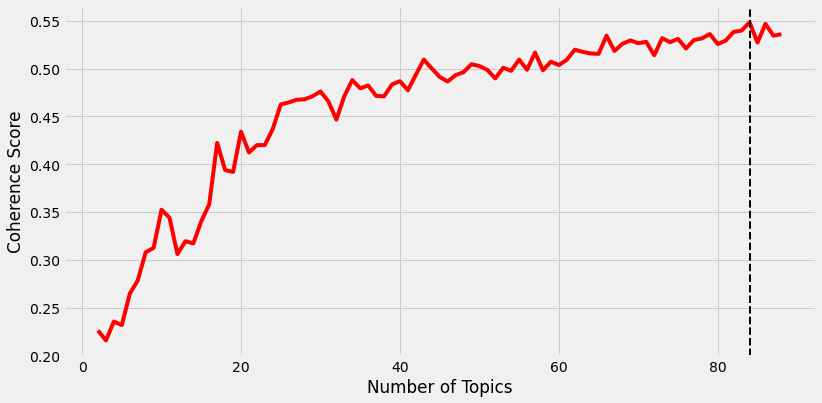

In [54]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 89, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=84, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
#plt.axvline((three_down), color='g', linewidth=2)

**Visually confirmed; we will use that** going forwards.

Let's see what **84** topics looks like with pyLDAvis.

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=84,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
23    -0.236862 -0.239270       1        1  16.104300
7      0.168712 -0.364718       2        1   9.798531
44    -0.129043 -0.322683       3        1   9.692405
69    -0.052181 -0.368180       4        1   8.547417
73     0.201963 -0.308336       5        1   7.803086
...         ...       ...     ...      ...        ...
46    -0.015910  0.034672      80        1   0.001846
52    -0.015918  0.034750      81        1   0.001839
1     -0.015895  0.034622      82        1   0.001831
12    -0.015919  0.034752      83        1   0.001789
67    -0.015919  0.034752      84        1   0.001749

[84 rows x 5 columns], topic_info=                      Term        Freq       Total Category  logprob  loglift
136              hong_kong  496.000000  496.000000  Default  30.0000  30.0000
49                   china  244.000000  244.000000  Default  29.0000  29.0000
254                    say  190.000000  190.000000  Default  28.0000  28.0000
167                    law  183.000000  183.000000  Default  27.0000  27.0000
191  national_security_law   80.000000   80.000000  Default  26.0000  26.0000
..                     ...         ...         ...      ...      ...      ...
25                     bbc    0.000077   27.279444  Topic84  -8.1441  -1.8245
26                      be    0.000077   15.738568  Topic84  -8.1441  -1.2745
27                  become    0.000077   16.769901  Topic84  -8.1441  -1.3379
28                 beijing    0.000077   53.054446  Topic84  -8.1441  -2.4897
29         beijingappointe    0.000077    2.291870  Topic84  -8.1441   0.6523

[6106 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1390      9  0.935474          abe
1319      1  0.969777      ability
688       2  0.912808       abroad
967      15  0.966133     academic
1904      7  0.945241       accept
...     ...       ...          ...
2709     16  0.872763        zhang
3376     13  0.957168      zhanshu
1182      6  0.884152  zhao_lijian
1182     15  0.073679  zhao_lijian
3315      6  0.882530          zte

[3311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 8, 45, 70, 74, 35, 44, 7, 30, 71, 27, 21, 25, 56, 9, 60, 49, 82, 67, 42, 66, 6, 12, 72, 79, 80, 36, 22, 16, 65, 57, 76, 59, 10, 29, 39, 50, 38, 32, 17, 51, 43, 61, 18, 63, 26, 5, 58, 54, 48, 14, 11, 69, 81, 33, 40, 41, 19, 73, 3, 62, 77, 46, 55, 34, 78, 28, 1, 23, 84, 20, 75, 37, 52, 31, 4, 64, 15, 83, 47, 53, 2, 13, 68])

To summarize what is visually presented:
   * Just about all topics have overlap
   * Topics 21+ are the closest to the center & also are small enough to be deemed as irrelevant
   * Due to the notable overlap, I won't go into detail about what is specific on each here

Although it's prudent to assume there can be more topics than the number of articles, more needs to be done on dimension reduction. We will start with segmenting the news into is based on how it presented itself in the Exploratory Data Analysis (EDA) section; notably there are four (4) categories:
   * Positive
     * China (dominant)
     * International
   * Negative
     * International (dominant)
     * China
   
We will run the same process on each.

**Sentiment Analysis Recap** | We will first provide a visual breakdown of what was observed in EDA before we begin.

In [57]:
# pulling in the TfidF Sentiment Scores
news_senti = pd.DataFrame([])
news_senti = news_article_tfidf['comp_article'].copy()

# The main Article
news_sa = pd.DataFrame([])
news_sa = news_c.copy()

# Bringing them together
news_sa = pd.concat([news_c,news_senti],
                    axis = 1, ignore_index=False)

In [58]:
news_sa.head(2)

,file_name,date,source,country,local,title,article,word_count,text_c,comp_article
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,15490,Hong Kong security law: What is it and is it w...,0.9878
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...,China has introduced a new national security l...,6021,Hong Kong's new security law: Why it scares pe...,-0.9435


Text(-9.504999999999995, 0.5, 'Sentiment Score (Comp)')

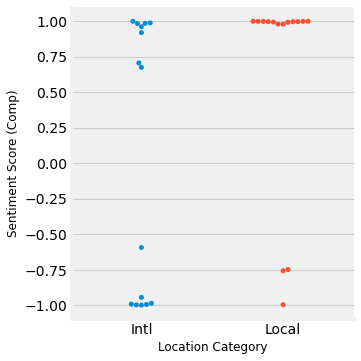

In [59]:
# as a reminder there was a notable dispartiy; meaning nothing close to the middle

sns.catplot(x="local", y="comp_article", kind="swarm", data=news_sa)
plt.xlabel('Location Category', fontsize=12)
plt.ylabel('Sentiment Score (Comp)', fontsize=12)

In [60]:
# adding a column for Positive or Negative based on a +0.5 or below 0.5
news_sa['Senti_position'] = np.where(news_sa['comp_article']>= 0.5, 'Positive', 'Negative')

We would build the x4 segments into:
   * Positive
     * China
     * International
   * Negative
     * International
     * China

We w would run the same process on each but to achieve a potentially better results **we will need to split each into a seperate row for each sentence within the `text_c` to identify the Topics more clearly.** This may be notably different than what is above but our goal is to get to the bottom of the Topics more clearly; **you may take a look at the Twitter dataframe to have a clearer understanding of what the potential goal is.**

In [61]:
# The main Article
news_sa = pd.DataFrame([])
news_sa = news_c.copy()

# We will split the dataframe by periods
news_sa = news_sa.drop('text_c', axis=1).join(news_sa['text_c'].str.split('.', expand=True).stack().reset_index(level=1, drop=True).rename('temp'))

# Dropping word_count as it's not longer applicable 
news_sa = news_sa.drop(columns=['word_count'])

# Resetting the index
news_sa = news_sa.reset_index()

# Droping the new column that always comes up when an index is reset
news_sa = news_sa.drop(columns=['index'])

In [62]:
# We will split the dataframe by question marks
news_sa = news_sa.drop('temp', axis=1).join(news_sa['temp'].str.split('?', expand=True).stack().reset_index(level=1, drop=True).rename('Sentences'))

# Resetting the index
news_sa = news_sa.reset_index()
# Droping the new column that always comes up when an index is reset
news_sa = news_sa.drop(columns=['index'])

In [63]:
# Taking a look 
news_sa.head(4)

,file_name,date,source,country,local,title,article,Sentences
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,Hong Kong security law: What is it and is it w...
1,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,China has passed a wide-ranging new security ...
2,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,"Critics have called it ""the end of Hong Kong""..."
3,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,Hong Kong was always meant to have a security...


In [64]:
# Let's see if it's larger
len(news_sa)

1396

This may be correct. Let's take a visual of both the first two sentences in the Top & Bottom of the new data frame( Int'l & China respectively ) & compare that too the original.

In [65]:
# New dataframe | Printing the first sentence
news_sa['Sentences'][0]

'Hong Kong security law: What is it and is it worrying'

In [66]:
# New dataframe | Printing the second sentence
news_sa['Sentences'][1]

" China has passed a wide-ranging new security law for Hong Kong which makes it easier to punish protesters and reduces the city's autonomy"

In [67]:
# Old dataframe | Printing a elongated snippet of the first row which it would have pulled from
news_c['text_c'][0][:150]

'Hong Kong security law: What is it and is it worrying? China has passed a wide-ranging new security law for Hong Kong which makes it easier to punish '

This looks correct. Let's take a look at the tail.

In [68]:
# New dataframe | Printing the first sentence
news_sa['Sentences'][1358]

'Wide support for proposed national security law Residents sign to support the national security legislation in Hong Kong, May 24, 2020'

In [69]:
# New dataframe | Printing the second sentence
news_sa['Sentences'][1359]

' (EDMOND TANG/CHINA DAILY)HONG KONG - Various sectors of Hong Kong voiced strong support for the proposed national security law for the special administrative region as details of the draft were released on Saturday following a three-day session of the Standing Committee of the National People’s Congress in Beijing'

In [70]:
# Old dataframe | Printing a elongated snippet of the first row which it would have pulled from
news_c['text_c'][28][:150]

'Wide support for proposed national security law Residents sign to support the national security legislation in Hong Kong, May 24, 2020. (EDMOND TANG/C'

This looks to have been broken up well. Let's check for nulls.

In [71]:
news_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1396 non-null   object
 1   date       1396 non-null   object
 2   source     1396 non-null   object
 3   country    1396 non-null   object
 4   local      1396 non-null   object
 5   title      1396 non-null   object
 6   article    1396 non-null   object
 7   Sentences  1396 non-null   object
dtypes: object(8)
memory usage: 87.4+ KB


In [73]:
# Reminder
len(news_sa)

1396

In [75]:
# To confirm
len(news_sa)

1396

**SentimentIntensityAnalyzer** | Before we begin, we will add the Sentiment Intensity Analyzer scores.

In [76]:
analyzer = SentimentIntensityAnalyzer()

In [77]:
#We will assign the Sentences to a new dataframe & then put it back to the main data frame at the end
news_sa_sentiment_sent = pd.DataFrame([])
news_sa_sentiment_sent = pd.DataFrame(news_sa['Sentences'])
news_sa_sentiment_sent['comp'] = [analyzer.polarity_scores(x)['compound'] for x in news_sa_sentiment_sent['Sentences']]
news_sa_sentiment_sent['neg'] = [analyzer.polarity_scores(x)['neg'] for x in news_sa_sentiment_sent['Sentences']]
news_sa_sentiment_sent['neu'] = [analyzer.polarity_scores(x)['neu'] for x in news_sa_sentiment_sent['Sentences']]
news_sa_sentiment_sent['pos'] = [analyzer.polarity_scores(x)['pos'] for x in news_sa_sentiment_sent['Sentences']]
type(news_sa_sentiment_sent)

pandas.core.frame.DataFrame

In [78]:
news_sa_sentiment_sent.describe()

,comp,neg,neu,pos
count,1396.000000,1396.000000,1396.000000,1396.000000
mean,0.064018,0.078115,0.798395,0.096985
std,0.456501,0.121771,0.200993,0.121499
min,-0.980800,0.000000,0.000000,0.000000
25%,-0.250000,0.000000,0.724000,0.000000
50%,0.000000,0.000000,0.823000,0.062000
75%,0.421500,0.130000,0.944000,0.161000
max,0.975000,1.000000,1.000000,0.830000


In [79]:
# Dropping potential repeats
news_sa_sentiment_sent = news_sa_sentiment_sent.drop(columns = ['Sentences'], axis=1)
news_sa_sentiment_sent.head(2)

,comp,neg,neu,pos
0,0.0000,0.174,0.652,0.174
1,-0.0258,0.186,0.632,0.182


In [80]:
# Merging them back together
news_sa = news_sa.merge(news_sa_sentiment_sent, on=news_sa.index)
news_sa = news_sa.drop(columns = ['key_0'], axis=1)

In [81]:
news_sa.head(2)

,file_name,date,source,country,local,title,article,Sentences,comp,neg,neu,pos
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,Hong Kong security law: What is it and is it w...,0.0000,0.174,0.652,0.174
1,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,China has passed a wide-ranging new security ...,-0.0258,0.186,0.632,0.182


In [82]:
# To make it a little cleaner we will drop the title & article columns as those are now in the Sentences column
news_sa = news_sa.drop(columns=['title','article'])

In [83]:
news_sa.head(2)

,file_name,date,source,country,local,Sentences,comp,neg,neu,pos
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,0.0000,0.174,0.652,0.174
1,bbc_1,2020-06-30,BBC,UK,Intl,China has passed a wide-ranging new security ...,-0.0258,0.186,0.632,0.182


Before we look at the Cat Plots, let's check to see if there are any Blanks. One easy way to see if the `Neu` column is equal to Zero as it has to have a position or Neutral.

In [84]:
# I saved the data frame to an excel; so I know they exist
news_sa['Sentences'][13]

''

In [85]:
news_sa_neu_zero = news_sa.neu.value_counts()[0]

In [86]:
# let's see how many there are
news_sa_neu_zero

40

In [87]:
# Reminder
len(news_sa)

1396

In [88]:
news_sa.drop(news_sa[news_sa['neu'] == 0].index, inplace = True)

In [89]:
# To confirm
len(news_sa)

1356

Looks correct; now let's take a look at a Cat Plot & see how it looks compared to the previous.

Text(0, 0.5, 'Sentiment Score (Comp)')

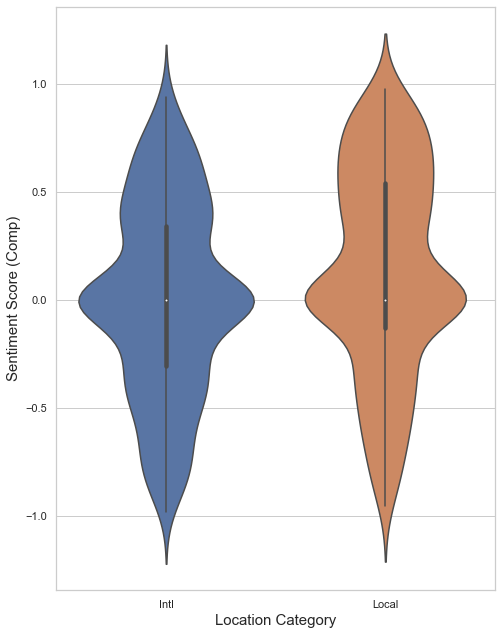

In [90]:
# as a reminder there was a notable dispartiy; meaning nothing close to the middle
sns.set_theme(style="whitegrid")
a4_dims = (7, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.violinplot(x="local", y="comp", data=news_sa)
plt.xlabel('Location Category', fontsize=15)
plt.ylabel('Sentiment Score (Comp)', fontsize=15)

This appears **similar to the previous round** in that:
   * **International**, Evenly Split
   * **China**, Leans Positive

However, a great deal of observations fall around the 0 mark compared to the ±0.5 mark from before. 

Let's see what percent are equal to 0.

In [91]:
news_sa_comp_zero = news_sa.comp.value_counts()[0]

In [96]:
print('',"{:,}%".format(round(((news_sa_comp_zero/len(news_sa))*100),1)),'| Equal to Zero','\n',
     news_sa_comp_zero, ' | Total','\n',
     len(news_sa)-news_sa_comp_zero,'| Total if dropped')

 24.6% | Equal to Zero 
 333  | Total 
 1023 | Total if dropped


Droping ~25% of the DataFrame would be a notable amount but we would still have over +1k.

Let's see exactly how this plays out on a Histogram.

Text(0.5, 1.0, 'Histogram of Comp Scores in Sentences between Categories')

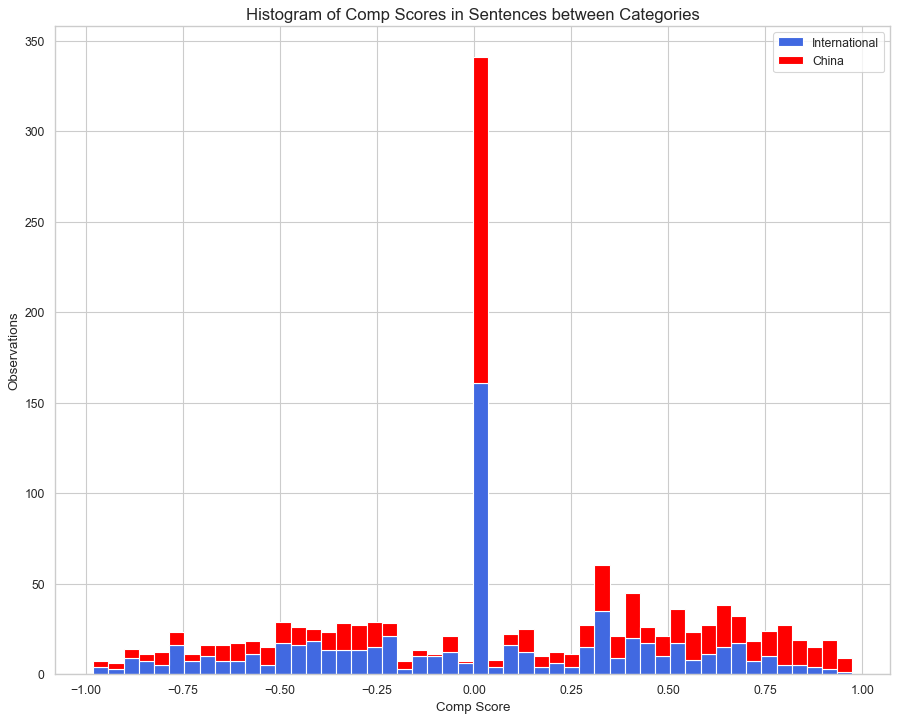

In [97]:
figure(figsize=(12,10), dpi=80)

# Make a separate list for each airline
x1 = list(news_sa[news_sa['local'] == 'Intl']['comp'])
x2 = list(news_sa[news_sa['local'] == 'Local']['comp'])

# Assign colors for each airline and the names
colors = ['royalblue', 'red']
names = ['International', 'China']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names

# Stacked histogram with multiple airlines
plt.hist([x1, x2], bins = 50, stacked=True,
         color = colors, label=names)
# Plot formatting
plt.legend()
plt.xlabel('Comp Score', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.title('Histogram of Comp Scores in Sentences between Categories', fontsize=15)


The key takeaways here are:
   * Zero does dominate & looks evenly split between the 2 categories
   * Both categories show up on each end of the scale ( Positive & Negative ) but we knew that
   * The International Category appears to dominate the Negative Category
     * We knew that
   * The China Category appears to dominate the Positive Category
     * We also knew that as well

I wish to see what is in the "Zero's" first.

In [98]:
# China Zero
news_sa_l_z = pd.DataFrame([])
news_sa_l_z = news_sa.loc[(news_sa.comp == 0) & (news_sa['local'] == "Local")]

# International Zero
news_sa_i_z = pd.DataFrame([])
news_sa_i_z = news_sa.loc[(news_sa.comp == 0) & (news_sa['local'] == "Intl")]


In [99]:
# Checking to see what the lengths of them are
print('',len(news_sa_l_z),'| Zero\'s in the China Category','\n',
     len(news_sa_i_z),'| Zero\'s in the International Category')

 176 | Zero's in the China Category 
 157 | Zero's in the International Category


In [100]:
news_sa_i_z['Sentences'].head(50)

0      Hong Kong security law: What is it and is it w...
5       The details of the law's 66 articles were kep...
7       It gives Beijing powers to shape life in Hong...
14         who are not permanent residents of Hong Kong"
15      Only a handful of people had seen the full te...
16      They did not include the territory's Chief Ex...
22      Many are also afraid Hong Kong's judicial ind...
23      The city is the only common law jurisdiction ...
35      The Basic Law says Chinese laws can't be appl...
36      These laws can be introduced by decree - whic...
42      The BBC's Michael Bristow takes a closer look...
48      Article 29 is perhaps an example of this broa...
55      As the NPC Observer team note, these words ar...
57      Trials can be held in secret (Article 41) and...
58      Judges can be handpicked (Article 44) by Hong...
61      It says only that cases should be handled in ...
64      Donald Clarke, writing for the China Collecti...
70             As Mr Clarke wro

In [101]:
news_sa_i_z['Sentences'][135]

' Several activist groups have already disbanded as a result of the new laws'

In [102]:
news_sa_l_z['Sentences'].head(50)

700     The law was passed at the 20th session of the...
704     Besides, the city’s ranking among global fina...
705                         \n\n\tThe region logged an 8
706    9-percent year-on-year slump in its GDP in the...
708    9 percent in the period from March to May, a r...
709                    It is the reality Hong Kong faces
751    \n\n\tThe year 2020 marks the 30th anniversary...
762    \n\n\tCelebrations were held across Hong Kong ...
763     Helicopters flew the national and regional fl...
764     Choruses of residents sang the national anthe...
769                            It took effect at 11:00 p
771     local time the same day upon its promulgation...
782    \n\n\tThe captain of the lead boat, surnamed L...
790    \n\n\tNumerous ordinary Hong Kong residents ec...
810     Born and raised in the Middle East, he has be...
813                             I'm not just saying that
815                It just needs to shift back on course
820     The law was passed at t

Further review required.

**Sentiment Breakdown** | We will now break the dataframes down by the following:
   * Negative | International
   * Negative | China
   * Positive  | China
   * Positive  | International

In [103]:
# International Negative
news_sa_i_n = pd.DataFrame([])
news_sa_i_n = news_sa.loc[(news_sa.comp <= -0.001) & (news_sa['local'] == "Intl")]
news_sa_i_n = news_sa_i_n.reset_index()
news_sa_i_n = news_sa_i_n.drop(columns=['index'])

# China Negative
news_sa_l_n = pd.DataFrame([])
news_sa_l_n = news_sa.loc[(news_sa.comp <= -0.001) & (news_sa['local'] == "Local")]
news_sa_l_n = news_sa_l_n.reset_index()
news_sa_l_n = news_sa_l_n.drop(columns=['index'])

# China Positive
news_sa_l_p = pd.DataFrame([])
news_sa_l_p = news_sa.loc[(news_sa.comp >= 0.001) & (news_sa['local'] == "Local")]
news_sa_l_p = news_sa_l_p.reset_index()
news_sa_l_p = news_sa_l_p.drop(columns=['index'])

# International Positive
news_sa_i_p = pd.DataFrame([])
news_sa_i_p = news_sa.loc[(news_sa.comp >= 0.001) & (news_sa['local'] == "Intl")]
news_sa_i_p = news_sa_i_p.reset_index()
news_sa_i_p = news_sa_i_p.drop(columns=['index'])


Let's double confirm they are all there.

In [104]:
splits = len(news_sa_i_n)+len(news_sa_l_n)+len(news_sa_l_p)+len(news_sa_i_p)+len(news_sa_i_z)+len(news_sa_l_z)
main = len(news_sa)
print((splits-main),'| This should be Zero')

0 | This should be Zero


Let's take a look at the total number of observations in each.

In [105]:
print('',
len(news_sa_i_n),'| Negative International','\n',
len(news_sa_l_n),'| Negative China','\n',
len(news_sa_l_p),'| Positive China','\n',
len(news_sa_i_p),'| Positive International'
)

 258 | Negative International 
 182 | Negative China 
 324 | Positive China 
 259 | Positive International


In [106]:
print('',
"{:,}%".format(round((((len(news_sa_i_n))/len(news_sa))*100),2)),'| Negative International','\n',
"{:,}%".format(round((((len(news_sa_l_n))/len(news_sa))*100),2)),'| Negative China','\n',
"{:,}%".format(round((((len(news_sa_l_p))/len(news_sa))*100),2)),'| Positive China','\n',
"{:,}%".format(round((((len(news_sa_i_p))/len(news_sa))*100),2)),'| Positive International','\n',
)

 19.03% | Negative International 
 13.42% | Negative China 
 23.89% | Positive China 
 19.1% | Positive International 



**Topic Review** | Negative China; we will start with the smallest.

In [107]:
news_sa_l_n.head(1)

,file_name,date,source,country,local,Sentences,comp,neg,neu,pos
0,peoples_daily_1,2020-07-03,People's Daily,China,Local,\n\n\tSince the disturbance related to the now...,-0.8074,0.162,0.796,0.042


**Lemmatization** | Negative China

In [108]:
lemmatized_c_n = lemmatization(news_sa_l_n['Sentences'])
print(lemmatized_c_n[0][0:90])

disturbance relate now withdraw ordinance amendment concern transfer fugitive independence


**Stop of Removal** | Negative China

In [109]:
data_words_c_n = gen_words(lemmatized_c_n)
print(data_words_c_n[0][0:10])

['disturbance', 'relate', 'now', 'withdraw', 'ordinance', 'amendment', 'concern', 'transfer', 'fugitive', 'independence']


**Bag of Words** | Negative China

In [110]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words_c_n)

corpus_c_n = []
for text in data_words_c_n:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus_c_n.append(new)

print (corpus_c_n[0][0:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1)]


Making some sense of this.

In [111]:
word_c_n = id2word[[1][:][0]]
print(word_c_n)

business


**Bigrams & Trigrams** | Negative China

In [112]:
bigrams_phrases_c_n = gensim.models.Phrases(data_words_c_n,min_count=5, threshold=3)
trigrams_phrases_c_n = gensim.models.Phrases(bigrams_phrases_c_n[data_words_c_n], threshold=3)

bigram_c_n = gensim.models.phrases.Phraser(bigrams_phrases_c_n)
trigram_c_n = gensim.models.phrases.Phraser(trigrams_phrases_c_n)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams_c_n = make_bigrams(data_words_c_n)
data_bigrams_trigrams_c_n = make_trigrams(data_bigrams_c_n)

In [113]:
print(data_bigrams_trigrams_c_n[0][0:9])

['disturbance', 'relate', 'now', 'withdraw', 'ordinance', 'amendment', 'concern', 'transfer', 'fugitive']


In [114]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams_c_n)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams_c_n

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus_c_n, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus_c_n[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus_c_n[i] = new_bow


**LDA Model** | Negative China

In [115]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_c_n, 
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10,
                                           alpha="auto")


In [116]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_c_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044840 -0.161943       1        1  18.058584
3      0.003836  0.156402       2        1  17.430649
5     -0.102742 -0.149666       3        1  15.997106
1     -0.144902  0.129457       4        1  13.282650
4      0.170180  0.107300       5        1  12.291524
2      0.151162 -0.064073       6        1  12.251773
6     -0.122375 -0.017476       7        1  10.687713, topic_info=            Term       Freq      Total Category  logprob  loglift
109         also  11.000000  11.000000  Default  30.0000  30.0000
331      crystal  12.000000  12.000000  Default  29.0000  29.0000
157     director  15.000000  15.000000  Default  28.0000  28.0000
111    encounter  10.000000  10.000000  Default  27.0000  27.0000
40         black  95.000000  95.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
40         black   8.022671  95.262689   Topic7  -3.4188  -0.2383
56      practice   3.046848  17.746327   Topic7  -4.3870   0.4740
163  significant   2.844106  23.180622   Topic7  -4.4559   0.1380
12          have   2.619749  38.240765   Topic7  -4.5380  -0.4447
80       restore   1.693021   8.048764   Topic7  -4.9746   0.6771

[370 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
708       2  0.576230   abortion
676       6  0.814243     accuse
801       2  0.279953  adherence
801       4  0.559906  adherence
751       6  0.631588     agency
...     ...       ...        ...
442       1  0.546274    willing
712       2  0.576230      woman
321       4  0.320839      world
321       6  0.320839      world
321       7  0.320839      world

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 2, 5, 3, 7])

This appears more manageable but then again it's 13.4% of 1,356 Sentences in the News Articles.

Let's double confirm we reached the best configuration with the Coherance Score.

**Coherence Score** | Negative China

In [117]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus_c_n,
                                                      texts=data_bigrams_trigrams_c_n,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

print('Avg. Coherence Score (Cv):', avg_coherence_cv)

Avg. Coherence Score (Cv): 0.7335859009560907


In [118]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_c_n, texts=data_bigrams_trigrams_c_n,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=88, step=1, cpus=4)


100%|██████████| 87/87 [07:54<00:00,  5.45s/it]


In [119]:
coherence_df_c_n = pd.DataFrame({'Number of Topics': range(2, 89, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df_c_n.sort_values(by=['Coherence Score'], ascending=False).head(10)


,Number of Topics,Coherence Score
8,10,0.7011
21,23,0.6933
11,13,0.6920
26,28,0.6908
13,15,0.6903
22,24,0.6868
23,25,0.6865
35,37,0.6858
16,18,0.6850
17,19,0.6849


**Coherence Score Visual** | Negative China

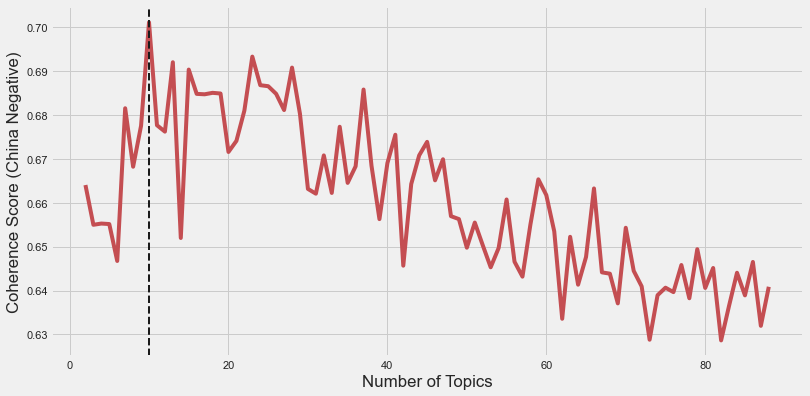

In [120]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 89, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=10, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score (China Negative)')
#plt.axvline((three_down), color='g', linewidth=2)

**LDA Model, Post Coherence Score** | Negative China

In [121]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_c_n, 
                                           id2word=id2word,
                                           num_topics=10,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [122]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_c_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.083393  0.184581       1        1  14.641485
7      0.078898 -0.204724       2        1  12.797688
6      0.060505  0.197225       3        1  11.518941
0     -0.118472 -0.177069       4        1  11.229506
1     -0.204368  0.093552       5        1  10.304554
5      0.069849  0.076358       6        1   9.873687
4      0.176944 -0.083489       7        1   8.687276
2     -0.167086 -0.038430       8        1   7.993440
9      0.193046  0.044934       9        1   7.258755
8     -0.005922 -0.092939      10        1   5.694669, topic_info=          Term       Freq      Total Category  logprob  loglift
109       also  10.000000  10.000000  Default  30.0000  30.0000
331    crystal  12.000000  12.000000  Default  29.0000  29.0000
352       tiny  12.000000  12.000000  Default  28.0000  28.0000
380    rioting   7.000000   7.000000  Default  27.0000  27.0000
461      offer   7.000000   7.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
56    practice   1.518949  17.435552  Topic10  -4.4535   0.4251
332  democracy   1.184301  13.486228  Topic10  -4.7024   0.4331
665        ask   0.777168   2.211655  Topic10  -5.1236   1.8198
855    reflect   0.777167   2.347767  Topic10  -5.1236   1.7601
669   ministry   0.777160   2.421743  Topic10  -5.1236   1.7290

[513 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
708       5  0.614344    abortion
857      10  0.701123     absence
687       4  0.597181  accessible
676       9  0.450029      accuse
676      10  0.450029      accuse
...     ...       ...         ...
154       3  0.210875       wreak
154       5  0.210875       wreak
154       6  0.421749       wreak
154       9  0.210875       wreak
847       7  0.601758        zhao

[676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 7, 1, 2, 6, 5, 3, 10, 9])

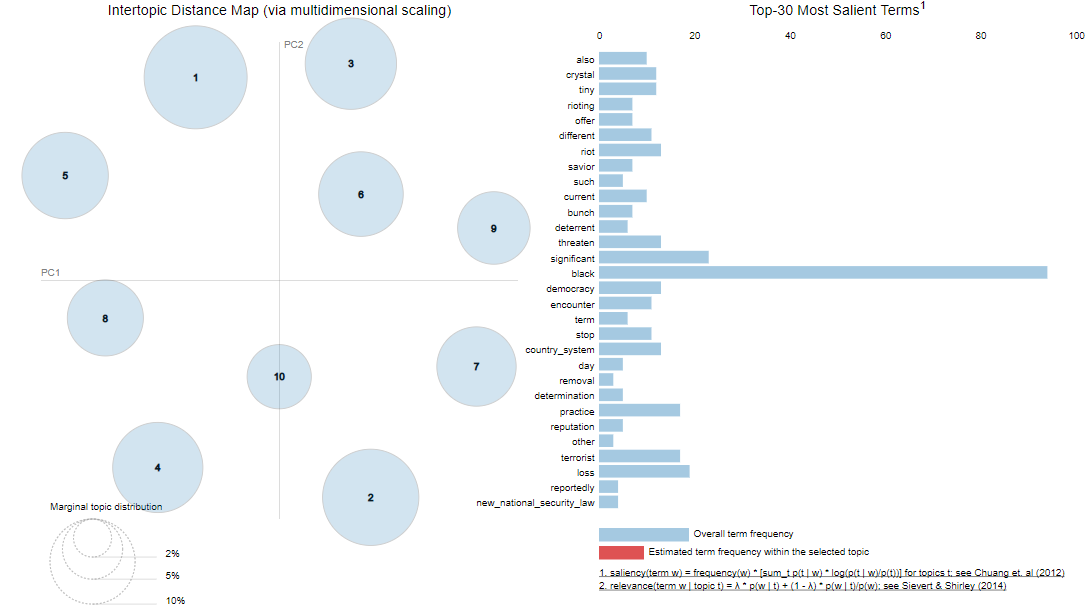

Visually, it appears that 10 could be a correct number of Topics.

We will go deeper on each next.

<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame.

In [123]:
best_model_idx = coherence_df_c_n[coherence_df_c_n['Number of Topics'] == 10].index[0]
best_lda_model = lda_models[best_model_idx]

In [124]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Term1,black,international,black,black,black,black,black,black,black,black
Term2,have,director,have,crystal,country_system,have,practice,threaten,riot,significant
Term3,practice,loss,significant,force,have,practice,terrorist,have,current,have
Term4,democracy,black,encounter,loss,savior,terrorist,loss,current,have,bunch
Term5,terrorist,have,loss,encounter,different,significant,significant,practice,tiny,country_system
Term6,also,separatist,sighted,stop,director,such,have,terrorist,threaten,misinformation
Term7,tiny,eliminate,social_unrest,different,party,example,country_system,stop,rioting,crystal
Term8,improve,significant,major,democracy,report,legislation,barrister,loss,loss,protege
Term9,country_system,country_system,director,riot,injury,crystal,tiny,term,democracy,completely
Term10,significant,also,personage,namely,significant,tiny,unexpectedly,force,speed,director


In [125]:
pd.set_option('display.max_colwidth', -1)
topics_df_side = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df_side

,Terms per Topic
Topic1,"black, have, practice, democracy, terrorist, also, tiny, improve, country_system, significant, day, various, deepen, once, drive, danger, referendum, riot, reflect, real"
Topic2,"international, director, loss, black, have, separatist, eliminate, significant, country_system, also, crystal, parliament, sabotage, current, together, term, advocate, world, transfer, network"
Topic3,"black, have, significant, encounter, loss, sighted, social_unrest, major, director, personage, turning, atrocious, safety, turmoil, law_mark, milestone, say, secessionist, practice, promulgation"
Topic4,"black, crystal, force, loss, encounter, stop, different, democracy, riot, namely, director, claim, economic, inseparable, release, have, violence, prepared, hold, offer"
Topic5,"black, country_system, have, savior, different, director, party, report, injury, significant, hub, particular, distort, drone, stability, national_security_law, disturbance, make, heal, rioting"
Topic6,"black, have, practice, terrorist, significant, such, example, legislation, crystal, tiny, bunch, loss, director, rioting, stop, dollar, fulfill, barrister, soon, when"
Topic7,"black, practice, terrorist, loss, significant, have, country_system, barrister, tiny, unexpectedly, encounter, take, wreak, engage, director, anarchy, authority, reason, new_national_security_law, plunge"
Topic8,"black, threaten, have, current, practice, terrorist, stop, loss, term, force, find, different, chaos, insult, weak, determination, however, inseparable, firm, also"
Topic9,"black, riot, current, have, tiny, threaten, rioting, loss, democracy, speed, sighted, soon, move, smearing, wreak, region, atrocious, restore, force, avoid"
Topic10,"black, significant, have, bunch, country_system, misinformation, crystal, protege, completely, director, referendum, tiny, claim, other, decide, wreak, rioting, loss, term, available"


Small but check for duplicates.

In [126]:
cn_n_dup = topics_df_side['Terms per Topic'].duplicated().any()
cn_n_dup

False

<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame.

In [127]:
tm_results = best_lda_model[corpus]

In [128]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(1, 0.9749964),
 (1, 0.8199867),
 (0, 0.9396832),
 (7, 0.90160054),
 (2, 0.5771225)]

In [129]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(news_sa_l_n))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df_side.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Sentences'] = news_sa_l_n['Sentences']
corpus_topic_df = corpus_topic_df.drop(['Document'], axis=1)

In [130]:
corpus_topic_df = corpus_topic_df.reset_index()
corpus_topic_df = corpus_topic_df.drop(['index'], axis=1)

In [131]:
corpus_topic_df = pd.concat([corpus_topic_df,news_sa_l_n['comp']],
                           axis = 1, ignore_index=False)
corpus_topic_df = corpus_topic_df[['Dominant Topic', 'Contribution %','comp', 'Topic Desc', 'Sentences']]

In [132]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
0,2,97.50,-0.8074,"international, director, loss, black, have, separatist, eliminate, significant, country_system, also, crystal, parliament, sabotage, current, together, term, advocate, world, transfer, network","\n\n\tSince the disturbance related to the now-withdrawn ordinance amendments concerning the transfer of fugitives in the HKSAR in June 2019, “Hong Kong independence” forces, radical separatist forces, and the opposition in the region have grossly trampled on the rule of law and social stability of Hong Kong, inflicted heavy losses on its economy, damaged its business environment and international image, and undermined foreign investors’ confidence in the HKSAR"
23,3,95.71,-0.5423,"black, have, significant, encounter, loss, sighted, social_unrest, major, director, personage, turning, atrocious, safety, turmoil, law_mark, milestone, say, secessionist, practice, promulgation","\n\n\tRadicals advocating ""Hong Kong independence"" colluded with external forces and applied ""burn with us"" and terrorist-style tactics, intending to destroy Hong Kong and contain China's development, said British barrister Grenville Cross, who had worked as director of Public Prosecutions in Hong Kong for 12 years since 1997"
10,3,94.00,-0.1779,"black, have, significant, encounter, loss, sighted, social_unrest, major, director, personage, turning, atrocious, safety, turmoil, law_mark, milestone, say, secessionist, practice, promulgation","\n\n-- The promulgation of the law marks a significant turning point for Hong Kong to move from turmoil to stability, and a major milestone for the practice of ""one country, two systems,"" said Luo Huining, director of the Liaison Office of the Central People's Government in the HKSAR"
2,1,93.97,-0.9545,"black, have, practice, democracy, terrorist, also, tiny, improve, country_system, significant, day, various, deepen, once, drive, danger, referendum, riot, reflect, real","\n\n\tBecause of the lack of national security legislation, Hong Kong has witnessed in pain how the “Hong Kong independence” forces, black-clad rioters, and home-grown terrorists who threatened “mutual destruction” have kept escalating their violent activities at various locations, and secessionist, subversive, collusive, and disruptive practices have been conducted so unrestrainedly"
3,8,90.16,-0.3515,"black, threaten, have, current, practice, terrorist, stop, loss, term, force, find, different, chaos, insult, weak, determination, however, inseparable, firm, also","\n\n\tHong Kong could never return to the right track and restore order if its legal loopholes in safeguarding national security remained, weak links in the system not improved, and the main dangers obstructing its long-term prosperity and stability not eliminated"
...,...,...,...,...,...
167,10,23.87,-0.9403,"black, significant, have, bunch, country_system, misinformation, crystal, protege, completely, director, referendum, tiny, claim, other, decide, wreak, rioting, loss, term, available",\nShe condemned the violence amid the social unrest and stressed that the HKSAR government and the police will resolutely say no to violence
13,3,23.55,-0.3612,"black, have, significant, encounter, loss, sighted, social_unrest, major, director, personage, turning, atrocious, safety, turmoil, law_mark, milestone, say, secessionist, practice, promulgation","\n\n\tLam called the enactment of the law a ""turning point"" to take Hong Kong out of the current impasse and to restore stability and order from the chaos"
45,7,22.92,-0.7003,"black, practice, terrorist, loss, significant, have, country_system, barrister, tiny, unexpectedly, encounter, take, wreak, engage, director, anarchy, authority, reason, new_national_security_law, plunge","""Lai was recently sentenced for violating the public order ordinance in Hong Kong by taking part in illegal assemblies, which has nothing to do with the national security law for Hong Kong"
171,4,22.90,-0

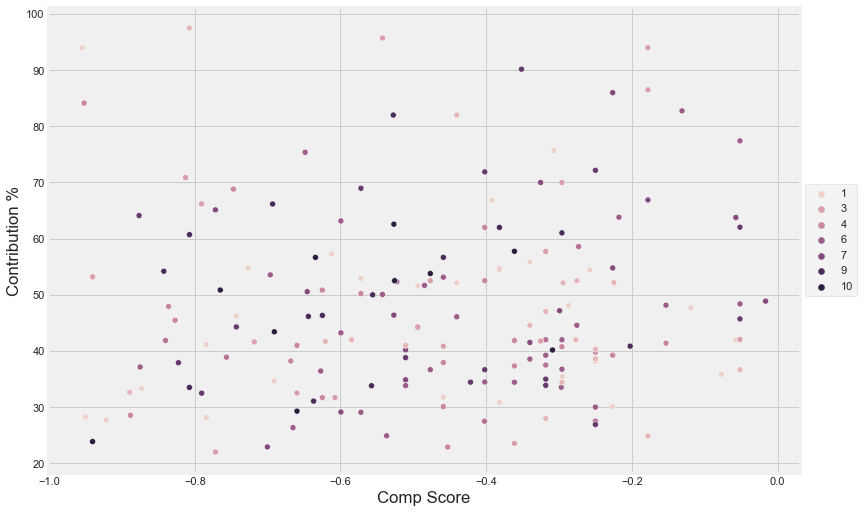

In [133]:
plt.figure(figsize=(12, 8))
s = sns.scatterplot(data=corpus_topic_df, x="comp", y="Contribution %", hue="Dominant Topic")
s.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
xl = plt.xlabel('Comp Score')
yl = plt.ylabel('Contribution %')

The Topics appear spread out on both the Contribution % & Comp Scores. We will now take another deeper look & break them up into seperate dataframes. Let's first look at how many each have.

In [134]:
corpus_topic_df['Dominant Topic'].value_counts()

6     30
1     28
4     23
2     18
3     18
8     16
7     15
9     15
10    12
5     7 
Name: Dominant Topic, dtype: int64

All are below the ~50 mark used on the Twitter dataframe to visually determine a Topic definition manually. Let's now break them up into seperate dataframes for further review.

In [135]:
n_l_n_t6 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 6)]
n_l_n_t1 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 1)]
n_l_n_t4 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 4)]
n_l_n_t2 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 2)]
n_l_n_t3 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 3)]
n_l_n_t8 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 8)]
n_l_n_t7 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 7)]
n_l_n_t9 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 9)]
n_l_n_t10 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 10)]
n_l_n_t5 = corpus_topic_df.loc[(corpus_topic_df['Dominant Topic'] == 5)]

**RBL China Negative** | Reading Between the Lines on Topic 5

In [136]:
n_l_n_t5.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
70,5,42.0,-0.3182,"black, country_system, have, savior, different, director, party, report, injury, significant, hub, particular, distort, drone, stability, national_security_law, disturbance, make, heal, rioting",It turned into a puppet of the US and lost its way


In [137]:
print('We will look at',len(n_l_n_t5),'sentences to help read between the lines.')

We will look at 7 sentences to help read between the lines.


In [138]:
n_l_n_t5['Sentences']

70      It turned into a puppet of the US and lost its way                                                                                                                                                                                                                  
71     It is the National Security Law's core mission to heal these fatal injuries to Hong Kong                                                                                                                                                                             
76      In particular, the chief perpetrator will face severe punishment                                                                                                                                                                                                    
88      You don't trust our statement                                                                                                                                                            

It looks as though numbers 71 & 103 are simple to understand:
   * China's intent is positive but the words 'fatal injuries' sent this to the negative camp
   * China's position on those against them
   
Additional review may be required on the following to better define what is being referred too:
   * **70** | "It" may need to be further defined albeit they "may" be referring to the National Security Law.
   * **76** | The "Chief perpetrator" needs to be further defined
   * **88** | The statement referred too here is undefined
   * **90** | "them" needs to be further defined
   * **154** | Appears to be changing the topic; would be interesting to see what was referred to in the sentence before that

Nevertheless, there does not seem to be a definitive connector on this Topic. 


**RBL China Negative** | Reading Between the Lines on Topic 10

In [139]:
n_l_n_t10.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
11,10,56.66,-0.6344,"black, significant, have, bunch, country_system, misinformation, crystal, protege, completely, director, referendum, tiny, claim, other, decide, wreak, rioting, loss, term, available",It was one of the most atrocious violent incidents during months of social unrest last year


In [140]:
print('We will look at',len(n_l_n_t10),'sentences to help read between the lines.')

We will look at 12 sentences to help read between the lines.


In [141]:
n_l_n_t10['Sentences'].head(12)

11      It was one of the most atrocious violent incidents during months of social unrest last year                                                                                                                                                                                                 
39      "There was violence everywhere in the streets of Hong Kong, there was a storming of the LegCo building, there was disruption of social order in Hong Kong                                                                                                                                   
40      While Law appeared to have no other words except "peaceful protests" in rebuking Gao's claims during the show, he said in a tweet on Sunday that the Chinese scholar "was enraged when he realized his smearing attack did not work," and he further considered it as "civility vs barbarity
93     \nAmbassador Liu: That is totally wrong                                                                           

This Topic appears more connected with a high level summary below:
   * Discontent with the protestors & their civil disobedience
     * Mentioned barbarity
   * Huawei comes up again with discontent with the United States & UK for banning Huawei
   
Additional review may be required on the following to better define what is being referred too:
   * **144** | "They" are disrupting the bond between the HK people & the Chinese gov't
     * It's probably international countries abroad but TBC
   * **167** | "She" appears to agree with China
     * It's probably Carrie Lam but needs further confirmation

Nevertheless, there does seem to be a definitive connector on this Topic:
   * **China's dissatisfaction with both the protestors & foreign countries ban of Huawei products**


**RBL China Negative** | Reading Between the Lines on Topic 9

In [142]:
n_l_n_t9.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
20,9,46.33,-0.6249,"black, riot, current, have, tiny, threaten, rioting, loss, democracy, speed, sighted, soon, move, smearing, wreak, region, atrocious, restore, force, avoid",(Xinhua/Wang Shen)\n\n\tViolence used to be a common occurrence during the social unrest


In [143]:
print('We will look at',len(n_l_n_t9),'sentences to help read between the lines.')

We will look at 15 sentences to help read between the lines.


In [144]:
n_l_n_t9['Sentences'].head(15)

20      (Xinhua/Wang Shen)\n\n\tViolence used to be a common occurrence during the social unrest                                                                                                                                                                                                                                                                               
46      The BBC got the facts wrong and spread this misinformation to the mainstream public," he said                                                                                                                                                                                                                                                                          
60     If the UK doesn't want Huawei but spends more money for other products with poor quality, "it's up to you," Liu said                                                                                                                                             

This Topic appears to be slightly connected with a high-level summary below:
   * BBC is misinformed
   * Huawei comes up again with discontent with the United States & UK for banning Huawei
   * China presents a defensive on the following for the Uighur people (Xinjiang); no pervasive, massive, forced sterilization
     * It is my understanding this was reported in both the International News & Tweets
   
Additional review may be required on the following to better define what is being referred too:
   * **169** | "She" appears to be upset with the spreading violence from the protestors
     * Again, it's probably Carrie Lam but TBC

Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **China's dissatisfaction with foreign countries ban of Huawei products, a defensive on Xinjiang & the BCC being misinformed**


**RBL China Negative** | Reading Between the Lines on Topic 7

In [145]:
n_l_n_t7.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
7,7,48.88,-0.0164,"black, practice, terrorist, loss, significant, have, country_system, barrister, tiny, unexpectedly, encounter, take, wreak, engage, director, anarchy, authority, reason, new_national_security_law, plunge","\n\n\tEspecially since the disturbance related to the now-withdrawn ordinance amendments concerning the transfer of fugitives in the HKSAR last June, the ""anti-China"" forces in Hong Kong have publicly supported ""Hong Kong's independence,"" ""self-determination"" and ""referendum"" and engaged in activities to undermine the national unity and separate Hong Kong from China"


In [146]:
print('We will look at',len(n_l_n_t7),'sentences to help read between the lines.')

We will look at 15 sentences to help read between the lines.


In [147]:
n_l_n_t7['Sentences'].head(15)

7      \n\n\tEspecially since the disturbance related to the now-withdrawn ordinance amendments concerning the transfer of fugitives in the HKSAR last June, the "anti-China" forces in Hong Kong have publicly supported "Hong Kong's independence," "self-determination" and "referendum" and engaged in activities to undermine the national unity and separate Hong Kong from China
9      Law and order dawns in Hong Kong as new law takes effect -- The festive mood across Hong Kong on the 23rd anniversary of its return to the motherland stood in sharp contrast to the scenes a year ago when rioters stormed the Legislative Council complex and wreaked havoc inside                                                                                            
22      Their actions plunged Hong Kong into chaos and a deep economic recession, and posed a significant and increasing threat to national security                                                                                                    

This Topic appears to be well connected with a high-level summary below:
   * Justification for the National Security Law to contain violence & storming the legislative council
   * Attempts to separate Hong Kong & China's unity by foreign actors

The theme on this Topic:
   * **Justification for the National Security Law to contain violence & attempts to break the unity between China & Hong Kong**


**RBL China Negative** | Reading Between the Lines on Topic 8

In [148]:
n_l_n_t8.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
3,8,90.16,-0.3515,"black, threaten, have, current, practice, terrorist, stop, loss, term, force, find, different, chaos, insult, weak, determination, however, inseparable, firm, also","\n\n\tHong Kong could never return to the right track and restore order if its legal loopholes in safeguarding national security remained, weak links in the system not improved, and the main dangers obstructing its long-term prosperity and stability not eliminated"


In [149]:
print('We will look at',len(n_l_n_t8),'sentences to help read between the lines.')

We will look at 16 sentences to help read between the lines.


In [150]:
n_l_n_t8['Sentences'].head(16)

3      \n\n\tHong Kong could never return to the right track and restore order if its legal loopholes in safeguarding national security remained, weak links in the system not improved, and the main dangers obstructing its long-term prosperity and stability not eliminated                                                                                          
6       However, it has also encountered new circumstances and problems                                                                                                                                                                                                                                                                                                  
21      Rioters besieged government and legislative buildings, trashed metro stations, banks and shops, and assaulted innocent residents                                                                                                                                            

This Topic appears to be well connected with a high-level summary below:
   * Discontent from China towards protestors & the United States for meddling in their affairs
   * The intent of the law towards only a tiny group of criminals who endanger national security 
   * Suggesting that protestors are working with the United States by carrying the US Flag around
   
An interesting observation which is actually positive:
   * **25** | (Xinhua/Wang Shen)\n\n\tBacked by a fast-growing mainland economy and the firm support of the central government, Hong Kong has overcome various difficulties since 1997, from the Asian financial crisis to the SARS outbreak and the global financial crisis, said Maria Tam, deputy director of the HKSAR Basic Law Committee under the NPC Standing Committee

The theme on this Topic:
   * **Negative comments towards the protestors & the United States (flag). More confirmation that the intent of the law is for security**


**RBL China Negative** | Reading Between the Lines on Topic 3

In [151]:
n_l_n_t3.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
4,3,57.71,-0.3182,"black, have, significant, encounter, loss, sighted, social_unrest, major, director, personage, turning, atrocious, safety, turmoil, law_mark, milestone, say, secessionist, practice, promulgation",\n\n\tFar-sighted personages in Hong Kong have pointed out since the onset of the legislative procedures for the national security law that the region is about to move from chaos to order


In [152]:
print('We will look at',len(n_l_n_t3),'sentences to help read between the lines.')

We will look at 18 sentences to help read between the lines.


In [153]:
n_l_n_t3['Sentences'].head(18)

4      \n\n\tFar-sighted personages in Hong Kong have pointed out since the onset of the legislative procedures for the national security law that the region is about to move from chaos to order                                                                                                                                                                                             
10     \n\n-- The promulgation of the law marks a significant turning point for Hong Kong to move from turmoil to stability, and a major milestone for the practice of "one country, two systems," said Luo Huining, director of the Liaison Office of the Central People's Government in the HKSAR                                                                                            
13     \n\n\tLam called the enactment of the law a "turning point" to take Hong Kong out of the current impasse and to restore stability and order from the chaos                                                                       

This Topic appears to be well connected with a high-level summary below:
   * The law is a significant turning point for Hong Kong to move from turmoil to stability
   * Violent incidents and riots trampled on order and the rule of law, threatened people's safety, and endangered national security 
   * HK has become highly politicized and violent; forgetting it's International Financial Center status
   
An interesting observation which is actually positive:
   * **23** | Mentions of British barrister Grenville Cross asking for the protestors to calm down

The theme on this Topic:
   * **The law will help stop the highly politicized and violent nature that HK has become**


**RBL China Negative** | Reading Between the Lines on Topic 2

In [154]:
n_l_n_t2.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
0,2,97.5,-0.8074,"international, director, loss, black, have, separatist, eliminate, significant, country_system, also, crystal, parliament, sabotage, current, together, term, advocate, world, transfer, network","\n\n\tSince the disturbance related to the now-withdrawn ordinance amendments concerning the transfer of fugitives in the HKSAR in June 2019, “Hong Kong independence” forces, radical separatist forces, and the opposition in the region have grossly trampled on the rule of law and social stability of Hong Kong, inflicted heavy losses on its economy, damaged its business environment and international image, and undermined foreign investors’ confidence in the HKSAR"


In [155]:
print('We will look at',len(n_l_n_t2),'sentences to help read between the lines.')

We will look at 18 sentences to help read between the lines.


In [156]:
n_l_n_t2['Sentences'].head(18)

0      \n\n\tSince the disturbance related to the now-withdrawn ordinance amendments concerning the transfer of fugitives in the HKSAR in June 2019, “Hong Kong independence” forces, radical separatist forces, and the opposition in the region have grossly trampled on the rule of law and social stability of Hong Kong, inflicted heavy losses on its economy, damaged its business environment and international image, and undermined foreign investors’ confidence in the HKSAR
1      \n\n\tIn addition, the HKSAR’s unemployment rate rocketed to 5                                                                                                                                                                                                                                                                                                                                                                                                                   
14      (Xinhua/Li Gang)\n\n\tThe legislation follows 

This Topic appears to be well connected with a high-level summary below:
   * More mentions of Huawei
   * Collusion with the US and other external forces to mess up the city
   * "One country, one system" is an accusation made by Hong Kong's extreme forces and the US and other external forces
   * Laws intent
     * It's targeted on a very small group of criminals who intend to endanger the national security
   * The anti-China show staged by a handful of western countries ended in a fiasco

The theme on this Topic:
   * **Focuses on external forces misinformation & responsibility for the chaos in HK. Laws actual intent is pure**


**RBL China Negative** | Reading Between the Lines on Topic 4

In [157]:
n_l_n_t4.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
5,4,50.21,-0.5719,"black, crystal, force, loss, encounter, stop, different, democracy, riot, namely, director, claim, economic, inseparable, release, have, violence, prepared, hold, offer","\n\n\tIt’s believed that with the newly adopted national security law for Hong Kong and the firm support of the central government, the SAR will soon stop violence, end the chaos and restore order"


In [158]:
print('We will look at',len(n_l_n_t4),'sentences to help read between the lines.')

We will look at 23 sentences to help read between the lines.


In [159]:
n_l_n_t4['Sentences'].head(23)

5      \n\n\tIt’s believed that with the newly adopted national security law for Hong Kong and the firm support of the central government, the SAR will soon stop violence, end the chaos and restore order                                                                                                                                                                        
26      Hong Kong was an inseparable part of China, but became a British colony after the Qing dynasty ceded it to the British Empire in 1842 through the Treaty of Nanjing, ending the First Opium War                                                                                                                                                                            
27      But the local government has constantly failed to undertake any initiative to decolonize Hong Kong in the face of riots, sabotage, violence, anarchy, and vandalism caused by the agents, pawns, and proteges of the Western imperium, especially the Un

This Topic appears to be well connected with a high-level summary below:
   * The law is a response to the violence & unrest that came before it
   * External parties to grasp the situation, view the law in an objective and impartial way & stop fact-distorting and slandering acts
     * Stop interfering in Hong Kong matters and China's internal affairs 
   * The HK gov't has failed to take an initiative to decolonize HK in the face of riots, sabotage & violence caused by Western imperium; notably the US
   
The theme on this Topic:
   * **Further clarification of the intent of the law. External forces are not objective & inferring; notably the United States**


**RBL China Negative** | Reading Between the Lines on Topic 1

In [160]:
n_l_n_t1.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
2,1,93.97,-0.9545,"black, have, practice, democracy, terrorist, also, tiny, improve, country_system, significant, day, various, deepen, once, drive, danger, referendum, riot, reflect, real","\n\n\tBecause of the lack of national security legislation, Hong Kong has witnessed in pain how the “Hong Kong independence” forces, black-clad rioters, and home-grown terrorists who threatened “mutual destruction” have kept escalating their violent activities at various locations, and secessionist, subversive, collusive, and disruptive practices have been conducted so unrestrainedly"


In [161]:
print('We will look at',len(n_l_n_t1),'sentences to help read between the lines.')

We will look at 28 sentences to help read between the lines.


In [162]:
n_l_n_t1['Sentences'].head(28)

2      \n\n\tBecause of the lack of national security legislation, Hong Kong has witnessed in pain how the “Hong Kong independence” forces, black-clad rioters, and home-grown terrorists who threatened “mutual destruction” have kept escalating their violent activities at various locations, and secessionist, subversive, collusive, and disruptive practices have been conducted so unrestrainedly
17      (Xinhua/Lo Ping Fai)\n\n\tEND TO TURMOIL\n\n\t"If it were not for the national security legislation, I would decide to leave Hong Kong at once," Angelo Giuliano said                                                                                                                                                                                                                            
18     \n\n\tThe Swiss expatriate, 50, was looking for opportunities in the financial consultancy field in Hong Kong three years ago, attracted by its stable environment and business opportunities, but found hims

This Topic appears to be well connected with a high-level summary below:
   * Mentions of how the protestors are hurting the police
   * Interfering, politicizing & applying double standards on HK under the guise of human rights 
   * Would like to stop politicizing the economy 
   * The BNO Policy is a "gross interference" in the internal affairs of China and violation of international norms
   
The theme on this Topic:
   * **Politicizing HK & it's economy. Further interference in China & Hong Kong's affairs.**


**RBL China Negative** | Reading Between the Lines on Topic 6

In [163]:
n_l_n_t6.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
8,6,53.14,-0.4588,"black, have, practice, terrorist, significant, such, example, legislation, crystal, tiny, bunch, loss, director, rioting, stop, dollar, fulfill, barrister, soon, when","\n\n\tIt should be noted that the newly-adopted legislation only targets a few actions and activities that seriously endanger national security, such as ""Hong Kong's independence,"" “black-clad violence,” and mobsters’ “mutual destruction"


In [164]:
print('We will look at',len(n_l_n_t6),'sentences to help read between the lines.')

We will look at 30 sentences to help read between the lines.


In [165]:
n_l_n_t6['Sentences'].head(23)

8      \n\n\tIt should be noted that the newly-adopted legislation only targets a few actions and activities that seriously endanger national security, such as "Hong Kong's independence," “black-clad violence,” and mobsters’ “mutual destruction                                                                          
12     \n\n\tThe national security law seeks to prevent, curb and punish crimes seriously endangering national security, namely secession, subversion, terrorist activities, and collusion with a foreign country or external elements to endanger national security                                                          
43      There's another major mistake the BBC made in its program by confusing different ideas, the Chinese scholar further elaborated                                                                                                                                                                                        
44      For example, broadcasting an interv

This Topic appears to be well connected with a high-level summary below:
   * Mentions of the laws intent of prevent, curb and punish crimes seriously endangering national security, namely secession, subversion, terrorist activities, and collusion with a foreign country or external elements to endanger national security
   * BBC made in its program by confusing different ideas
   * Additional mentions Huawei
   * Additional mentions of the West being misinformed on China's treatment of the Uighur people (Xinjiang)  

The theme on this Topic:
   * **Further confirmation of the intent of the law, mentions of Huawei & the West being misinformed about Xinjiang**


**RBL China Negative :: Summary** | This is the end of Reading Between the Lines on China Negative

Here we will outline the individual summaries for each:
   * **Topic 1**  | Politicizing HK & it's economy. Further interference in China & Hong Kong's affairs
   * **Topic 2**  | Focuses on external forces misinformation & responsibility for the chaos in HK. Laws actual intent is pure
   * **Topic 3**  | The law will help stop the highly politicized and violent nature that HK has become
   * **Topic 4**  | Further clarification of the intent of the law. External forces are not objective & inferring; notably the United States
   * **Topic 5**  | <i>There does not seem to be a definitive connector on this Topic.</i>
   * **Topic 6**  | Further confirmation of the intent of the law, mentions of Huawei & the West being misinformed about Xinjiang
   * **Topic 7**  | Justification for the National Security Law to contain violence & attempts to break the unity between China & Hong Kong
   * **Topic 8**  | Negative comments towards the protestors & the United States (flag). More confirmation that the intent of the law is for security
   * **Topic 9**  | China's dissatisfaction with foreign countries ban of Huawei products, a defensive on Xinjiang & the BCC being misinformed
   * **Topic 10** | China's dissatisfaction with both the protestors & foreign countries ban of Huawei products

The Negative Section for China can be Summarized overall as:
   * Although there is disappointment for how foreign countries have treated Huawei, the base of the negative comments are:
     * The violence of protestors 
     * Foreign interference in China & HK's affairs
     * A misunderstanding of the pure intent of the National Security Law by the West 
     * China's firm belief that the National Security Law will lead to long term stability & prosperity in HK
       * Which China believes the West perceives this as incorrect, ignoring or misunderstands it 

Below we will show thirty (30) observations that encapsulate the China News Articles Negative Scores

In [166]:
l_n = news_sa_l_n.copy()
l_n_top = pd.DataFrame([])
l_n_top = l_n_top.append([
                            l_n['Sentences'][46],l_n['Sentences'][52],l_n['Sentences'][21],l_n['Sentences'][25],l_n['Sentences'][34],
                            l_n['Sentences'][13],l_n['Sentences'][15],l_n['Sentences'][69],l_n['Sentences'][82],l_n['Sentences'][137],
                            l_n['Sentences'][66],l_n['Sentences'][67],l_n['Sentences'][77],l_n['Sentences'][5],l_n['Sentences'][26],
                            l_n['Sentences'][27],l_n['Sentences'][37],l_n['Sentences'][64],l_n['Sentences'][141],l_n['Sentences'][155],
                            l_n['Sentences'][171],l_n['Sentences'][31],l_n['Sentences'][55],l_n['Sentences'][65],l_n['Sentences'][151],
                            l_n['Sentences'][172],l_n['Sentences'][86],l_n['Sentences'][35],l_n['Sentences'][173],l_n['Sentences'][12]])
l_n_top.columns = ['Sentences']
l_n_top['Sentences']

0      The BBC got the facts wrong and spread this misinformation to the mainstream public," he said                                                                                                                                                                                                                                                                              
1     While the UK believes it has right and responsibility to "ensure" Hong Kong's autonomy, with other Western countries having similar opinions, the new national security law proves that their moves and words are useless and meaningless, Cui said                                                                                                                         
2      Rioters besieged government and legislative buildings, trashed metro stations, banks and shops, and assaulted innocent residents                                                                                                                           

We will highlight a sentence from each of the top identified themes within this Topic

The violence of protestors

In [167]:
l_n_top['Sentences'][2]

' Rioters besieged government and legislative buildings, trashed metro stations, banks and shops, and assaulted innocent residents'

Foreign interference in China & HK's affairs

In [168]:
l_n_top['Sentences'][9]

" The statement stresses that Hong Kong is an inseparable part of China; Hong Kong's affairs are China's internal affairs, and external forces should not interfere"

In [169]:
l_n_top['Sentences'][9][72:]

"Hong Kong's affairs are China's internal affairs, and external forces should not interfere"

**Topic Review** | Negative International

In [177]:
news_sa_i_n.head(1)

,file_name,date,source,country,local,Sentences,comp,neg,neu,pos
0,bbc_1,2020-06-30,BBC,UK,Intl,China has passed a wide-ranging new security law for Hong Kong which makes it easier to punish protesters and reduces the city's autonomy,-0.0258,0.186,0.632,0.182


**Lemmatization** | Negative International

In [178]:
lemmatized_i_n = lemmatization(news_sa_i_n['Sentences'])
print(lemmatized_i_n[0][0:90])

have pass wide range new security law make easy punish protester reduce city autonomy


**Stop of Removal** | Negative International

In [179]:
data_words_i_n = gen_words(lemmatized_i_n)
print(data_words_i_n[0][0:10])

['have', 'pass', 'wide', 'range', 'new', 'security', 'law', 'make', 'easy', 'punish']


**Bag of Words** | Negative Internationl

In [180]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words_i_n)

corpus_i_n = []
for text in data_words_i_n:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus_i_n.append(new)

print (corpus_i_n[0][0:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [181]:
word_i_n = id2word[[1][:][0]]
print(word_i_n)

city


**Bigrams & Trigrams** | Negative International

In [182]:
bigrams_phrases_i_n = gensim.models.Phrases(data_words_i_n,min_count=5, threshold=3)
trigrams_phrases_i_n = gensim.models.Phrases(bigrams_phrases_i_n[data_words_i_n], threshold=3)

bigram_i_n = gensim.models.phrases.Phraser(bigrams_phrases_i_n)
trigram_i_n = gensim.models.phrases.Phraser(trigrams_phrases_i_n)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams_i_n = make_bigrams(data_words_i_n)
data_bigrams_trigrams_i_n = make_trigrams(data_bigrams_i_n)

In [183]:
print(data_bigrams_trigrams_i_n[0][0:9])

['have', 'pass', 'wide', 'range', 'new_security_law', 'make', 'easy', 'punish', 'protester']


In [184]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams_i_n)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams_i_n

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus_i_n, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus_i_n[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus_i_n[i] = new_bow

**LDA Model** | Negative International

In [185]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_n, 
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10,
                                           alpha="auto")


In [186]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.204887  0.129916  1       1        18.339807
4      0.080137  0.251930  2       1        17.387060
0     -0.175253 -0.203189  3       1        16.298396
9     -0.174683  0.222195  4       1        11.691943
8      0.055069 -0.295493  5       1        7.556438 
2     -0.057406  0.107076  6       1        6.334719 
5     -0.038070 -0.054328  7       1        6.300076 
6     -0.239674 -0.004364  8       1        6.151942 
3      0.124272 -0.121233  9       1        5.487664 
1      0.220721 -0.032510  10      1        4.451956 , topic_info=          Term        Freq       Total Category  logprob  loglift
321   district  32.000000   32.000000   Default  30.0000  30.0000
53    come      192.000000  192.000000  Default  29.0000  29.0000
3     have      54.000000   54.000000   Default  28.0000  28.0000
179   new       15.000000   15.000000   Default  27.0000  27.0000
8     punish    25.000000   25.000000   Default  26.0000  26.0000
...      ...          ...         ...       ...      ...      ...
53    come      2.052311    192.422689  Topic10 -4.3947  -1.4289 
1117  accuse    1.213711    2.974991    Topic10 -4.9200   2.2153 
21    act       1.455087    17.185936   Topic10 -4.7386   0.6428 
294   control   1.264690    5.020465    Topic10 -4.8788   1.7331 
4     make      1.287801    75.004977   Topic10 -4.8607  -0.9528 

[488 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
343   2      0.849132  abandon   
343   9      0.121305  abandon   
1184  4      0.898767  abruptly  
1101  7      0.530753  accusation
1117  9      0.336136  accuse    
...  ..           ...         ...
182   3      0.806951  work      
156   7      0.419594  worry     
1147  9      0.526089  wrong     
492   9      0.885471  year      
1179  10     0.567044  yield     

[563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 1, 10, 9, 3, 6, 7, 4, 2])

Visually, 10 Topics could work but let's see what the Coherence Score tells us is the optimal number.

**Coherence Score** | Negative International

In [187]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus_i_n,
                                                      texts=data_bigrams_trigrams_i_n,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

print('Avg. Coherence Score (Cv):', avg_coherence_cv)

Avg. Coherence Score (Cv): 0.651768477287232


In [188]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_i_n, texts=data_bigrams_trigrams_i_n,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=88, step=1, cpus=4)


100%|██████████| 87/87 [08:47<00:00,  6.06s/it]


In [189]:
coherence_df_i_n = pd.DataFrame({'Number of Topics': range(2, 89, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df_i_n.sort_values(by=['Coherence Score'], ascending=False).head(10)


,Number of Topics,Coherence Score
45,47,0.6418
49,51,0.6387
30,32,0.6384
38,40,0.6363
41,43,0.6358
26,28,0.6347
36,38,0.6345
43,45,0.6344
39,41,0.6325
32,34,0.6309


**Coherence Score Visual** | Negative International

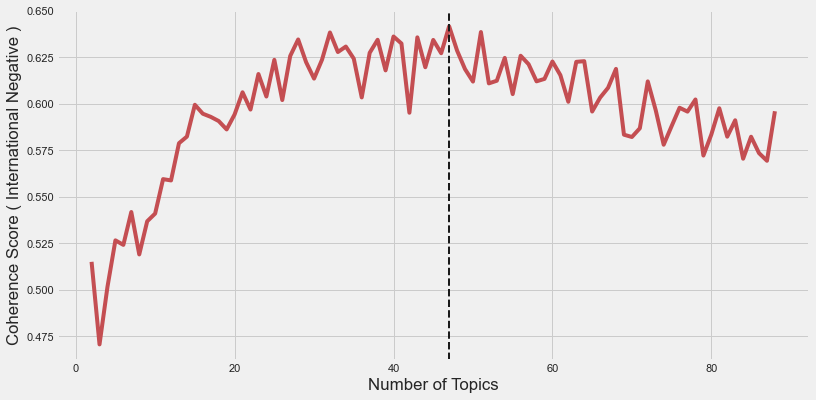

In [190]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 89, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=47, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score ( International Negative )')
#plt.axvline((three_down), color='g', linewidth=2)

**LDA Model, Post Coherence Score** | Negative International

In [191]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_n, 
                                           id2word=id2word,
                                           num_topics=47,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [192]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
32     0.301856 -0.290361  1       1        9.980458
11     0.094016 -0.384346  2       1        8.996018
6     -0.166799  0.394218  3       1        5.435808
4      0.370367  0.003568  4       1        4.894419
3     -0.261342 -0.290736  5       1        4.470313
8     -0.407470 -0.001144  6       1        3.810054
27    -0.246388  0.204542  7       1        3.781507
21     0.151929 -0.252220  8       1        3.565657
16    -0.159266 -0.338111  9       1        3.441706
23     0.311391 -0.025431  10      1        3.439859
20     0.269321  0.161585  11      1        3.429534
7      0.300902 -0.102499  12      1        3.417689
37     0.222817 -0.201892  13      1        3.375648
0     -0.297229  0.057122  14      1        3.362508
46    -0.260398 -0.146833  15      1        2.945352
28     0.153120  0.314083  16      1        2.843281
41     0.296645  0.096740  17      1        2.806479
9     -0.043707  0.319787  18      1        2.570938
44     0.068931  0.281705  19      1        2.511766
18     0.148073 -0.123478  20      1        2.195601
19     0.183647  0.173266  21      1        2.138815
10    -0.067280 -0.294957  22      1        2.091641
40     0.017298 -0.204047  23      1        2.028328
45    -0.199860 -0.089511  24      1        1.696246
14    -0.086690 -0.157476  25      1        1.490179
12    -0.184400  0.130290  26      1        1.372100
29     0.117349  0.121486  27      1        1.340721
25    -0.151388  0.031539  28      1        0.969214
31    -0.008416  0.162965  29      1        0.726986
24    -0.096733 -0.063888  30      1        0.712607
36    -0.074870  0.114637  31      1        0.625809
33     0.070883 -0.024031  32      1        0.582867
30    -0.031363  0.084137  33      1        0.505441
39    -0.020147 -0.017706  34      1        0.460048
38    -0.068129  0.037887  35      1        0.444272
42     0.004391  0.044201  36      1        0.318310
26    -0.027947  0.024512  37      1        0.154271
34    -0.022311  0.025039  38      1        0.110236
15    -0.022311  0.025040  39      1        0.106946
2     -0.022311  0.025040  40      1        0.106940
5     -0.022311  0.025040  41      1        0.106204
35    -0.022311  0.025040  42      1        0.106204
22    -0.022311  0.025040  43      1        0.106204
1     -0.022311  0.025040  44      1        0.106204
43    -0.022311  0.025040  45      1        0.106204
17    -0.022311  0.025040  46      1        0.106204
13    -0.022311  0.025040  47      1        0.106204, topic_info=               Term        Freq       Total Category  logprob  loglift
53   come            280.000000  280.000000  Default  30.0000  30.0000
8    punish          34.000000   34.000000   Default  29.0000  29.0000
205  foreigner       39.000000   39.000000   Default  28.0000  28.0000
321  district        49.000000   49.000000   Default  27.0000  27.0000
4    make            97.000000   97.000000   Default  26.0000  26.0000
..    ...                  ...         ...       ...      ...      ...
25   british         0.003099    10.579686   Topic47 -7.1546  -1.2880 
26   central         0.003099    2.114724    Topic47 -7.1546   0.3220 
27   come_effect     0.003099    1.302726    Topic47 -7.1546   0.8064 
28   criminalise     0.003099    3.257205    Topic47 -7.1546  -0.1100 
29   external_force  0.003099    10.806779   Topic47 -7.1546  -1.3093 

[2186 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
343   4      0.754675  abandon  
343   12     0.047167  abandon  
343   18     0.188669  abandon  
387   2      0.725582  access   
356   8      0.740126  accord   
...  ..           ...     ...   
252   16     0.527707  write    
252   18     0.527707  write    
492   23     0.925791  year     
354   4      0.724347  year_ago 
532   21     0.475408  yesterday

[841 rows x 3 columns], R=30, lambda_ste

Reading this & the Coherence Score, it appears as anything above ~28 is close to the center & small / insignificant respectively. Let's see what readjusting would present.

In [193]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_n, 
                                           id2word=id2word,
                                           num_topics=28,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [194]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.241991  0.272550  1       1        21.988523
4      0.362116  0.035908  2       1        9.282217 
23    -0.006629  0.350394  3       1        8.768473 
19     0.115633  0.257906  4       1        6.565049 
25     0.266299 -0.137694  5       1        5.182523 
26     0.261538  0.123283  6       1        4.981965 
15     0.020711  0.200131  7       1        4.112152 
27    -0.093828 -0.282599  8       1        3.743345 
6     -0.171209  0.229462  9       1        3.545908 
7      0.108605  0.102117  10      1        3.346664 
17     0.176235 -0.020617  11      1        3.206665 
18    -0.086712  0.170114  12      1        3.053378 
12    -0.207552 -0.169470  13      1        2.965654 
14    -0.274874  0.075246  14      1        2.570249 
22     0.050676 -0.281302  15      1        2.525062 
8     -0.295729 -0.057556  16      1        2.288359 
2     -0.183499  0.074953  17      1        2.233456 
21    -0.187541 -0.067702  18      1        2.176042 
0      0.132148 -0.146020  19      1        1.863334 
24     0.085239 -0.206516  20      1        1.726746 
16    -0.039101 -0.165329  21      1        1.485977 
13    -0.041931 -0.106626  22      1        0.803426 
10    -0.016696 -0.037058  23      1        0.443864 
1     -0.066108 -0.038745  24      1        0.438802 
9     -0.037801 -0.049599  25      1        0.285892 
20    -0.037327 -0.041744  26      1        0.138759 
5     -0.037327 -0.041744  27      1        0.138759 
3     -0.037327 -0.041744  28      1        0.138759 , topic_info=               Term        Freq       Total Category  logprob  loglift
53   come            288.000000  288.000000  Default  30.0000  30.0000
205  foreigner       29.000000   29.000000   Default  29.0000  29.0000
8    punish          39.000000   39.000000   Default  28.0000  28.0000
321  district        49.000000   49.000000   Default  27.0000  27.0000
34   law             28.000000   28.000000   Default  26.0000  26.0000
..   ...                   ...         ...       ...      ...      ...
25   british         0.004049    11.180225   Topic28 -7.1546  -1.3433 
26   central         0.004049    1.694387    Topic28 -7.1546   0.5436 
27   come_effect     0.004049    1.140198    Topic28 -7.1546   0.9397 
28   criminalise     0.004049    3.611557    Topic28 -7.1546  -0.2133 
29   external_force  0.004049    7.626910    Topic28 -7.1546  -0.9608 

[1221 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
343   2      0.792484  abandon  
343   6      0.186467  abandon  
392   7      0.748134  abroad   
387   9      0.787136  access   
356   13     0.768038  accord   
...  ..           ...     ...   
252   8      0.527652  write    
492   3      0.801464  year     
354   2      0.707223  year_ago 
532   8      0.471264  yesterday
552   12     0.784121  yu       

[795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 5, 24, 20, 26, 27, 16, 28, 7, 8, 18, 19, 13, 15, 23, 9, 3, 22, 1, 25, 17, 14, 11, 2, 10, 21, 6, 4])

This now becomes a ~25 number. Let's see what that presents.

In [195]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_n, 
                                           id2word=id2word,
                                           num_topics=25,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [196]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.127891  0.325987  1       1        17.000241
23    -0.345733  0.072499  2       1        13.986531
9     -0.222322  0.227160  3       1        8.103683 
21     0.107949  0.305526  4       1        7.992723 
7     -0.285655 -0.162122  5       1        6.681666 
19     0.249187  0.090229  6       1        4.907337 
14     0.010564  0.240323  7       1        4.861795 
17     0.230475  0.177690  8       1        4.716358 
15    -0.151691  0.108840  9       1        4.316973 
8      0.314716 -0.134852  10      1        4.096432 
12    -0.151679 -0.110501  11      1        3.176073 
20    -0.195092 -0.004466  12      1        3.018434 
18     0.003449  0.123059  13      1        2.792160 
4     -0.043175  0.011534  14      1        2.216195 
3      0.108491 -0.225123  15      1        2.122495 
6     -0.054966 -0.235280  16      1        1.984757 
13     0.017758 -0.212286  17      1        1.708294 
16     0.176129 -0.083644  18      1        1.609561 
0      0.111455 -0.006352  19      1        1.451763 
10     0.097486 -0.131341  20      1        1.204163 
2      0.015060 -0.113663  21      1        1.106781 
5      0.009790 -0.063730  22      1        0.507801 
1      0.041898 -0.066496  23      1        0.145928 
22     0.041898 -0.066496  24      1        0.145928 
24     0.041898 -0.066496  25      1        0.145928 , topic_info=               Term        Freq       Total Category  logprob  loglift
53   come            275.000000  275.000000  Default  30.0000  30.0000
8    punish          42.000000   42.000000   Default  29.0000  29.0000
205  foreigner       37.000000   37.000000   Default  28.0000  28.0000
321  district        47.000000   47.000000   Default  27.0000  27.0000
3    have            75.000000   75.000000   Default  26.0000  26.0000
..    ...                  ...         ...       ...      ...      ...
25   british         0.004258    10.940632   Topic25 -7.1546  -1.3216 
26   central         0.004258    2.143406    Topic25 -7.1546   0.3085 
27   come_effect     0.004258    1.336154    Topic25 -7.1546   0.7811 
28   criminalise     0.004258    3.009574    Topic25 -7.1546  -0.0309 
29   external_force  0.004258    10.786182   Topic25 -7.1546  -1.3074 

[1079 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
343   1      0.096102  abandon  
343   3      0.384408  abandon  
343   4      0.480510  abandon  
21    4      0.692525  act      
21    6      0.092337  act      
...  ..           ...  ...      
156   4      0.293808  worry    
156   11     0.587616  worry    
252   3      0.628785  write    
492   3      0.826094  year     
532   14     0.542248  yesterday

[716 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 24, 10, 22, 8, 20, 15, 18, 16, 9, 13, 21, 19, 5, 4, 7, 14, 17, 1, 11, 3, 6, 2, 23, 25])

We may continue down this road but let's check for duplicates first.

If there are any, we adjust accordingly.

If none, then we proceed as usual with 47 Topics.

<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame.

In [197]:
best_model_idx = coherence_df_i_n[coherence_df_i_n['Number of Topics'] == 47].index[0]
best_lda_model = lda_models[best_model_idx]

In [198]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 38,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47
Term1,come,democracy,come,secession_subversion,come,come,come,have,come,come,...,come,come,come,come,make,most,make,make,come,rapid
Term2,punishable,have,specifically,pass,abandon,blame,system,come,post,have,...,make,british,afraid,new_law,protest,tear,pass,have,hesitate,respected
Term3,offence,pro,make,come,district,district,secession_subversion,pro,local,foreigner,...,agency,clampdown,make,make,come,stifle,officecompanie,come,struggle,health
Term4,flee,simply,legislation,have,sensitive,exert,make,stop,million,punish,...,want,demonstrate,shirt,affect,have,vent,propose,district,mutual,district
Term5,appoint,pass,publish,fear,pass,protest,come_force,democracy,anti,district,...,see,small,back,criminalise,call,foreigner,revolution,business,disrupt,tap
Term6,system,make,china,end,secession_subversion,new,issue,protest,riot,new_national_security_law,...,happen,change,firmly,figure,secession_subversion,way,criticism,city,secession_subversion,consequence
Term7,have,large,section,law,national_security_law,pandemic,leave,pass,sisterhood,here,...,front,turn,freedom_speech,doubt,number,fall,capacity,criticism,determination,punish
Term8,time,delete,adviser,word,opposition,attractiveness,article,make,same,pro,...,founding,massive,suffer,several,again,new_law,allegedly,new_security_law,outraged,law
Term9,result,lot,investigation,district,make,contrast,press_freedom,act,jury,violation,...,run,turnout,discharge,major,worry,subversion_terrorism,view,troubled,punish,one
Term10,peoplecollusion,quit,right,criminalize,protest,trigger,serious,nongovernmental,parliament,democracy,...,work,extradition,have,criminalize,last_year,same,new_law,autonomy,point,freedom_speech


In [199]:
pd.set_option('display.max_colwidth', -1)
topics_df_side = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df_side

,Terms per Topic
Topic1,"come, punishable, offence, flee, appoint, system, have, time, result, peoplecollusion, security_law, pro, try, make, breaking, simple, stun, term, dangerous, visit"
Topic2,"democracy, have, pro, simply, pass, make, large, delete, lot, quit, reportedly, increasingly, impact, most, violation, dismiss, further, secession_subversion, fact, detrimental"
Topic3,"come, specifically, make, legislation, publish, china, section, adviser, investigation, right, mean, city, prosecute, bar, anti, entire, call, security_law, officer, secession_subversion"
Topic4,"secession_subversion, pass, come, have, fear, end, law, word, district, criminalize, act, make, foreigner, most, seditious, state, toothless, result, abruptly, alone"
Topic5,"come, abandon, district, sensitive, pass, secession_subversion, national_security_law, opposition, make, protest, governmental, key, year_ago, live, around, collude, reason, concern, run, rally"
Topic6,"come, blame, district, exert, protest, new, pandemic, attractiveness, contrast, trigger, economic, symbolic, case, new_security_law, global, let, worry, lead, degree, section"
Topic7,"come, system, secession_subversion, make, come_force, issue, leave, article, press_freedom, serious, subject, tell, bind, occupier, fall, discharge, new_national_security_law, judgement, apply, feature"
Topic8,"have, come, pro, stop, democracy, protest, pass, make, act, nongovernmental, venue, nightfall, point, discussion, secession_subversion, so, go, subversion, city, vehicle"
Topic9,"come, post, local, million, anti, riot, sisterhood, same, jury, parliament, minimum, rioter, other, china, protest, punish, separatism, vow, apply, interference"
Topic10,"come, have, foreigner, punish, district, new_national_security_law, here, pro, violation, democracy, law, discharge, collusion, input, organize, terrorist_activity, pull, glory, reporter, reading"


Small but check for duplicates.

In [200]:
i_n_dup = topics_df_side['Terms per Topic'].duplicated().any()
i_n_dup

False

<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame.

In [201]:
tm_results = best_lda_model[corpus]

In [202]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(44, 0.9247126),
 (3, 0.8131794),
 (17, 0.9053038),
 (11, 0.8577235),
 (11, 0.50046223)]

In [203]:
corpus_topic_df_i_n = pd.DataFrame()
corpus_topic_df_i_n['Document'] = range(0, len(news_sa_i_n))
corpus_topic_df_i_n['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df_i_n['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df_i_n['Topic Desc'] = [topics_df_side.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df_i_n['Sentences'] = news_sa_i_n['Sentences']
corpus_topic_df_i_n = corpus_topic_df_i_n.drop(['Document'], axis=1)

In [204]:
corpus_topic_df_i_n = corpus_topic_df_i_n.reset_index()
corpus_topic_df_i_n = corpus_topic_df_i_n.drop(['index'], axis=1)

Let's look closer at the importances but we will add in the Sentiment Scores (comp scores) first.

In [205]:
corpus_topic_df_i_n = pd.concat([corpus_topic_df_i_n,news_sa_i_n['comp']],
                           axis = 1, ignore_index=False)
corpus_topic_df_i_n = corpus_topic_df_i_n[['Dominant Topic', 'Contribution %','comp', 'Topic Desc', 'Sentences']]

In [206]:
corpus_topic_df_i_n = corpus_topic_df_i_n.sort_values(by='Contribution %', ascending=False)

In [207]:
corpus_topic_df_i_n.head(2)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
0,45,92.47,-0.0258,"make, have, come, district, business, city, criticism, new_security_law, troubled, autonomy, input, pass, protester, secession_subversion, call, critic, local, range, system, easy",China has passed a wide-ranging new security law for Hong Kong which makes it easier to punish protesters and reduces the city's autonomy
16,4,91.84,-0.7351,"secession_subversion, pass, come, have, fear, end, law, word, district, criminalize, act, make, foreigner, most, seditious, state, toothless, result, abruptly, alone","It states that anyone who conspires with foreigners to provoke ""hatred"" of the Chinese government, or the authorities in Hong Kong, could have committed a criminal offence"


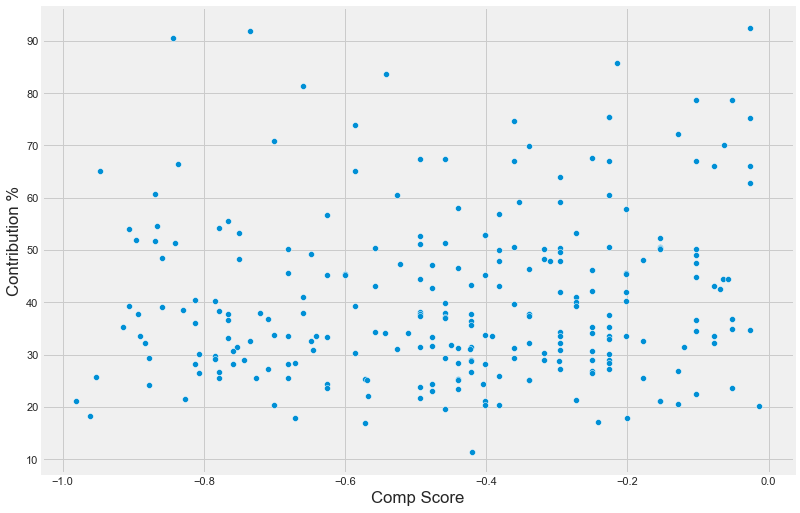

In [208]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=corpus_topic_df_i_n, x="comp", y="Contribution %")
xl = plt.xlabel('Comp Score')
yl = plt.ylabel('Contribution %')

Similar to as the Topics appear spread out on both the Contribution % & Comp Scores. 

We will now take another deeper look & break them up into seperate dataframes. Let's first look at how many each have.

In [209]:
corpus_topic_df_i_n['Dominant Topic'].value_counts()

12    77
18    15
8     13
27    11
29    10
1     9 
42    9 
34    9 
4     8 
13    7 
26    6 
15    6 
24    6 
7     6 
5     6 
39    5 
30    4 
23    4 
3     3 
37    3 
31    3 
11    3 
6     3 
46    3 
2     3 
22    3 
16    3 
19    2 
10    2 
36    2 
40    2 
38    2 
45    1 
44    1 
41    1 
9     1 
28    1 
20    1 
33    1 
32    1 
25    1 
14    1 
Name: Dominant Topic, dtype: int64

We have a unequal weight on some topics. Let's see what a histogram says.

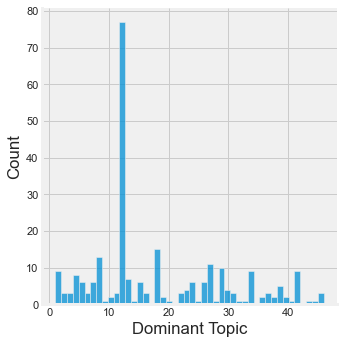

In [210]:
sns.displot(corpus_topic_df_i_n, x="Dominant Topic", bins=46)

With this, we will take a look at Topics with 7 or more observations. If there's a strong connection between them, it may be prudent to assume this subset will be connected with the others.

In [211]:
news_sa_i_n = pd.DataFrame([])
news_sa_i_n = corpus_topic_df_i_n.loc[(corpus_topic_df_i_n['Dominant Topic'] == 12) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 18) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 8) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 27) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 29) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 1) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 42) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 34) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 4) | 
                                           (corpus_topic_df_i_n['Dominant Topic'] == 13)                              
                                     ]

In [212]:
len(news_sa_i_n['Dominant Topic'].unique())

10

In [213]:
print('We are using',"{:,}%".format(round(((len(news_sa_i_n) / len(corpus_topic_df_i_n))*100),0)),'of the original dataframe with','\n',
      len(news_sa_i_n),'observations in',len(news_sa_i_n['Dominant Topic'].unique()),'Topics')

We are using 65.0% of the original dataframe with 
 168 observations in 10 Topics


In [214]:
news_sa_i_n['Dominant Topic'].value_counts()

12    77
18    15
8     13
27    11
29    10
1     9 
34    9 
42    9 
4     8 
13    7 
Name: Dominant Topic, dtype: int64

Assigning them to their own individual dataframes.

In [215]:
i_n_t12 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 12)]
i_n_t18 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 18)]
i_n_t8 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 8)]
i_n_t27 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 27)]
i_n_t29 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 29)]
i_n_t1 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 1)]
i_n_t34 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 34)]
i_n_t42 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 42)]
i_n_t4 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 4)]
i_n_t13 = news_sa_i_n.loc[(news_sa_i_n['Dominant Topic'] == 13)]

**RBL International Negative** | Reading Between the Lines on Topic 13

In [216]:
i_n_t13.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
139,13,47.93,-0.296,"have, local, democracy, make, violation, first, case, nationalism, bureau, joint_declaration, afoul, nightfall, part, allow, impact, detrimental, arise, undaunted, tiny, pro",No one wants to have to choose exile


In [217]:
print(len(i_n_t13),'| These are the number of sentences to help read between the lines.')

7 | These are the number of sentences to help read between the lines.


In [218]:
i_n_t13['Sentences'].head(8)

139     No one wants to have to choose exile                                                                                                                                                                                                      
23      Foreign nationals outside of Hong Kong face prosecution under the law (Article 38)                                                                                                                                                        
54     But pro-democracy activists have vowed to fight on, with some finding new ways to protest without falling afoul of the law, and others planning a parliament in exile                                                                      
167     The president of the European Council, Charles Michel, said: "It risks seriously undermining the high degree of autonomy of Hong Kong and will have a detrimental impact on the judiciary and the rule of law and we deplore this decision
183     But, despite quittin

This Topic appears to be to cover a few Topics a high-level summary below:
   * Discussions of carrying on in exile but don't want to leave
   * Banning a march is presented as a Human Rights use
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Human rights abuse for banning a march & protestors forced to exile**


**RBL International Negative** | Reading Between the Lines on Topic 4

In [219]:
i_n_t4.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
16,4,91.84,-0.7351,"secession_subversion, pass, come, have, fear, end, law, word, district, criminalize, act, make, foreigner, most, seditious, state, toothless, result, abruptly, alone","It states that anyone who conspires with foreigners to provoke ""hatred"" of the Chinese government, or the authorities in Hong Kong, could have committed a criminal offence"


In [220]:
print(len(i_n_t4),'| These are the number of sentences to help read between the lines.')

8 | These are the number of sentences to help read between the lines.


In [221]:
i_n_t4['Sentences'].head(9)

16      It states that anyone who conspires with foreigners to provoke "hatred" of the Chinese government, or the authorities in Hong Kong, could have committed a criminal offence                                                                                                                                 
1       Critics have called it "the end of Hong Kong" - so what do we know, and what do people fear the most                                                                                                                                                                                                        
169     Analysis by Stephen McDonell, BBC China correspondent Hong Kong's sweeping new security law is a frighteningly open-ended tool to suppress political agitation                                                                                                                                              
249     A group of foreign experts hired by the IPCC as consultants colle

This Topic appears to be connected with the China Negative tranche; a high-level summary below:
   * Discusses China's ban of foreign media
   * They identify what they believe China deems as criminal activity such as calling for HK independence, or working with a foreign entity "to incite hatred" toward the Chinese gov't
     * China viewed this as external forces
   * Believes the Law is worded vaguely 

Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Ban of foreign media, vaguely worded law which they believe China criminalizes on working with foreign entities to incite hatred towards China**


**RBL International Negative** | Reading Between the Lines on Topic 42

In [222]:
i_n_t42.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
10,42,70.91,-0.7003,"make, protest, come, have, call, secession_subversion, number, again, worry, last_year, final, foreigner, government, violent, pass, control, politically, critical, expect, opposition","Then, last year, protests over an extradition law turned violent and evolved into a broader anti-China and pro-democracy movement"


In [223]:
print(len(i_n_t42),'| These are the number of sentences to help read between the lines.')

9 | These are the number of sentences to help read between the lines.


In [224]:
i_n_t42['Sentences'].head(10)

10      Then, last year, protests over an extradition law turned violent and evolved into a broader anti-China and pro-democracy movement                                                                                                                                             
172     Bomb making                                                                                                                                                                                                                                                                   
19      Human rights organisations have pointed out how the law seems to undermine protections previously offered to defendants                                                                                                                                                       
30     ” Full details have not been released, but the security law is expected to deter speech, protests and news media critical of the Chinese government, threate

A high-level summary below:
   * The Law addresses storming the capital in protest
   * The Law applies to non-HK residents who are in violation of the Law could be arrested if stepped foot in HK
   * The Law is a Human Rights violation as it undermines protections of defendants
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **It addresses the negative aspects of the Law; notably Human Rights**


**RBL International Negative** | Reading Between the Lines on Topic 34

In [225]:
i_n_t34.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
38,34,60.43,-0.5267,"come, make, new_security_law, pass, act, secession_subversion, have, authority, protester, protest, change, model, activity, nonetheless, pm, anti, own, as, delete, recognize",Some protesters may ignore the order and march


In [226]:
print(len(i_n_t34),'| These are the number of sentences to help read between the lines.')

9 | These are the number of sentences to help read between the lines.


In [227]:
i_n_t34['Sentences'].head(10)

38      Some protesters may ignore the order and march                                                                                                                                                                                                                                                                                                                                                                                                               
77      However, China threatened on Friday to stop recognizing the British National Overseas passports held by millions of Hong Kongers, which could prevent the three million from leaving at all                                                                                                                                                                                                                                                                  
75     \n\n\n\n\n\n\n\n\n\n\n\n                                A group of Hong Kongers at a 

A high-level summary below:
   * Riot police actions towards the protestors 
   * Tactics of protestors
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The actions & tactics of police & protestors respectively**


**RBL International Negative** | Reading Between the Lines on Topic 1

In [228]:
i_n_t1.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
36,1,54.02,-0.9062,"come, punishable, offence, flee, appoint, system, have, time, result, peoplecollusion, security_law, pro, try, make, breaking, simple, stun, term, dangerous, visit","The Hong Kong police force has denied applications from three groups — the League of Social Democrats, the Civil Human Rights Front and pro-democracy district officials — to hold marches opposing the law on July 1, the politically sensitive anniversary of Hong Kong’s handover to Chinese rule, citing risks from the coronavirus and dangers of violence"


In [229]:
print(len(i_n_t1),'| These are the number of sentences to help read between the lines.')

9 | These are the number of sentences to help read between the lines.


In [230]:
i_n_t1['Sentences'].head(10)

36     The Hong Kong police force has denied applications from three groups — the League of Social Democrats, the Civil Human Rights Front and pro-democracy district officials — to hold marches opposing the law on July 1, the politically sensitive anniversary of Hong Kong’s handover to Chinese rule, citing risks from the coronavirus and dangers of violence                                                                                                                                                                                                                          
88      Arson is now listed as a terror offence                                                                                                                                                                                                                                                                                                                                                                                        

A high-level summary below:
   * Arson now listed as a terror offence
   * Previous engagement listed as a terrorist offense
   * Gas masks, molotov cocktails & empty tear-gas canisters used by protestors
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Discussions of what is listed as a terrorist offense under the law & protestor's actions / strategies**


**RBL International Negative** | Reading Between the Lines on Topic 29

In [231]:
i_n_t29.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
29,29,74.6,-0.3612,"make, come, law, district, want, act, secession_subversion, away, violence, organisation, foreigner, terrorism_collusion, have, local, new_security_law, communist, news, subversion, addition, campus","The Basic Law, which enshrines Hong Kong’s special legal status, says the semiautonomous territory should enact legislation that outlaws “any act of treason, secession, sedition, subversion"


In [232]:
print(len(i_n_t29),'| These are the number of sentences to help read between the lines.')

10 | These are the number of sentences to help read between the lines.


In [233]:
i_n_t29['Sentences'].head(11)

29      The Basic Law, which enshrines Hong Kong’s special legal status, says the semiautonomous territory should enact legislation that outlaws “any act of treason, secession, sedition, subversion                                                                      
5      People suspected of breaking the law can be wire-tapped and put under surveillanceManagement of foreign non-governmental organisations and news agencies will be strengthenedThe law will also apply to non-permanent residents and people "from outside [Hong Kong]
188     The law has caused alarm in Hong Kong but officials say it will restore stability after violent protests                                                                                                                                                           
173     The law, announced by Beijing in May, will make criminal any act of secession, subversion of the central government, terrorism or collusion with foreign or external forces                 

A high-level summary below:
   * Acknowledgement of China's position that the Law will restore stability & China's position on foreign influence
   * Wiretapping of suspects
   * The Law applies to those outside of HK
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Acknowledgement of China's position that the Law will restore stability, wiretapping suspects & the Law applying to those outside of HK**


**RBL International Negative** | Reading Between the Lines on Topic 27

In [234]:
i_n_t27.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
8,27,83.69,-0.5423,"come, make, district, secession_subversion, foreigner, pass, have, punish, freedom_speech, new, month, abandon, aggressively, criminalise, search, work, local, read, country_system, investigate",Such campaigning could become a crime in the future


In [235]:
print(len(i_n_t27),'| These are the number of sentences to help read between the lines.')

11 | These are the number of sentences to help read between the lines.


In [236]:
i_n_t27['Sentences'].head(12)

8       Such campaigning could become a crime in the future                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
12      If you want to find out more about China-Hong Kong tensions read more here: The city of two masks faces a new crisisWhat is the Basic Law and how does it work                                                                                                                                                                                                                                                

This Topic appears to be based on a single topic a high-level summary below:
   * The international community believes the Law is a violation of "one country, two systems" under Basic Law which was agreed upon when HK was handed back
   

Explained above:
   * **The int'l community believes the Law is a violation of "one country, two systems" under Basic Law which was agreed upon when HK was handed back**


**RBL International Negative** | Reading Between the Lines on Topic 8

In [237]:
i_n_t8.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
15,8,72.15,-0.128,"have, come, pro, stop, democracy, protest, pass, make, act, nongovernmental, venue, nightfall, point, discussion, secession_subversion, so, go, subversion, city, vehicle","""Its criminal provisions are worded in such a broad manner as to encompass a swath of what has so far been considered protected speech,"" said a posting on its website"


In [238]:
print(len(i_n_t8),'| These are the number of sentences to help read between the lines.')

13 | These are the number of sentences to help read between the lines.


In [239]:
i_n_t8['Sentences'].head(14)

15      "Its criminal provisions are worded in such a broad manner as to encompass a swath of what has so far been considered protected speech," said a posting on its website                                                                                                                                                                                                                                             
122     "I won't be surprised if some journalists wind up being charged under this law at some point in the not too distant future," Richardson said                                                                                                                                                                                                                                                                       
179     Pro-democracy activists in Hong Kong began to quit, fearful of the new law, and the punishment it allows                                                                

This Topic appears to be split on a few topics; a high-level summary below:
   * Poorly worded law
   * Possible suppression of free speech by journalists who may end up in jail
     * This would have a major negative impact on HK as a financial center
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Poorly worded Law & possible suppression of Free Speech which the latter would negatively impact HK's status as a financial center**


**RBL International Negative** | Reading Between the Lines on Topic 18

In [240]:
i_n_t18.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
2,18,90.53,-0.8442,"come, authority, violate, foreign, violence, controversial, punish, protest, make, pressure, breaking, criminalise, power, protect, office, chinese, external_force, offence, opposed, freedom_speech","It criminalises any act of: secession - breaking away from the countrysubversion - undermining the power or authority of the central governmentterrorism - using violence or intimidation against peoplecollusion with foreign or external forces The law came into effect at 23:00 local time on 30 June, an hour before the 23rd anniversary of the city's handover to China from British rule"


In [241]:
print(len(i_n_t18),'| These are the number of sentences to help read between the lines.')

15 | These are the number of sentences to help read between the lines.


In [242]:
i_n_t18['Sentences'].head(16)

2       It criminalises any act of: secession - breaking away from the countrysubversion - undermining the power or authority of the central governmentterrorism - using violence or intimidation against peoplecollusion with foreign or external forces The law came into effect at 23:00 local time on 30 June, an hour before the 23rd anniversary of the city's handover to China from British rule
195     Beijing rejects this                                                                                                                                                                                                                                                                                                                                                                            
61      Cheng said he was tortured by Chinese agents                                                                                                                                                                  

This Topic appears to be separated into two (2) categories a high-level summary below:
   * International overserves believe the new Law goes against common law & threatens the people of HK's freedom
     * They acknowledge China's opinion to be the opposite
   * Arrests started the first day after the Law was introduced

A slightly connected theme on this Topic:
   * **The difference in opinion on the ramifications of the Law & the beginnings of arrests**


**RBL International Negative** | Reading Between the Lines on Topic 12

In [243]:
i_n_t12.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
3,12,85.77,-0.2144,"come, make, call, number, have, protest, pass, punishable, secession_subversion, tiny, violence, local, consider, enforcement, officecompanie, again, new, abandon, district, act","The new law's key provisions include that: Crimes of secession, subversion, terrorism and collusion with foreign forces are punishable by a maximum sentence of life in prisonDamaging public transport facilities can be considered terrorismThose found guilty will not be allowed to stand for public officeCompanies can be fined if convicted under the lawBeijing will establish a new security office in Hong Kong, with its own law enforcement personnel - neither of which would come under the local authority's jurisdictionThis office can send some cases to be tried in mainland China - but Beijing has said it will only have that power over a ""tiny number"" of cases In addition, Hong Kong will have to establish its own national security commission to enforce the laws, with a Beijing-appointed adviser Hong Kong's chief executive will have the power to appoint judges to hear national security cases, raising fears about judicial autonomyImportantly, Beijing will have power over how the law should be interpreted, not any Hong Kong judicial or policy body"


In [244]:
print(len(i_n_t12),'| These are the number of sentences to help read between the lines.')

77 | These are the number of sentences to help read between the lines.


We will not read over 77 lines; let us look at the distribution of the `Contribution %`.

In [245]:
i_n_t12.describe()

,Dominant Topic,Contribution %,comp
count,77.0,77.000000,77.000000
mean,12.0,43.046234,-0.416130
std,0.0,15.411270,0.256378
min,12.0,17.800000,-0.946900
25%,12.0,31.460000,-0.585900
50%,12.0,37.980000,-0.401900
75%,12.0,51.750000,-0.202300
max,12.0,85.770000,-0.025800


In [246]:
print(len(i_n_t12.loc[(i_n_t12['Contribution %'] >= 51.75)]), 'Fall at or above the 75% mark; let\'s work with that')

20 Fall at or above the 75% mark; let's work with that


In [247]:
i_n_t12_abbreviated = i_n_t12.loc[(i_n_t12['Contribution %'] >= 51.75)]

In [248]:
i_n_t12_abbreviated['Sentences'].head(21)

3       The new law's key provisions include that: Crimes of secession, subversion, terrorism and collusion with foreign forces are punishable by a maximum sentence of life in prisonDamaging public transport facilities can be considered terrorismThose found guilty will not be allowed to stand for public officeCompanies can be fined if convicted under the lawBeijing will establish a new security office in Hong Kong, with its own law enforcement personnel - neither of which would come under the local authority's jurisdictionThis office can send some cases to be tried in mainland China - but Beijing has said it will only have that power over a "tiny number" of cases  In addition, Hong Kong will have to establish its own national security commission to enforce the laws, with a Beijing-appointed adviser Hong Kong's chief executive will have the power to appoint judges to hear national security cases, raising fears about judicial autonomyImportantly, Beijing will have power over how the law 

This Topic appears to be similar to Topic 12 above; a high-level summary below:
   * International overserves believe the new Law goes against common law & threatens the people of HK's freedom
     * They acknowledge China's opinion to be the opposite
   * They outline the outcomes of the below as prison time ranging from 3 years to life
     * Secession, subversion, terrorism and collusion with foreign forces 
   * The Law has a negative effect on the pro-democracy movement & the protestors have adjusted their tactics
  
The shorter & simplier summary on this Topic:
   * **International overserves outline outcomes of those not complying with the Law, how these go against Common Law & protestors have had to adjust their tactics**


**RBL International Negative :: Summary** | This is the end of Reading Between the Lines on International Negative

Here we will outline the individual summaries for each:
   * **Topic 13**  | Ban of foreign media, vaguely worded law which they believe China criminalizes on working with foreign entities to incite hatred towards China
   * **Topic 4**  | Human rights abuse for banning a march & protestors forced to exile
   * **Topic 42**  | It addresses the negative aspects of the Law; notably Human Rights
   * **Topic 34**  | The actions & tactics of police & protestors respectively
   * **Topic 1**  | Discussions of what is listed as a terrorist offense under the law & protestor's actions / strategies
   * **Topic 29**  | Acknowledgement of China's position that the Law will restore stability, wire tapping suspects & the Law appling to those outside of HK
   * **Topic 27**  | The int'l community believes the Law is a violation of "one country, two systems" under Basic Law which was agreed upon when HK was handed back
   * **Topic 8**  | Poorly worded Law & possible suppression of Free Speech which the latter would negatively impact HK's status as a financial center
   * **Topic 18**  | The difference in opinion on the ramifications of the Law & the beginnings of arrests
   * **Topic 12**  | International overserves outline outcomes of those not complying with the Law, how these go against Common Law & protestors have had to adjust their tactics

The base of the Negative Section for International can be Summarized overall as:
   * Their belief of the Law's infringement on Common Law 
   * Their credence towards the vagueness of the language used in the Law
   * Their position on the Law's potential ramifications
     * <i>They outline China's opinion as well</i>
   * The actions & tactics of police & protestors respectively

Below we will show thirty (30) observations that encapsulate the International News Articles Negative Scores

In [249]:
i_n = news_sa_i_n.copy()
i_n_top = pd.DataFrame([])
i_n_top = i_n_top.append([
                            i_n['Sentences'][93],i_n['Sentences'][198],i_n['Sentences'][123],i_n['Sentences'][188],i_n['Sentences'][19],
                            i_n['Sentences'][32],i_n['Sentences'][102],i_n['Sentences'][160],i_n['Sentences'][173],i_n['Sentences'][92],
                            i_n['Sentences'][83],i_n['Sentences'][91],i_n['Sentences'][227],i_n['Sentences'][89],i_n['Sentences'][88],
                            i_n['Sentences'][45],i_n['Sentences'][128],i_n['Sentences'][99],i_n['Sentences'][137],i_n['Sentences'][81],
                            i_n['Sentences'][224],i_n['Sentences'][15],i_n['Sentences'][130],i_n['Sentences'][131],i_n['Sentences'][113],
                            i_n['Sentences'][157],i_n['Sentences'][122],i_n['Sentences'][5],i_n['Sentences'][204],i_n['Sentences'][72]])
i_n_top.columns = ['Sentences']
i_n_top['Sentences']

0     (AP: Kin Cheung)These include cases allegedly involving collusion with foreign forces, but it's still not known how suspects will be taken to the mainland, given Hong Kong has no formal extradition arrangements with Beijing                                                                                                                                                                                                                                                                                                                                                                           
1     View original tweet on Twitter Beijing has dismissed criticism of the law, saying it is necessary to stop the type of mass pro-democracy protests seen in Hong Kong during much of 2019, which at times exploded into very violent clashes between protesters and police                                                                                                                                         

We will highlight a sentence from each of the top identified themes within this Topic

Their belief of the Law's infringement on Common Law

In [459]:
i_n_top['Sentences'][11]

'Up until now, Hong Kong has boasted a proudly independent judiciary and a separate, common-law-based legal system — but that will also face unprecedented pressure under the new law'

Their credence towards the vagueness of the language used in the Law

In [487]:
i_n_top['Sentences'][21][2:135]

'Its criminal provisions are worded in such a broad manner as to encompass a swath of what has so far been considered protected speech'

Their position on the Law's potential ramifications

In [507]:
i_n_top['Sentences'][16][3:123]

'It violates Hong Kong’s high degree of autonomy and threatens the freedoms and rights protected by the joint declaration'

The actions & tactics of police & protestors respectively

In [464]:
i_n_top['Sentences'][23][2:]

'Riot police fire tear gas into the crowds to disperse anti-national security law protesters'

In [471]:
i_n_top['Sentences'][19]

'Hong Kong police said they arrested a man holding a flag advocating for independence, the first arrest under the new laws'

In [469]:
i_n_top['Sentences'][29][23:]

'Holding protest signs and chanting anti-China slogans are forbidden under the national-security law'

In [475]:
i_n_top['Sentences'][18][1:]

'Displays at the venue included gasmasks used by demonstrators, and empty tear-gas canisters'

**Topic Review** | Positive China

In [253]:
news_sa_l_p.head(1)

,file_name,date,source,country,local,Sentences,comp,neg,neu,pos
0,peoples_daily_1,2020-07-03,People's Daily,China,Local,"Newly passed national security law a seawall safeguarding long-term prosperity, stability of Hong Kong The Law of the People’s Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) adopted on June 30 by the Standing Committee of the 13th National People’s Congress (NPC), China’s top legislature, has established a seawall safeguarding the long-term prosperity and stability of Hong Kong",0.9118,0.0,0.782,0.218


**Lemmatization** | Positive China

In [254]:
lemmatized_c_p = lemmatization(news_sa_l_p['Sentences'])
print(lemmatized_c_p[0][0:90])

newly pass national security law seawall safeguard long term prosperity stability adopt 13


**Stop of Removal** | Positive China

In [255]:
data_words_c_p = gen_words(lemmatized_c_p)
print(data_words_c_p[0][0:10])

['newly', 'pass', 'national', 'security', 'law', 'seawall', 'safeguard', 'long', 'term', 'prosperity']


**Bag of Words** | Positive China

In [256]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words_c_p)

corpus_c_p = []
for text in data_words_c_p:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus_c_p.append(new)

print (corpus_c_p[0][0:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2)]


Making some sense of this.

In [257]:
word_c_n = id2word[[1][:][0]]
print(word_c_n)

establish


**Bigrams & Trigrams** | Positive China

In [258]:
bigrams_phrases_c_p = gensim.models.Phrases(data_words_c_p,min_count=5, threshold=3)
trigrams_phrases_c_p = gensim.models.Phrases(bigrams_phrases_c_p[data_words_c_p], threshold=3)

bigram_c_p = gensim.models.phrases.Phraser(bigrams_phrases_c_p)
trigram_c_p = gensim.models.phrases.Phraser(trigrams_phrases_c_p)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams_c_p = make_bigrams(data_words_c_p)
data_bigrams_trigrams_c_p = make_trigrams(data_bigrams_c_p)

In [259]:
print(data_bigrams_trigrams_c_p[0][0:9])

['newly', 'pass', 'national_security_law', 'seawall', 'safeguard', 'long', 'term', 'prosperity_stability', 'adopt']


In [260]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams_c_p)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams_c_p

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus_c_p, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus_c_p[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus_c_p[i] = new_bow


**LDA Model** | Positive China

In [261]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_c_p, 
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10,
                                           alpha="auto")


In [262]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_c_p, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.110151 -0.287925  1       1        30.611109
4      0.096227  0.261208  2       1        14.861973
5     -0.110482 -0.208203  3       1        13.069769
3     -0.145600  0.174395  4       1        11.258165
0      0.069212  0.069550  5       1        10.839796
2      0.243281 -0.017396  6       1        10.321222
6     -0.262789  0.008371  7       1        9.037965 , topic_info=             Term        Freq       Total Category  logprob  loglift
6     newly        104.000000  104.000000  Default  30.0000  30.0000
12    th           103.000000  103.000000  Default  29.0000  29.0000
3     legislature  92.000000   92.000000   Default  28.0000  28.0000
67    center       25.000000   25.000000   Default  27.0000  27.0000
154   see          24.000000   24.000000   Default  26.0000  26.0000
...   ...                ...         ...       ...      ...      ...
2     have         9.063739    49.341248   Topic7  -3.7056   0.7093 
52    question     3.829422    7.901226    Topic7  -4.5672   1.6794 
66    business     4.491141    20.301343   Topic7  -4.4078   0.8952 
1228  comply       3.337633    7.738254    Topic7  -4.7046   1.5628 
343   lie          3.278153    8.755192    Topic7  -4.7226   1.4214 

[312 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
927   6      0.825360  ability   
1025  4      0.798845  accordance
1225  2      0.832910  account   
463   5      0.867814  affirm    
271   1      0.969092  aim       
...  ..           ...     ...    
124   3      0.078205  when      
1203  4      0.914533  wide      
595   5      0.953668  wording   
41    5      0.943522  world     
1194  3      0.753952  worth     

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 4, 1, 3, 7])

**Coherence Score** | Positive China

In [263]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus_c_p,
                                                      texts=data_bigrams_trigrams_c_p,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

print('Avg. Coherence Score (Cv):', avg_coherence_cv)

Avg. Coherence Score (Cv): 0.7107946806716244


In [264]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_c_p, texts=data_bigrams_trigrams_c_p,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=88, step=1, cpus=4)


100%|██████████| 87/87 [08:19<00:00,  5.74s/it]


In [265]:
coherence_df_c_p = pd.DataFrame({'Number of Topics': range(2, 89, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df_c_p.sort_values(by=['Coherence Score'], ascending=False).head(10)


,Number of Topics,Coherence Score
46,48,0.7135
48,50,0.7101
39,41,0.7081
27,29,0.7075
56,58,0.7073
3,5,0.7043
11,13,0.7039
64,66,0.7028
38,40,0.7026
59,61,0.7026


**Coherence Score Visual** | Postive China

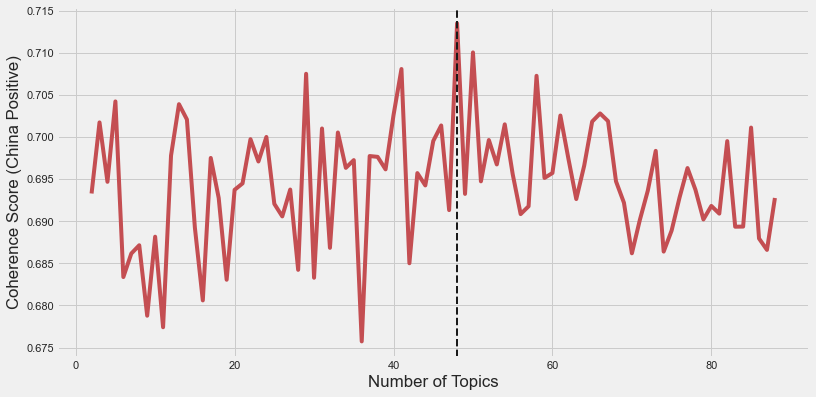

In [268]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 89, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=48, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score (China Positive)')
#plt.axvline((three_down), color='g', linewidth=2)

**LDA Model, Post Coherence Score** | Positive China

In [269]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_c_p, 
                                           id2word=id2word,
                                           num_topics=48,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [270]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_c_n, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.167185  0.056179  1       1        7.274922
9      0.099203 -0.302198  2       1        6.218486
30     0.403704  0.071342  3       1        5.513196
17     0.262822 -0.288149  4       1        4.599428
28    -0.210957  0.455231  5       1        4.579680
38     0.408211  0.202966  6       1        4.559521
8      0.225547  0.135384  7       1        4.208805
27    -0.429169 -0.215655  8       1        3.622825
18     0.208461 -0.260060  9       1        3.502810
45    -0.178178 -0.278496  10      1        3.298042
43    -0.021244 -0.328563  11      1        3.115354
23     0.288674 -0.195410  12      1        3.096116
5     -0.333318 -0.065561  13      1        3.056762
1      0.440669 -0.062457  14      1        3.048761
22     0.136892  0.288351  15      1        3.037952
15     0.098341 -0.002436  16      1        2.730295
31    -0.239136 -0.193790  17      1        2.500578
29    -0.357030  0.078856  18      1        2.491274
46    -0.290497  0.202096  19      1        2.455379
47     0.261691  0.275749  20      1        2.392662
6     -0.068052 -0.135397  21      1        1.794873
14    -0.199432  0.184302  22      1        1.764610
40     0.030556  0.404338  23      1        1.748446
37    -0.044840  0.198779  24      1        1.711427
16    -0.127474 -0.116538  25      1        1.673690
44     0.032139 -0.184630  26      1        1.557054
26    -0.096348 -0.331998  27      1        1.469190
13     0.240136 -0.083764  28      1        1.421892
12    -0.021313 -0.042889  29      1        1.398212
32     0.227568 -0.040445  30      1        1.387342
42    -0.109161  0.116887  31      1        1.319641
0      0.156332  0.075931  32      1        1.205435
24    -0.232412  0.007038  33      1        1.145926
10    -0.104712  0.250835  34      1        1.054899
35    -0.076238 -0.013496  35      1        0.900647
25     0.203985  0.291288  36      1        0.854720
39    -0.162662 -0.055084  37      1        0.420263
41     0.060324  0.101217  38      1        0.419070
2      0.010773 -0.125251  39      1        0.341507
34    -0.048569  0.061912  40      1        0.271136
21    -0.034763 -0.017052  41      1        0.105181
33    -0.034763 -0.017052  42      1        0.105156
36    -0.034763 -0.017052  43      1        0.104472
20    -0.034763 -0.017052  44      1        0.104472
19    -0.034763 -0.017052  45      1        0.104472
11    -0.034763 -0.017052  46      1        0.104472
7     -0.034763 -0.017052  47      1        0.104472
3     -0.034763 -0.017052  48      1        0.104472, topic_info=            Term       Freq      Total Category  logprob  loglift
21   list         96.000000  96.000000  Default  30.0000  30.0000
30   constantly   50.000000  50.000000  Default  29.0000  29.0000
12   th           43.000000  43.000000  Default  28.0000  28.0000
6    newly        44.000000  44.000000  Default  27.0000  27.0000
105  seat         34.000000  34.000000  Default  26.0000  26.0000
..    ...               ...        ...      ...      ...      ...
25   stand        0.001888   3.944684   Topic48 -7.1452  -0.7804 
26   terminate    0.001888   7.852237   Topic48 -7.1452  -1.4688 
27   unguarded    0.001888   1.507052   Topic48 -7.1452   0.1818 
28   agency       0.001888   0.771690   Topic48 -7.1452   0.8512 
29   consecutive  0.001888   0.771690   Topic48 -7.1452   0.8512 

[2232 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
203   9      0.719373  able    
241   32     0.606380  achieve 
646   26     0.741088  activist
94    12     0.535935  address 
0     9      0.729009  adopt   
...   ..          ...      ... 
158   7      0.540724  whole   
351   16     0.943920  word    
595   4      0.712441  wording 
41    34     0.859338  world   
42    16     0.943942  year    

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'

Visually, it appears that there's:
   * A notable amount of overlap.
   * Topics 41+ are too small

We will go deeper on each next.

<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame

In [273]:
best_model_idx = coherence_df_c_n[coherence_df_c_n['Number of Topics'] == 48].index[0]
best_lda_model = lda_models[best_model_idx]

In [274]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48
Term1,legislature,list,list,see,list,list,domestic,decision,great,list,...,legislature,list,legislature,newly,th,newly,list,list,list,easy
Term2,list,newly,great,th,newly,legislature,resurgence,clearly,legislature,investor,...,list,rampage,make,th,newly,th,new_law,have,legislature,list
Term3,scaremongering,th,unable,legislature,th,newly,go,sharp,confront,greatly,...,have,when,list,unable,list,seawall,true,th,true,legislature
Term4,include,legislature,central_government,life,territorial,th,clearly,resolve,ensure,prosperity_stability,...,newly,repeatedly,maintain,seawall,legislature,make,newly,newly,secessionist,great
Term5,confidence,true,unanimously,damage,enable,life,purchase,swiss,indian,citizen,...,th,master,sign,own,true,list,round,celebrate,great,unable
Term6,tell,seawall,meanwhile,newly,black,seat,meeting,freedom_speech,well,make,...,great,year_ago,drive,regard,take,shipping,deescalate,unable,unable,have
Term7,great,when,view,directly,vast,technology,respective,sake,ease,have,...,seawall,great,systematic,establish,investor,reflect,area,national_security_law,th,hope
Term8,reflect,region,create,kind,curb,dissent,arbitrary,deep,proscribe,management,...,unable,put,democracy,seat,great,ability,train,top,newly,predict
Term9,procedure,competitive,sustain,relevant,have,accord,resolutely,storm,life,promote,...,decision,safeguard,ironically,resolve,supervision,own,billboard,safeguard,investor,make
Term10,implement,position,much,host,forward,take,range,security,procedure,coordinate,...,investor,freedom,advance,legislature,have,society,category,great,eager,clothe


In [275]:
pd.set_option('display.max_colwidth', -1)
topics_df_side = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df_side

,Terms per Topic
Topic1,"legislature, list, scaremongering, include, confidence, tell, great, reflect, procedure, implement, troublemaker, inherent, true, unable, ask, seat, officer, most, crucial, enforce"
Topic2,"list, newly, th, legislature, true, seawall, when, region, competitive, position, constantly, external_force, citizen, investor, take, create, intelligence, unable, legislation, restore"
Topic3,"list, great, unable, central_government, unanimously, meanwhile, view, create, sustain, much, black, channel, return_motherland, analyst, ensure, lawmaker, treat, external, course, declare"
Topic4,"see, th, legislature, life, damage, newly, directly, kind, relevant, host, as, put, view, foil, vast, territory, affect, announce, unanimously, thank"
Topic5,"list, newly, th, territorial, enable, black, vast, curb, have, forward, rioter, agency, national_security_law, national_security_legislation, believe, aspiration, region, stand, national_security, march"
Topic6,"list, legislature, newly, th, life, seat, technology, dissent, accord, take, advance, approve, talk, network, direction, safeguard_national_security, adopt, exclusive, build, follow"
Topic7,"domestic, resurgence, go, clearly, purchase, meeting, respective, arbitrary, resolutely, range, hope, continue, when, make, spread, own, wreak, level, restore, implementation"
Topic8,"decision, clearly, sharp, resolve, swiss, freedom_speech, sake, deep, storm, security, rd_anniversary, easy, scene, decide, have, question, true, sustain, exist, world"
Topic9,"great, legislature, confront, ensure, indian, well, ease, proscribe, life, procedure, external_force, suggestion, duty, birthday, repeatedly, true, contain, investor, serve, round"
Topic10,"list, investor, greatly, prosperity_stability, citizen, make, have, management, promote, coordinate, multi, sector, away, politic, epidemic, funding, rd_anniversary, training, thank, world"


Large; let's check for duplicates

In [276]:
cn_p_dup = topics_df_side['Terms per Topic'].duplicated().any()
cn_p_dup

False

<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame

In [277]:
tm_results = best_lda_model[corpus]

In [278]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(33, 0.95104104),
 (33, 0.75520456),
 (4, 0.55472296),
 (15, 0.7743334),
 (15, 0.5252996)]

In [281]:
corpus_topic_df_l_p = pd.DataFrame()
corpus_topic_df_l_p['Document'] = range(0, len(news_sa_l_p))
corpus_topic_df_l_p['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df_l_p['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df_l_p['Topic Desc'] = [topics_df_side.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df_l_p['Sentences'] = news_sa_l_p['Sentences']
corpus_topic_df_l_p = corpus_topic_df_l_p.drop(['Document'], axis=1)

In [282]:
corpus_topic_df_l_p = corpus_topic_df_l_p.reset_index()
corpus_topic_df_l_p = corpus_topic_df_l_p.drop(['index'], axis=1)

In [283]:
corpus_topic_df_l_p = pd.concat([corpus_topic_df_l_p,news_sa_l_p['comp']],
                           axis = 1, ignore_index=False)
corpus_topic_df_l_p = corpus_topic_df_l_p[['Dominant Topic', 'Contribution %','comp', 'Topic Desc', 'Sentences']]

In [284]:
corpus_topic_df_l_p.sort_values(by='Contribution %', ascending=False)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
0,34,95.10,0.9118,"national_security_law, safeguard, standard, fulfil, celebrate, list, have, top, term, seawall, investor, situation, century, when, refute, establish, prosperity_stability, thick, example, opportunity","Newly passed national security law a seawall safeguarding long-term prosperity, stability of Hong Kong The Law of the People’s Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) adopted on June 30 by the Standing Committee of the 13th National People’s Congress (NPC), China’s top legislature, has established a seawall safeguarding the long-term prosperity and stability of Hong Kong"
18,32,80.42,0.2732,"th, system, newly, manage, law, unable, easy, seawall, implement, have, list, great, viewpoint, region, police, external_force, investor, embrace, world, damage",It bears both practical and historical significance
7,24,77.61,0.7096,"list, terminate, th, newly, easy, legislature, seawall, true, vote, violence, law_people, authorization, strength, and, status, effective, determined, century, foreign, swiss","\n\n\tThe efforts of China’s central government to plug the loopholes in safeguarding national security in Hong Kong, stop violence and curb disorder with effective measures, and restore the region’s sound legal and business environment are not only in line with the common interests of all sectors of Hong Kong society as well as foreign investors in the region, but also important guarantee of Hong Kong’s status as a global financial, trade, and shipping center"
3,16,77.43,0.4404,"list, seat, have, push, member, authenticate, historic, master, hold, newly, distort, th, rating, unable, complex, past, lose, social_unrest, office, title","\n\n\tWith international agencies constantly downgrading Hong Kong’s credit rating because of its social unrest, the region lost its title as the world’s freest economy, which it had maintained for 25 consecutive years"
12,31,77.42,0.9750,"th, newly, list, legislature, unable, life, come, school, anti, regard, important, region, shift, substantive, protect, office, shipping, bring, achieve, take","\n\n\tThe introduction of the national security law brings Hong Kong citizens the freedom of enjoying a peaceful life without concerns about the threat of black-clad rioters, the freedom of safe business operation, and the freedom of safe trips to office and school"
...,...,...,...,...,...
265,7,15.90,0.1280,"domestic, resurgence, go, clearly, purchase, meeting, respective, arbitrary, resolutely, range, hope, continue, when, make, spread, own, wreak, level, restore, implementation","\nAustralian Broadcasting Corporation: The Australian government today announced a ten-year, 270-billion-dollar defense upgrade plan, including the purchase of long-range missiles because of changing circumstances in the Indo-Pacific region"
228,11,15.90,0.9274,"newly, th, seawall, country_system, great, unable, anti, list, comprehensively, society, livelihood, demonstrate, defense, establish, solid, foreign, china, international, cooperation, march","They believe that the move is beneficial for the steady and long-term success of the ""one country, two systems"" principle and Hong Kong's lasting prosperity and stability, and guarantees that Hong Kong residents can better exercise rights and freedoms in a safe environment"
111,38,15.71,0.8981,"list, newly, th, great, investor, unity, tranquility, distort, ability, people, dear, important, create, damage, legislature, content, give, clearly, serve, proxy","An expert on international intelligence and security who asked not to be named told the Global Times that ""Hong Kong is an important financial hub and intelligence exchange center, and the UK has tried very hard to retain its inappropriate influence in its former colony, such as keeping engagements with Hong Kong politicians, funding and training proxies to influence the education sectors, as we

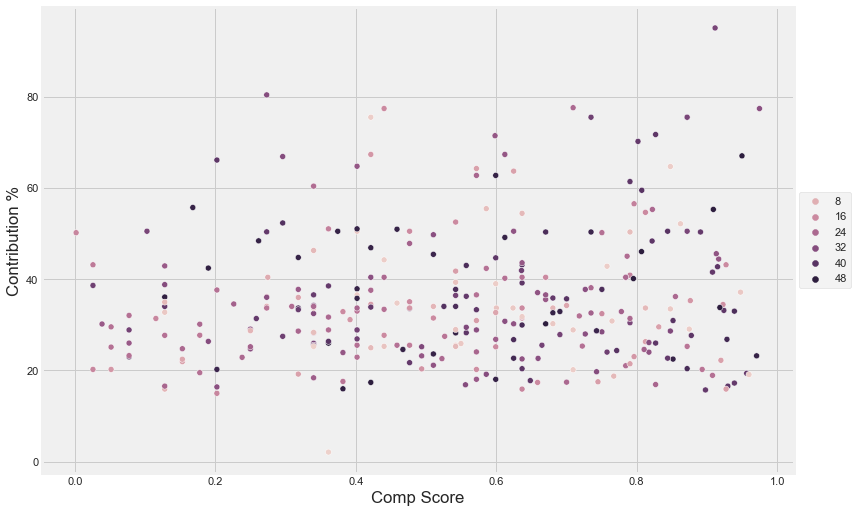

In [300]:
plt.figure(figsize=(12, 8))
s = sns.scatterplot(data=corpus_topic_df_l_p, x="comp", y="Contribution %", hue="Dominant Topic")
s.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
xl = plt.xlabel('Comp Score')
yl = plt.ylabel('Contribution %')

The Topics appear spread out on both the Contribution % & Comp Scores.

We will now take another deeper look & break them up into seperate dataframes. Let's first look at how many each have.

In [287]:
corpus_topic_df_l_p['Dominant Topic'].value_counts()

22    22
46    19
24    15
39    15
38    15
16    14
31    13
2     12
32    11
3     10
11    10
40    9 
34    9 
29    8 
48    8 
6     8 
42    8 
30    7 
28    7 
36    7 
25    7 
13    6 
26    6 
21    6 
23    5 
17    5 
35    5 
4     4 
45    4 
7     4 
10    4 
12    4 
33    4 
15    3 
18    3 
9     3 
41    3 
5     3 
27    3 
47    3 
37    2 
43    2 
44    2 
20    2 
1     2 
14    1 
19    1 
Name: Dominant Topic, dtype: int64

The China Positive section appears to be dominated by ~11 Topics. Let's see how much that presents to the total.

In [298]:
corpus_topic_df_l_p.describe()

,Dominant Topic,Contribution %,comp
count,324.000000,324.000000,324.000000
mean,26.243827,35.277346,0.540383
std,13.425144,14.241636,0.245888
min,1.000000,2.080000,0.001800
25%,16.000000,25.520000,0.340000
50%,27.000000,32.950000,0.557400
75%,38.000000,41.047500,0.746400
max,48.000000,95.100000,0.975000


In [ ]:
c_p_top = pd.DataFrame([])
c_p_top = corpus_topic_df_l_p.loc[(corpus_topic_df_l_p['local'] <= -0.001) & (corpus_topic_df_l_p['local'] == "Intl")]

In [303]:
c_p_top = corpus_topic_df_l_p.loc[(corpus_topic_df_l_p['Dominant Topic'] == 22) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 46) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 24) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 39) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 38) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 16 | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 31) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 2) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 32) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 3) | 
                                           (corpus_topic_df_l_p['Dominant Topic'] == 11)                              
                                     )]

In [310]:
print('We are using',"{:,}%".format(round(((len(c_p_top) / len(corpus_topic_df_l_p))*100),0)),'of the original dataframe')

We are using 27.0% of the original dataframe


Let's take a slightly different approach.

In [325]:
sev_five_l_p = corpus_topic_df_l_p['Contribution %'].describe()[6]

c_p_top_cp = pd.DataFrame([])
c_p_top_cp = corpus_topic_df_l_p.loc[(corpus_topic_df_l_p['Dominant Topic'] >= sev_five_l_p)] 

In [326]:
print('We are using',"{:,}%".format(round(((len(c_p_top_cp) / len(corpus_topic_df_l_p))*100),0)),'of the original dataframe')

We are using 14.0% of the original dataframe


Taking the largest contributors presents more than the Top 25% Contributors.

Mixing them together may be a prudent approach.

In [360]:
c_p_top_combo = pd.DataFrame([])
c_p_top_combo = c_p_top.append([c_p_top_cp])

In [361]:
cn_p_dup = c_p_top_combo['Sentences'].duplicated().any()
cn_p_dup

True

In [362]:
c_p_top_combo = c_p_top_combo.drop_duplicates(subset=['Sentences'], keep='last')
cn_p_dup = c_p_top_combo['Sentences'].duplicated().any()
cn_p_dup

False

In [363]:
c_p_top_combo['Dominant Topic'].value_counts()

22    22
46    19
24    15
38    15
39    15
42    8 
48    8 
45    4 
47    3 
1     2 
43    2 
44    2 
Name: Dominant Topic, dtype: int64

In [377]:
print('We would be using',"{:,}%".format(round(((len(c_p_top_combo) / len(corpus_topic_df_l_p))*100),0)),'of the original dataframe','\n',
     'Composed of',len(c_p_top_combo),'observations in',c_p_top_combo['Dominant Topic'].nunique(),'Topics' )

We would be using 35.0% of the original dataframe 
 Composed of 115 observations in 12 Topics


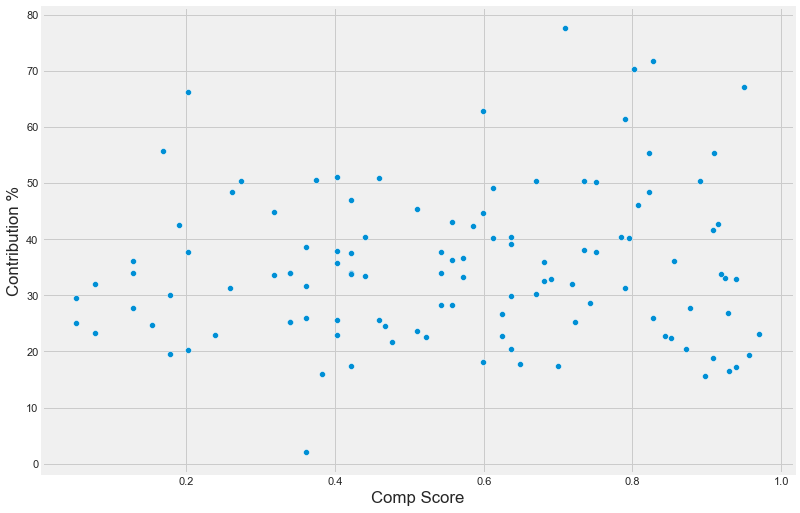

In [379]:
plt.figure(figsize=(12, 8))
s = sns.scatterplot(data=c_p_top_combo, x="comp", y="Contribution %") # , hue="Dominant Topic"
# s.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
xl = plt.xlabel('Comp Score')
yl = plt.ylabel('Contribution %')

We will work with this; let's first break it up.

In [380]:
c_p_top_combo['Dominant Topic'].unique()

array([38, 24, 39, 22,  1, 46, 48, 44, 42, 45, 47, 43], dtype=int64)

In [381]:
l_p_p38 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 38)]
l_p_p24 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 24)]
l_p_p39 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 39)]
l_p_p22 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 22)]
l_p_p1 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 1)]
l_p_p46 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 46)]
l_p_p48 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 48)]
l_p_p44 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 44)]
l_p_p42 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 42)]
l_p_p45 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 45)]
l_p_p47 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 47)]
l_p_p43 = c_p_top_combo.loc[(c_p_top_combo['Dominant Topic'] == 43)]

**RBL China Positive** | Reading Between the Lines on Topic 38

In [416]:
l_p_p38.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
6,38,70.22,0.802,"list, newly, th, great, investor, unity, tranquility, distort, ability, people, dear, important, create, damage, legislature, content, give, clearly, serve, proxy",\n\n\tIt must be understood clearly that legal loopholes regarding national security have cost Hong Kong society dear


In [417]:
print(len(l_p_p38),'| These are the number of sentences to help read between the lines.')

15 | These are the number of sentences to help read between the lines.


In [418]:
l_p_p38['Sentences'].head(15)

6      \n\n\tIt must be understood clearly that legal loopholes regarding national security have cost Hong Kong society dear                                                                                                                                                                                                                                                                                                                                             
67     \n\n\t"I hope Hong Kong society can calm down at an early date so that we can shift the focus to improving people's livelihoods, bolstering growth and integrating into the national development," Tam said, noting new opportunities for Hong Kong businesses generated in the Guangdong-Hong Kong-Macao Greater Bay Area                                                                                                                                        
111     An expert on international intelligence and security who asked not to be nam

This Topic appears to cover a few Topics a high-level summary below:
   * China's position that the Law will lead to stability & protects the rights of the majority of the HK people
   * China's position that the West has no grounds to defend human rights given their track records
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **China's position that the Law will lead to stability & protects the rights of the majority of the HK people & the West has no grounds to discuss Human Rights**


**RBL China Positive** | Reading Between the Lines on Topic 24

In [413]:
l_p_p24.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
7,24,77.61,0.7096,"list, terminate, th, newly, easy, legislature, seawall, true, vote, violence, law_people, authorization, strength, and, status, effective, determined, century, foreign, swiss","\n\n\tThe efforts of China’s central government to plug the loopholes in safeguarding national security in Hong Kong, stop violence and curb disorder with effective measures, and restore the region’s sound legal and business environment are not only in line with the common interests of all sectors of Hong Kong society as well as foreign investors in the region, but also important guarantee of Hong Kong’s status as a global financial, trade, and shipping center"


In [414]:
print(len(l_p_p24),'| These are the number of sentences to help read between the lines.')

15 | These are the number of sentences to help read between the lines.


In [415]:
l_p_p24['Sentences'].head(15)

7      \n\n\tThe efforts of China’s central government to plug the loopholes in safeguarding national security in Hong Kong, stop violence and curb disorder with effective measures, and restore the region’s sound legal and business environment are not only in line with the common interests of all sectors of Hong Kong society as well as foreign investors in the region, but also important guarantee of Hong Kong’s status as a global financial, trade, and shipping center
70      "I believe that Hong Kong can be even better than before                                                                                                                                                                                                                                                                                                                                                                                                                       
88     HKSAR national security law to put HK back on tra

This Topic appears to be similar to the previous with a few high-level comments below:
   * Adding the word `safeguarding` before national security
   * Further requests for external elements to stay out of China affairs
   * Cites 53 countries vocalizing their support for the law
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The Law is for safeguarding the majority of HK people, external elements to remain out of China affairs & cites 53 countries support the Law**


**RBL China Positive** | Reading Between the Lines on Topic 39

In [410]:
l_p_p39.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
16,39,42.73,0.9153,"legislature, list, have, newly, th, great, seawall, unable, decision, investor, social_unrest, life, curb, title, top, master, country_system, manage, make, true","Hong Kong national security law helps ensure long-term stability of ""one country, two systems"" On June 30, the Standing Committee of the 13th National People's Congress (NPC) passed the Law of the People's Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) and adopted a decision to list the law in Annex III to the HKSAR Basic Law"


In [411]:
print(len(l_p_p39),'| These are the number of sentences to help read between the lines.')

15 | These are the number of sentences to help read between the lines.


In [412]:
l_p_p39['Sentences'].head(15)

16     Hong Kong national security law helps ensure long-term stability of "one country, two systems" On June 30, the Standing Committee of the 13th National People's Congress (NPC) passed the Law of the People's Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) and adopted a decision to list the law in Annex III to the HKSAR Basic Law                                      
17     \n\n\tAs a major move of the central government to manage Hong Kong affairs since its return to the motherland in 1997, the law will fully and faithfully implement the principle of “one country, two systems” and the HKSAR Basic Law, help safeguard national sovereignty, security and development interests, maintain Hong Kong's lasting prosperity and stability, and ensure the long-term stability of "one country, two systems"
51      Joyful Hong Kong residents warmly greeted the boats on the harbor front                                                       

This Topic appears to be focus on:
   * The Law's intent is to bring prosperity to end chaos and restore order 
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The Law's intent is to bring prosperity to end chaos and restore order**


**RBL China Positive** | Reading Between the Lines on Topic 22

In [407]:
l_p_p22.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
44,22,50.21,0.7506,"list, great, various, damage, be, life, make, serve, external_force, freedom, chaos, significant, account, ceremony, center, comprehensively, hold, festive, reiterate, beautiful","\n\n\n\nA flag-raising ceremony is held by the government of the Hong Kong Special Administrative Region to celebrate the 23rd anniversary of Hong Kong's return to the motherland at the Golden Bauhinia Square in Hong Kong, south China, July 1, 2020"


In [408]:
print(len(l_p_p22),'| These are the number of sentences to help read between the lines.')

22 | These are the number of sentences to help read between the lines.


In [409]:
l_p_p22['Sentences'].head(22)

44     \n\n\n\nA flag-raising ceremony is held by the government of the Hong Kong Special Administrative Region to celebrate the 23rd anniversary of Hong Kong's return to the motherland at the Golden Bauhinia Square in Hong Kong, south China, July 1, 2020                                                                                       
45      (Xinhua/Li Gang)\n\n\tThe festive mood stood in sharp contrast to the scenes a year ago when large groups of rioters stormed the Legislative Council complex of the Hong Kong Special Administrative Region (HKSAR) and wreaked havoc inside                                                                                                  
74      (Xinhua/Wang Shen)\n\n\tTo commemorate its return to the motherland, Hongkongers are celebrating the historic occasion in a befitting manner today                                                                                                                                                                

This Topic appears to cover a few Topics a high-level summary below:
   * Rejoiceful HK people to celebrate HK's return to China
   * Nothing in the Law suppresses freedom; it's safeguard security
   * Multiple HK organizations support the Law
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The HK people celebrate the return to China. There is nothing in the Law that suppresses freedom while multiple HK organizations support the Law**


**RBL China Positive** | Reading Between the Lines on Topic 1

In [419]:
l_p_p1.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
246,1,2.08,0.3612,"legislature, list, scaremongering, include, confidence, tell, great, reflect, procedure, implement, troublemaker, inherent, true, unable, ask, seat, officer, most, crucial, enforce",Pompeo and his like


In [420]:
print(len(l_p_p1),'| These are the number of sentences to help read between the lines.')

2 | These are the number of sentences to help read between the lines.


In [421]:
l_p_p1['Sentences'].head(2)

246     Pompeo and his like                                                                                                                                                                       
317     The HKSAR Government will complete the necessary procedure for publication by gazette as soon as possible to enable the implementation of the National Security Law in Hong Kong in tandem
Name: Sentences, dtype: object

This Topic is not large enough to have a concrete explanation.

**RBL China Positive** | Reading Between the Lines on Topic 46

In [400]:
l_p_p46.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
5,46,55.72,0.168,"list, have, th, newly, celebrate, unable, national_security_law, top, safeguard, great, legislature, know, implement, rapidly, tell, clearly, question, manage, century, maintain",\n\n\tThe rapidly evolving situation in the region during the past more than a year has fully demonstrated that prosperity and stability is totally out of the question without the guarantee of national security


In [401]:
print(len(l_p_p46),'| These are the number of sentences to help read between the lines.')

19 | These are the number of sentences to help read between the lines.


In [422]:
l_p_p46['Sentences'].head(19)

5      \n\n\tThe rapidly evolving situation in the region during the past more than a year has fully demonstrated that prosperity and stability is totally out of the question without the guarantee of national security                                                                                                                                                                                                                                                                                                                                                                                                                   
10     \n\n\tThe endeavor has been not only absolutely imperative for the prevention and control of national security risks, but also the fundamental solution to problems undermining the long-term prosperity, peace, and order of Hong Kong                                                                                                                                             

This Topic appears to cover a few Topics a high-level summary below:
   * The Law's intent on long-term prosperity
   * The treat of anti-China forces
   * The UK has no power or right to act as HK is China's
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The positive intent of the Law & the UK has no power or right to act**


**RBL China Positive** | Reading Between the Lines on Topic 48

In [397]:
l_p_p48.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
13,48,67.05,0.9501,"easy, list, legislature, great, unable, have, hope, predict, make, clothe, newly, new_law, confidence, th, foundation, world, true, seat, top, friction","\n\n\tBy guaranteeing a stable environment, putting an end to the social unrest, boosting market confidence, bringing the city into the right track, and setting a bottom line of national security, the new law means to the SAR the hope of solving deep-rooted social and economic problems including the housing woes, brighter development prospects for various sectors, and greater roles of the advantages of the “one country, two systems” principle"


In [398]:
print(len(l_p_p48),'| These are the number of sentences to help read between the lines.')

8 | These are the number of sentences to help read between the lines.


In [399]:
l_p_p48['Sentences'].head(8)

13     \n\n\tBy guaranteeing a stable environment, putting an end to the social unrest, boosting market confidence, bringing the city into the right track, and setting a bottom line of national security, the new law means to the SAR the hope of solving deep-rooted social and economic problems including the housing woes, brighter development prospects for various sectors, and greater roles of the advantages of the “one country, two systems” principle                                                                                                      
15     \n\n\tWith its efforts focusing on construction and development after the introduction of the new law, Hong Kong will be able to make full use of the institutional strengths of the “one country, two systems” principle, make the most of major opportunities brought along by important initiatives such as the Belt and Road Initiative and the development plan for the Guangdong-Hong Kong-Macao Greater Bay Area, rebuild its advantages while

This Topic appears to be to cover a similar stance as the previous with additional comments towards to the UK.
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The UK should have it's own foreign policy rather than dance to the tune of the Americans**


**RBL China Positive** | Reading Between the Lines on Topic 44

In [394]:
l_p_p44.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
23,44,26.81,0.9287,"newly, th, seawall, make, list, shipping, reflect, ability, own, society, safeguard, prompt, welfare, circumstance, enact, regard, base, leader, top, severe","\n\n\tEnacting the law on safeguarding national security in the HKSAR based on the authorization of the NPC, the Standing Committee of the NPC aims to improve institutional mechanisms related to the implementation of the Constitution, the HKSAR Basic Law, and the NPC Decision on Establishing and Improving the Legal System and Enforcement Mechanisms for the HKSAR to Safeguard National Security under new circumstances"


In [395]:
print(len(l_p_p44),'| These are the number of sentences to help read between the lines.')

2 | These are the number of sentences to help read between the lines.


In [396]:
l_p_p44['Sentences'].head(2)

23     \n\n\tEnacting the law on safeguarding national security in the HKSAR based on the authorization of the NPC, the Standing Committee of the NPC aims to improve institutional mechanisms related to the implementation of the Constitution, the HKSAR Basic Law, and the NPC Decision on Establishing and Improving the Legal System and Enforcement Mechanisms for the HKSAR to Safeguard National Security under new circumstances
131     Article 23 of the Basic Law stipulates that the Hong Kong Special Administrative Region "shall enact laws on its own" for the sake of national security                                                                                                                                                                                                                                                                           
Name: Sentences, dtype: object

This Topic is summarized below:
   * China citing laws within Common Law allowing them to enact the National Security Law
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **China citing laws within Common Law allowing them to enact the National Security Law**


**RBL China Positive** | Reading Between the Lines on Topic 42

In [391]:
l_p_p42.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
30,42,50.35,0.6705,"newly, th, unable, seawall, own, regard, establish, seat, resolve, legislature, legal_system_enforcement_mechanism, list, apply, eager, external_element, activity, preside, stability, point, unitary",\n\n\tThe legislation thus establishes a legal system and enforcement mechanism for the HKSAR to safeguard national security


In [392]:
print(len(l_p_p42),'| These are the number of sentences to help read between the lines.')

8 | These are the number of sentences to help read between the lines.


In [393]:
l_p_p42['Sentences'].head(8)

30     \n\n\tThe legislation thus establishes a legal system and enforcement mechanism for the HKSAR to safeguard national security                                                                                                             
34     \n\n\tOnly with national security can Hong Kong guarantee its social stability, lay the foundations for solving development problems, and effectively protect the life and property safety, rights and freedom of the Hong Kong residents
47     \n\n\tTURNING POINT\n\n\tAt a reception held Wednesday morning, Chief Executive of the HKSAR Carrie Lam stressed the significance of the anniversary and said the new law would help restore stability in Hong Kong                      
48     \n\n\n\nA reception celebrating the 23rd anniversary of the establishment of the Hong Kong Special Administrative Region of the People's Republic of China is held in south China's Hong Kong, July 1, 2020                              
60     \n\n\t"What businesses want i

This Topic appears to cover a few Topics a high-level summary below:
   * Carrie Lam's support for the Law
   * Businesses want stability & certainty
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Carrie Lam & businesses support for the Law**


**RBL China Positive** | Reading Between the Lines on Topic 45

In [388]:
l_p_p45.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
56,45,50.35,0.7351,"list, new_law, true, newly, round, deescalate, area, train, billboard, category, prosperity, great, sound, realize, only, social_unrest, exercise, rd_anniversary, try, legislature","\n\n\n\nPhoto taken on June 29, 2020 shows a billboard on the Law of the People's Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) in Central area in Hong Kong, south China"


In [389]:
print(len(l_p_p45),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [390]:
l_p_p45['Sentences'].head(4)

56     \n\n\n\nPhoto taken on June 29, 2020 shows a billboard on the Law of the People's Republic of China on Safeguarding National Security in the Hong Kong Special Administrative Region (HKSAR) in Central area in Hong Kong, south China
57     \n\n\tHong Kong has enjoyed a high degree of autonomy and maintained its prosperity under "one country, two systems" since China resumed exercising sovereignty over Hong Kong in 1997                                                
196     The so-called Western intelligence agencies keep making up false accusations against China                                                                                                                                           
271     The two sides continue working towards implementing the consensus reached at the two earlier rounds of commander-level talks and made progress in effective measures by frontline troops to disengage and deescalate the situation   
Name: Sentences, dtype: object

This Topic appears to be to cover a few Topics a high-level summary below:
   * HK has enjoyed autonomy & prosperity under China's rule
   * The West are making up making up false accusations against China
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **HK has benefited from China's rule & the West are making up false accusations**


**RBL China Positive** | Reading Between the Lines on Topic 47

In [385]:
l_p_p47.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
94,47,36.09,0.128,"list, legislature, true, secessionist, great, unable, th, newly, investor, eager, welcome, safe, international, least, participate, part, decision, prompt, global, need","Victor Gao, chair professor of Soochow University and vice president of the Center for China and Globalization, was invited to BBC's Newsnight to debate with Law, after other opposition figures such as Martin Lee Chu-ming and secessionists like Jimmy Lai Chee-ying were sentenced, which the BBC host described as 60- and- 70-something men being thrown into jail for participating in ""peaceful"" protests"


In [386]:
print(len(l_p_p47),'| These are the number of sentences to help read between the lines.')

3 | These are the number of sentences to help read between the lines.


In [387]:
l_p_p47['Sentences'].head(3)

94      Victor Gao, chair professor of Soochow University and vice president of the Center for China and Globalization, was invited to BBC's Newsnight to debate with Law, after other opposition figures such as Martin Lee Chu-ming and secessionists like Jimmy Lai Chee-ying were sentenced, which the BBC host described as 60- and- 70-something men being thrown into jail for participating in "peaceful" protests
100     The Chinese scholar said he also had some messages for absconding Hong Kong secessionists like Law, but he did not have enough time to elaborate on them during the show                                                                                                                                                                                                                                          
261     They need to get a clear grasp of and follow the trend of the times and earnestly make concrete contributions to the sound development of the international human rights c

This Topic does not present anything new.

**RBL China Positive** | Reading Between the Lines on Topic 43

In [382]:
l_p_p43.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
168,43,29.95,0.6369,"th, newly, list, legislature, true, take, investor, great, supervision, have, event, long, calm, thereby, department, inappropriate, new, measure, irresistible, regime","\nMarr: Surely the fundamental truth is that under your new President, you have a nationalistic, more assertive regime in Beijing"


In [383]:
print(len(l_p_p43),'| These are the number of sentences to help read between the lines.')

2 | These are the number of sentences to help read between the lines.


In [384]:
l_p_p43['Sentences'].head(2)

168     \nMarr: Surely the fundamental truth is that under your new President, you have a nationalistic, more assertive regime in Beijing                                                                                                                                                                       
323     I am confident that after the implementation of the National Security Law, the social unrest which has troubled Hong Kong people for nearly a year will be eased and stability will be restored, thereby enabling Hong Kong to start anew, focus on economic development and improve people's livelihood
Name: Sentences, dtype: object

This Topic does not present anything new.

**RBL China Positive :: Summary** | This is the end of Reading Between the Lines on China Positive

Here we will outline the individual summaries for each:
   * **Topic 38**  | China's position that the Law will lead to stability & protects the rights of the majority of the HK people & the West has no grounds to discuss Human Rights & the West has no grounds to discuss Human Rights
   * **Topic 24**  | The Law is for safeguarding the majority of HK people, external elements to remain out of China affairs & cites 53 countries support the Law
   * **Topic 39**  | The Law's intent is to bring prosperity to end chaos and restore order
   * **Topic 22**  | The HK people celebrate the return to China. There is nothing in the Law that suppresses freedom while multiple HK organizations support the Law
   * **Topic 1**  | <i>This Topic is not large enough or unique</i>
   * **Topic 46**  | The positive intent of the Law & the UK has no power or right to act
   * **Topic 48**  | The UK should have it's own foreign policy rather than dance to the tune of the Americans
   * **Topic 44**  | China citing laws within Common Law allowing them to enact the National Security Law
   * **Topic 42**  | Carrie Lam & businesses support for the Law
   * **Topic 45**  | HK has benefited from China's rule & the West are making up false accusations
   * **Topic 47**  | <i>This Topic does not present anything unique</i>
   * **Topic 43**  | <i>This Topic does not present anything unique</i>

The base of the Positive Section for China can be Summarized overall as:
   * The Law is for safeguarding the majority of HK people 
   * Some of the international community are misinformed / making false accusations; they should stay out of China's internal affairs
     * 53 countries are in support of the Law
     * Carrie Lam & businesses support for the Law
   * The HK people are open to the Law & celebrating it

Below we will show thirty (30) observations that encapsulate the China News Articles with Positive Scores

In [ ]:
                          l_p['Sentences'][238],l_p['Sentences'][293],l_p['Sentences'][44],l_p['Sentences'][74],l_p['Sentences'][128],


In [438]:
l_p = news_sa_l_p.copy()
l_p_top = pd.DataFrame([])
l_p_top = l_p_top.append([l_p['Sentences'][5],l_p['Sentences'][10],l_p['Sentences'][21],l_p['Sentences'][110],l_p['Sentences'][129],
                          l_p['Sentences'][238],l_p['Sentences'][293],l_p['Sentences'][44],l_p['Sentences'][74],l_p['Sentences'][128],
                          l_p['Sentences'][239],l_p['Sentences'][303],l_p['Sentences'][308],l_p['Sentences'][72],l_p['Sentences'][86],
                          l_p['Sentences'][108],l_p['Sentences'][226],l_p['Sentences'][240],l_p['Sentences'][70],l_p['Sentences'][89],
                          l_p['Sentences'][90],l_p['Sentences'][121],l_p['Sentences'][249],l_p['Sentences'][258],l_p['Sentences'][318],
                          l_p['Sentences'][67],l_p['Sentences'][150],l_p['Sentences'][171],l_p['Sentences'][260],l_p['Sentences'][291]
])
l_p_top.columns = ['Sentences']
l_p_top['Sentences']

0     \n\n\tThe rapidly evolving situation in the region during the past more than a year has fully demonstrated that prosperity and stability is totally out of the question without the guarantee of national security                                                                                                                                                                                                                            
1     \n\n\tThe endeavor has been not only absolutely imperative for the prevention and control of national security risks, but also the fundamental solution to problems undermining the long-term prosperity, peace, and order of Hong Kong                                                                                                                                                                                                       
2     \n\n\tThe Chinese people, including the Hong Kong compatriots, have realized more than ever that the long-term absence o

We will highlight a sentence from each of the top identified themes within this Topic

The Law is for safeguarding the majority of HK people

In [453]:
news_sa_l_p['Sentences'][318][1:]

'It only targets an extremely small minority of offenders while the life and property as well as various legitimate basic rights and freedoms enjoyed by the overwhelming majority of citizens will be protected'

In [454]:
news_sa_l_p['Sentences'][150][1:]

'National Security law is about restoring order and protecting the rights of the majority of people'

Some of the international community are misinformed / making false accusations; they should stay out of China's internal affairs

In [450]:
news_sa_l_p['Sentences'][196][1:]

'The so-called Western intelligence agencies keep making up false accusations against China'

53 countries are in support of the Law

In [448]:
news_sa_l_p['Sentences'][258][1:]

"Then and there, 53 countries voiced their support in a joint statement to China's policies regarding Hong Kong, urging the relevant countries to stop using these matters to interfere in China's internal affairs"

Carrie Lam & businesses support for the Law

In [443]:
news_sa_l_p['Sentences'][47][19:]

'At a reception held Wednesday morning, Chief Executive of the HKSAR Carrie Lam stressed the significance of the anniversary and said the new law would help restore stability in Hong Kong'

In [445]:
news_sa_l_p['Sentences'][60][4:]

'What businesses want is stability and certainty'

The HK people are open to the Law & celebrating it

In [512]:
news_sa_l_p['Sentences'][44][4:217]

"A flag-raising ceremony is held by the government of the Hong Kong Special Administrative Region to celebrate the 23rd anniversary of Hong Kong's return to the motherland at the Golden Bauhinia Square in Hong Kong"

**Topic Review** | Positive International

In [513]:
news_sa_i_p.head(1)

,file_name,date,source,country,local,Sentences,comp,neg,neu,pos
0,bbc_1,2020-06-30,BBC,UK,Intl,"Hong Kong was always meant to have a security law, but could never pass one because it was so unpopular",0.1779,0.0,0.914,0.086


**Lemmatization** | Positive International

In [516]:
lemmatized_i_p = lemmatization(news_sa_i_p['Sentences'])
print(lemmatized_i_p[2][0:90])

critic say effectively curtail protest freedom speech have say return stability


**Stop of Removal** | Positive International

In [518]:
data_words_i_p = gen_words(lemmatized_i_p)
print(data_words_i_p[2][0:10])

['critic', 'say', 'effectively', 'curtail', 'protest', 'freedom', 'speech', 'have', 'say', 'return']


**Bag of Words** | Positive International

In [520]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words_i_p)

corpus_i_p = []
for text in data_words_c_n:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus_i_p.append(new)

print (corpus_i_p[2][0:10])

[(1, 1), (2, 3), (7, 1), (8, 1), (32, 1), (47, 1), (102, 1), (130, 1), (352, 1), (361, 1)]


Making some sense of this

In [522]:
word_i_p = id2word[[2][:][0]]
print(word_i_p)

have


**Bigrams & Trigrams** | Positive International

In [523]:
bigrams_phrases_i_p = gensim.models.Phrases(data_words_i_p,min_count=5, threshold=3)
trigrams_phrases_i_p = gensim.models.Phrases(bigrams_phrases_i_p[data_words_i_p], threshold=3)

bigram_i_p = gensim.models.phrases.Phraser(bigrams_phrases_i_p)
trigram_i_p = gensim.models.phrases.Phraser(trigrams_phrases_i_p)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams_i_p = make_bigrams(data_words_i_p)
data_bigrams_trigrams_i_p = make_trigrams(data_bigrams_i_p)

In [524]:
print(data_bigrams_trigrams_i_p[0][0:9])

['be', 'always', 'mean', 'have', 'security_law', 'never', 'pass', 'be', 'so']


In [526]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams_i_p)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams_i_p

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus_i_p, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus_i_p)):
    bow = corpus_i_p[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus_i_p[i] = new_bow


**LDA Model** | Positive International

In [527]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_p, 
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10,
                                           alpha="auto")


In [528]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_p, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.155940  0.060168  1       1        23.665095
2     -0.002600 -0.126955  2       1        19.610890
1     -0.112789 -0.094223  3       1        15.463268
4     -0.029404  0.124134  4       1        14.793999
3      0.090276 -0.079755  5       1        11.947088
5      0.137650  0.027282  6       1        8.355688 
6      0.072808  0.089350  7       1        6.163972 , topic_info=            Term       Freq      Total Category  logprob  loglift
1    be           81.000000  81.000000  Default  30.0000  30.0000
8    unpopular    7.000000   7.000000   Default  29.0000  29.0000
952  autonomous   8.000000   8.000000   Default  28.0000  28.0000
99   do           8.000000   8.000000   Default  27.0000  27.0000
79   hand         12.000000  12.000000  Default  26.0000  26.0000
..    ...               ...        ...      ...      ...      ...
562  embodiment   0.587649   4.049127   Topic7  -5.0266   0.8563 
1    be           0.797518   81.333145  Topic7  -4.7212  -1.8384 
8    unpopular    0.354616   7.699383   Topic7  -5.5317  -0.2914 
89   speech       0.346586   4.872160   Topic7  -5.5546   0.1433 
156  investigate  0.350563   10.734179  Topic7  -5.5432  -0.6352 

[360 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
630   6      0.930095  achieve       
894   7      0.931249  address       
619   3      0.994726  administer    
789   4      0.772342  administration
299   1      0.819248  admit         
...  ..           ...             ...
561   6      0.930245  write         
115   1      0.279539  year          
115   2      0.093180  year          
115   3      0.186360  year          
115   4      0.372719  year          

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4, 6, 7])

Seven (7) Topics appears to be manageable.

Let's double confirm we reached the best configuration with the Coherance Score.


**Coherence Score** | Positive International

In [529]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus_i_p,
                                                      texts=data_bigrams_trigrams_i_p,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

print('Avg. Coherence Score (Cv):', avg_coherence_cv)


Avg. Coherence Score (Cv): 0.7267623697466575


In [530]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus_i_p, texts=data_bigrams_trigrams_i_p,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=88, step=1, cpus=4)


100%|██████████| 87/87 [07:42<00:00,  5.31s/it]


In [531]:
coherence_df_i_p = pd.DataFrame({'Number of Topics': range(2, 89, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df_i_p.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
21,23,0.7366
16,18,0.7340
17,19,0.7316
19,21,0.7254
24,26,0.7230
10,12,0.7221
18,20,0.7220
11,13,0.7198
22,24,0.7172
14,16,0.7170


**Coherence Score Visual** | Positive International

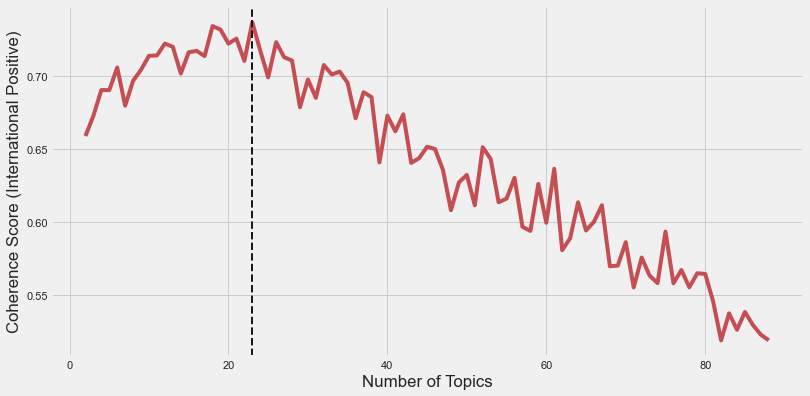

In [532]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 89, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=23, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score (International Positive)')
#plt.axvline((three_down), color='g', linewidth=2)

**LDA Model, Post Coherence Score** | Positive International

In [533]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_i_p, 
                                           id2word=id2word,
                                           num_topics=23,    # the best result from the coherence_score
                                           random_state=47, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [534]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_i_p, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.274415 -0.006310  1       1        10.052732
20    -0.166471 -0.153932  2       1        9.095334 
14    -0.086077 -0.247886  3       1        8.878675 
16     0.169209 -0.175939  4       1        8.291669 
12     0.036881 -0.227530  5       1        7.124615 
21     0.105964  0.185795  6       1        6.607052 
10    -0.154725 -0.000647  7       1        5.469279 
22    -0.010497  0.199746  8       1        5.305062 
2     -0.143297  0.099196  9       1        4.725375 
7     -0.097930  0.158040  10      1        4.616360 
1     -0.051579 -0.095024  11      1        3.998078 
6      0.146989 -0.084896  12      1        3.940326 
18     0.175448  0.087612  13      1        3.534344 
4      0.081797  0.099816  14      1        3.471771 
3      0.160202  0.011951  15      1        3.221461 
8      0.039162 -0.094144  16      1        3.004037 
11    -0.039850  0.113236  17      1        2.889226 
5     -0.020636  0.000088  18      1        1.742678 
13     0.050195  0.002109  19      1        1.344626 
17    -0.002217  0.039149  20      1        1.108552 
0      0.032131  0.040108  21      1        0.829293 
9      0.026713  0.025566  22      1        0.458432 
15     0.023002  0.023897  23      1        0.291023 , topic_info=         Term      Freq      Total Category  logprob  loglift
1   be         93.00000  93.000000  Default  30.0000  30.0000
7   so         20.00000  20.000000  Default  29.0000  29.0000
47  respect    20.00000  20.000000  Default  28.0000  28.0000
2   have       38.00000  38.000000  Default  27.0000  27.0000
8   unpopular  10.00000  10.000000  Default  26.0000  26.0000
..        ...       ...        ...      ...      ...      ...
13  ensure     0.00353   2.841925   Topic23 -7.0884  -0.8515 
14  framework  0.00353   1.041376   Topic23 -7.0884   0.1524 
16  see        0.00353   1.626393   Topic23 -7.0884  -0.2934 
17  serious    0.00353   2.691349   Topic23 -7.0884  -0.7971 
18  step       0.00353   0.541032   Topic23 -7.0884   0.8072 

[956 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
667   7      0.545264  ability 
518   4      0.864503  academic
890   7      0.960268  addition
894   13     0.727664  address 
299   6      0.401624  admit   
...   ..          ...      ... 
115   7      0.265438  year    
115   10     0.176959  year    
115   13     0.088479  year    
115   14     0.088479  year    
1141  4      0.864502  yearly  

[490 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 21, 15, 17, 13, 22, 11, 23, 3, 8, 2, 7, 19, 5, 4, 9, 12, 6, 14, 18, 1, 10, 16])

Visually, it appears that ~20 could have be a correct number of Topics but the Coherence Score says differently.

We will take a deeper look.

<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame.

In [537]:
best_model_idx = coherence_df_c_n[coherence_df_c_n['Number of Topics'] == 23].index[0]
best_lda_model = lda_models[best_model_idx]

In [538]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23
Term1,be,be,be,be,be,have,unpopular,have,be,take,...,year,have,hour,be,help,one,respect,be,be,be
Term2,matter,ordinary,hour,year,stability,hand,be,be,mean,be,...,be,scholar,do,asylum,be,nineteenth,so,mean,stability,have
Term3,hard,curb,have,investigate,have,so,constitution,respect,stability,agency,...,mean,do,torture,autonomous,loyalty,shadow,demand,mainland,have,core
Term4,route,political,however,discuss,call,press,do,so,respect,century,...,stability,mean,speech,opportunity,quit,thus,be,strive,scholar,stability
Term5,formulation,asylum,hand,have,week,put,hour,difference,so,stability,...,help,hand,deal,investigate,enshrine,global,association,move,constitution,global
Term6,how,one,investigate,stability,failure,bring,news,help,have,democracy,...,discuss,go,central_government,economic,former,address,stability,have,unpopular,unpopular
Term7,infringement,fear,asylum,unpopular,do,lobby,hand,send,convince,step,...,shadow,be,enshrine,generation,well,bar,help,same,previously,inspect
Term8,closely,collect,call,hand,year,respect,certain,year,exceed,give,...,serious,uphold,come_force,severe,fear,so,government,hand,mean,surveillance
Term9,new_national_security_law,economic,basis,contemplate,pass,prosecute,loyalty,discuss,autonomous,session,...,lead,empress,retroactive,move,western,assistance,judge,target,core,mean
Term10,hunger,dissenter,scholar,comment,asylum,export,stake,demand,call,scholar,...,report,incite,party,stability,mean,elsewhere,thus,hunger,hunger,pass


In [539]:
pd.set_option('display.max_colwidth', -1)
topics_df_side = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df_side

,Terms per Topic
Topic1,"be, matter, hard, route, formulation, how, infringement, closely, new_national_security_law, hunger, overdue, frustrate, involve, respect, stability, mean, statement, exceed, investigate, endorse"
Topic2,"be, ordinary, curb, political, asylum, one, fear, collect, economic, dissenter, autonomous, have, week, exceed, suppose, why, lawmaker, torture, government, legitimate"
Topic3,"be, hour, have, however, hand, investigate, asylum, call, basis, scholar, agent, speech, stability, commonplace, closely, nothingness, article, management, thing, where"
Topic4,"be, year, investigate, discuss, have, stability, unpopular, hand, contemplate, comment, basis, focus, formulation, impact, sometimes, same, case, so, unanswered, call"
Topic5,"be, stability, have, call, week, failure, do, year, pass, asylum, strive, central_government, tension, far, strengthen, enforcement, decide, british, openness, lawmaker"
Topic6,"have, hand, so, press, put, bring, lobby, respect, prosecute, export, chilling, city, prosperity_stability, legitimate, way, sure, gape, trade, be, sovereignty"
Topic7,"unpopular, be, constitution, do, hour, news, hand, certain, loyalty, stake, help, collect, asylum, little, hope, thereafter, resolution, draft, become, voice"
Topic8,"have, be, respect, so, difference, help, send, year, discuss, demand, local, public, line, resolution, wish, bar, operate, far, thus, enforcement"
Topic9,"be, mean, stability, respect, so, have, convince, exceed, autonomous, call, do, year, decide, population, far, go, help, scholar, afterward, review"
Topic10,"take, be, agency, century, stability, democracy, step, give, session, scholar, address, chant, structure, system, central, attitude, directly, china, copy, newspaper"


Small but check for duplicates.

In [540]:
i_p_dup = topics_df_side['Terms per Topic'].duplicated().any()
i_p_dup

False

<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame.

In [541]:
tm_results = best_lda_model[corpus]

In [542]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(22, 0.5117958),
 (10, 0.24042103),
 (22, 0.46629918),
 (22, 0.27704814),
 (3, 0.5108746)]

In [545]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(news_sa_i_p))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df_side.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Sentences'] = news_sa_i_p['Sentences']
corpus_topic_df = corpus_topic_df.drop(['Document'], axis=1)

In [546]:
corpus_topic_df = corpus_topic_df.reset_index()
corpus_topic_df = corpus_topic_df.drop(['index'], axis=1)

In [547]:
corpus_topic_df = pd.concat([corpus_topic_df,news_sa_i_p['comp']],
                           axis = 1, ignore_index=False)
corpus_topic_df = corpus_topic_df[['Dominant Topic', 'Contribution %','comp', 'Topic Desc', 'Sentences']]

In [548]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
206,14,80.87,0.7003,"year, be, mean, stability, help, discuss, shadow, serious, lead, report, diplomatic, encourage, trade, citizenship, creep, curtail, show, autonomy, spearhead, british",Supporters say the law will help to restore order after a year of protest
138,5,76.09,0.4404,"be, stability, have, call, week, failure, do, year, pass, asylum, strive, central_government, tension, far, strengthen, enforcement, decide, british, openness, lawmaker","They don’t have any savings, or hope for the future"
251,15,76.09,0.2732,"have, scholar, do, mean, hand, go, be, uphold, empress, incite, constitution, local, assembly, almost, discuss, retroactive, eligible, frustrate, memory, achieve","“Burning together” has turned out to be a two-edged sword, as Beijing, too, seems willing to accept the loss or significant reduction of Hong Kong’s role as an international financial and business center"
181,23,76.09,0.3182,"be, have, core, stability, global, unpopular, inspect, surveillance, mean, pass, erosion, come_force, hour, join, party, freedom_speech, local, before, direct, require","Importantly, Beijing will have power over how the law should be interpreted"
196,21,76.09,0.4019,"be, mean, mainland, strive, move, have, same, hand, target, hunger, return, democracy, region, fear, strengthen, index, colony, see, lose, ban","Chinese courts, which are controlled by the Communist Party, have a close to 100% conviction rate"
...,...,...,...,...,...
84,11,20.42,0.3400,"have, investigate, be, respect, new_national_security_law, mean, so, scholar, drastically, hand, help, leadership, deal, banner, addition, nineteenth, fill, democracy, change, agent",(AP: Vincent Yu)Australia has joined more than 20 other countries in expressing deep concern about the new national security law for Hong Kong
34,6,20.30,0.6486,"have, hand, so, press, put, bring, lobby, respect, prosecute, export, chilling, city, prosperity_stability, legitimate, way, sure, gape, trade, be, sovereignty","Even Hong Kong politicians who have endorsed the law, including the territory’s top official, Carrie Lam, have said they have not been shown the full text by Beijing, which will bring into Hong Kong new crimes like inciting separatism and “colluding with foreign powers"
176,18,18.52,0.9393,"help, be, loyalty, quit, enshrine, former, well, fear, western, mean, come_force, say, respect, security_legislation, unanswered, full_text, still, basic, eligible, export","Sure, handover promises to the UK were made but he was not going to let some Western attachment to liberty trump loyalty to the motherland"
217,5,18.17,0.1027,"be, stability, have, call, week, failure, do, year, pass, asylum, strive, central_government, tension, far, strengthen, enforcement, decide, british, openness, lawmaker","According to the South China Morning Post, pro-democracy businesses began clearing away any sign they had once supported the protests"


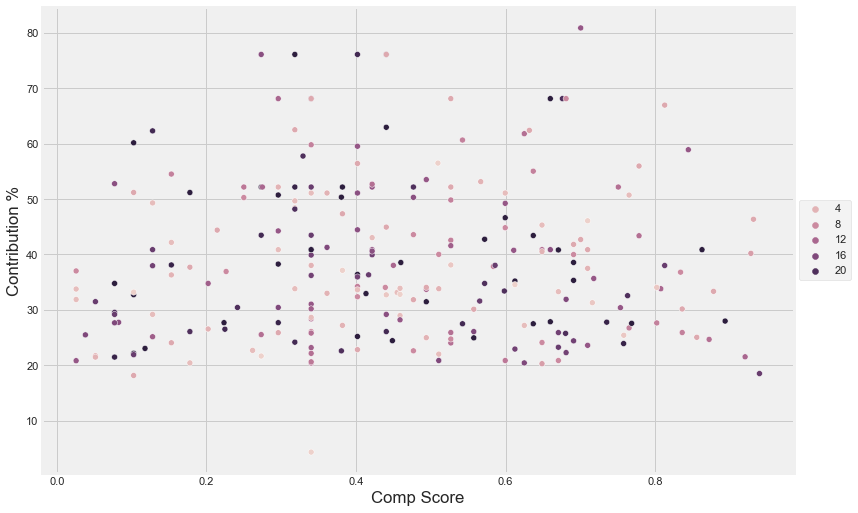

In [549]:
plt.figure(figsize=(12, 8))
s = sns.scatterplot(data=corpus_topic_df, x="comp", y="Contribution %", hue="Dominant Topic")
s.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
xl = plt.xlabel('Comp Score')
yl = plt.ylabel('Contribution %')

Similar to the others, these Topics appear spread out on both the Contribution % & Comp Scores. We will now take another deeper look & break them up into seperate dataframes. Let's first look at how many each have.

In [ ]:
corpus_topic_df['Dominant Topic'].value_counts()

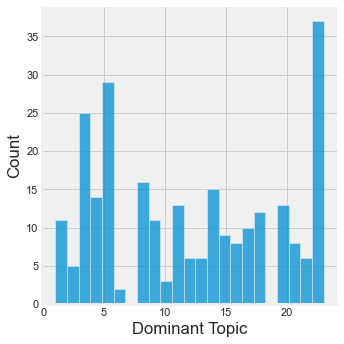

In [551]:
sns.displot(corpus_topic_df, x="Dominant Topic", bins=23)

In [552]:
corpus_topic_df['Dominant Topic'].value_counts()

23    37
5     29
3     25
8     16
14    15
4     14
11    13
20    13
18    12
1     11
9     11
17    10
15    9 
16    8 
21    8 
13    6 
22    6 
12    6 
2     5 
10    3 
6     2 
Name: Dominant Topic, dtype: int64

In [553]:
corpus_topic_df.describe()

,Dominant Topic,Contribution %,comp
count,259.000000,259.000000,259.000000
mean,12.081081,38.541274,0.447228
std,7.402414,13.836704,0.223215
min,1.000000,4.350000,0.025800
25%,5.000000,27.540000,0.307100
50%,12.000000,35.950000,0.439100
75%,18.000000,48.820000,0.624900
max,23.000000,80.870000,0.939300


Let's take the topics with 10 or more observations & all observations with a Contribution % above the 75% mark (48.82) & see how large that data frame is compared to the original.

In [ ]:
corpus_topic_df['Dominant Topic'].value_counts()

In [684]:
i_p = corpus_topic_df.copy()
i_p['above'] = corpus_topic_df['Dominant Topic'].value_counts() > 10
i_p = i_p.loc[(l['above'] > 0) | (i_p['Contribution %'] >= 48.82)]

In [685]:
i_p.head(2)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences,above
0,23,51.18,0.1779,"be, have, core, stability, global, unpopular, inspect, surveillance, mean, pass, erosion, come_force, hour, join, party, freedom_speech, local, before, direct, require","Hong Kong was always meant to have a security law, but could never pass one because it was so unpopular",NaN
1,11,24.04,0.5267,"have, investigate, be, respect, new_national_security_law, mean, so, scholar, drastically, hand, help, leadership, deal, banner, addition, nineteenth, fill, democracy, change, agent",So this is about China stepping in to ensure the city has a legal framework to deal with what it sees as serious challenges to its authority,True


In [686]:
i_p = i_p.drop(columns=['above'])

In [687]:
print("{:,}%".format(round(((len(i_p) / len(corpus_topic_df))*100),1)),'| Of the original dataframe','\n',
     len(i_p),'  | Observations','\n',
     i_p['Dominant Topic'].nunique(),'  | Topics','\n',
     round(i_p['Dominant Topic'].value_counts().mean(),1),' | Average number of observations per Topics')

28.2% | Of the original dataframe 
 73   | Observations 
 17   | Topics 
 4.3  | Average number of observations per Topics


A reasonable amount of the original data frame but a notable amount of Topics. Let's take a look.

In [688]:
# sending them to their own individual dataframes
i_p5 = i_p.loc[(i_p['Dominant Topic'] == 5)]
i_p23 = i_p.loc[(i_p['Dominant Topic'] == 23)]
i_p3 = i_p.loc[(i_p['Dominant Topic'] == 3)]
i_p14 = i_p.loc[(i_p['Dominant Topic'] == 14)]
i_p9 = i_p.loc[(i_p['Dominant Topic'] == 9)]
i_p20 = i_p.loc[(i_p['Dominant Topic'] == 20)]
i_p15 = i_p.loc[(i_p['Dominant Topic'] == 15)]
i_p1 = i_p.loc[(i_p['Dominant Topic'] == 1)]
i_p11 = i_p.loc[(i_p['Dominant Topic'] == 11)]
i_p4 = i_p.loc[(i_p['Dominant Topic'] == 4)]
i_p8 = i_p.loc[(i_p['Dominant Topic'] == 8)]
i_p21 = i_p.loc[(i_p['Dominant Topic'] == 21)]
i_p12 = i_p.loc[(i_p['Dominant Topic'] == 12)]
i_p13 = i_p.loc[(i_p['Dominant Topic'] == 13)]
i_p10 = i_p.loc[(i_p['Dominant Topic'] == 10)]
i_p18 = i_p.loc[(i_p['Dominant Topic'] == 18)]
i_p22 = i_p.loc[(i_p['Dominant Topic'] == 22)]


**RBL International Positive** | Reading Between the Lines on Topic 5

In [625]:
i_p5.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
23,5,47.34,0.3818,"be, stability, have, call, week, failure, do, year, pass, asylum, strive, central_government, tension, far, strengthen, enforcement, decide, british, openness, lawmaker",Article 60 makes it clear that anyone who works there does not have to abide by Hong Kong's laws


In [626]:
print(len(i_p5),'| These are the number of sentences to help read between the lines.')

12 | These are the number of sentences to help read between the lines.


In [661]:
i_p5['Sentences'].head(12)

23      Article 60 makes it clear that anyone who works there does not have to abide by Hong Kong's laws                                                                                                                                                                                                                                                                           
137     The people who need help are those in their teens and twenties, who were born after 1997                                                                                                                                                                                                                                                                                   
138     They don’t have any savings, or hope for the future                                                                                                                                                                                                     

These Sentences don't come across as Positive. Let's take another look at the Comp Scores for these.

In [672]:
print(" {:,}%".format(round((i_p5['comp'].mean()*100),2)),'| Average Comp Score','\n',
     "{:,}%".format(round((i_p5['comp'].min()*100),2)),'| Minimum Comp Score')

 48.23% | Average Comp Score 
 10.27% | Minimum Comp Score


Let's take a look at these individually.

In [673]:
i_p5.columns

Index(['Dominant Topic', 'Contribution %', 'comp', 'Topic Desc', 'Sentences'], dtype='object')

In [677]:
i_p5[['Dominant Topic', 'Contribution %', 'comp', 'Sentences']].sort_values(by=['comp'], ascending=True)

,Dominant Topic,Contribution %,comp,Sentences
254,5,51.19,0.1027,"By establishing a national security commissioner in Hong Kong whose office will not be under Hong Kong’s jurisdiction, by creating a parallel system of prosecution and trial, and by removing the barrier between the Hong Kong and mainland legal systems, the new law essentially represents a full-fledged “restructuring” of the “one country two systems” arrangement"
218,5,62.50,0.3182,"""Beijing's promise to the world that Hong Kong will have a high degree of autonomy is proven to be a lie,"" opposition legislator Ted Hui told the BBC's Newshour programme"
252,5,68.12,0.3400,"What began as a watery, versatile though determined movement of mass resistance was caught up in the flames of power politics"
23,5,47.34,0.3818,Article 60 makes it clear that anyone who works there does not have to abide by Hong Kong's laws
137,5,56.42,0.4019,"The people who need help are those in their teens and twenties, who were born after 1997"
138,5,76.09,0.4404,"They don’t have any savings, or hope for the future"
215,5,68.12,0.5267,They want to save their freedom and avoid being arrested
231,5,52.17,0.5267,Enjoying this article
255,5,52.17,0.5267,Enjoying this article
209,5,62.40,0.6317,"The territory was handed back to China from British control in 1997, but under a unique agreement supposed to protect certain freedoms that people in mainland China do not enjoy - including freedom of speech"


This Topic has a minimum Comp Score of 10.27% but an Average of 48.23% while seemingly Negative aside from "Enjoying this article" which shouldn't be there. I believe the following words move move this data into the positive category:
   * freedom, save, independence, savings, laws, promise, autonomy, etc.

The following sentences don't come across as Positive.

In [682]:
i_p5['Sentences'][[218,212,138,209,207]]

218     "Beijing's promise to the world that Hong Kong will have a high degree of autonomy is proven to be a lie," opposition legislator Ted Hui told the BBC's Newshour programme                                     
212     But Ted Hui, an opposition legislator, told the BBC: "Our rights are (being) taken away; our freedom is gone; our rule of law, our judicial independence is gone                                               
138     They don’t have any savings, or hope for the future                                                                                                                                                            
209     The territory was handed back to China from British control in 1997, but under a unique agreement supposed to protect certain freedoms that people in mainland China do not enjoy - including freedom of speech
207     There are also concerns over online freedom as internet providers might have to hand over data if requested by police           

Aside from my belief that these don't represent a Positive tone, I do believe:
   * **Not a Positive tone; Int'l News seems to outline Beijing's opinion**


**RBL International Positive** | Reading Between the Lines on Topic 23

In [627]:
i_p23.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
0,23,51.18,0.1779,"be, have, core, stability, global, unpopular, inspect, surveillance, mean, pass, erosion, come_force, hour, join, party, freedom_speech, local, before, direct, require","Hong Kong was always meant to have a security law, but could never pass one because it was so unpopular"


In [628]:
print(len(i_p23),'| These are the number of sentences to help read between the lines.')

11 | These are the number of sentences to help read between the lines.


In [660]:
i_p23['Sentences'].head(11)

0       Hong Kong was always meant to have a security law, but could never pass one because it was so unpopular                                                                            
3       She told the UN Human Rights Council hours before it came into force that it would fill a "gaping hole" and not undermine Hong Kong's autonomy or its independent judiciary        
60     \n\n\n\n\n\n\n\n\n\n                                Civic Party members during a press conference at the party headquarters in Hong Kong on July 30, 2020                           
78      Carrie Lam, Hong Kong's pro-Beijing chief executive, is a supporter of the law                                                                                                     
81     LoadingWithin two hours of the law being announced, the Government revealed special local police and justice department prosecution units had already been formed to enforce the law
89     China's explosive new national security lawFor two de

This Topic appears to be presented as Positive as well as it includes many Positive words; that said it does cover a few Topics; high-level summary below:
   * "She" said the law fills in missing holes & will not undermine HK's autonomy & supports the Law
     * "She" may be Carrie Lam
   * This may be outlining China's opinion
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **China's opinion & "She" supports the Law**


**RBL International Positive** | Reading Between the Lines on Topic 3

In [629]:
i_p3.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
9,3,45.31,0.6486,"be, hour, have, however, hand, investigate, asylum, call, basis, scholar, agent, speech, stability, commonplace, closely, nothingness, article, management, thing, where","Hong Kong was handed back to China from British control in 1997, but under a unique agreement - a mini-constitution called the Basic Law and a so-called ""one country, two systems"" principle"


In [630]:
print(len(i_p3),'| These are the number of sentences to help read between the lines.')

7 | These are the number of sentences to help read between the lines.


In [659]:
i_p3['Sentences'].head(7)

9       Hong Kong was handed back to China from British control in 1997, but under a unique agreement - a mini-constitution called the Basic Law and a so-called "one country, two systems" principle
11      Under the same agreement, Hong Kong had to enact is own national security law - this was set out in Article 23 of the Basic Law - but it never happened because of its unpopularity          
17      The legislation gives Beijing extensive powers it has never had before to shape life in the territory far beyond the legal system                                                            
69     \n\nSince Prime Minister Boris Johnson made that pledge, estate agents in London have observed a marked increase in requests for houses from Hong Kongers                                     
147     However, the unwavering insistence of China’s authorities on pushing through the Hong Kong National Security Law, and the speed of their revisions, exceeded the imagination of all observers
156     Ja

I also don't believe this Topic is Positive as it outlies:
   * Beijing now has extensive powers to shape lives
   * Beijing is efficient & speedy in moving the legislation 
   * Trust in the Police force plummeted to levels never previously observed
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Not Positive :: Beijing quickly moved the Law to have extensive powers while trust in the Police is falling quickly**


**RBL International Positive** | Reading Between the Lines on Topic 14

In [631]:
i_p14.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
14,14,52.17,0.4215,"year, be, mean, stability, help, discuss, shadow, serious, lead, report, diplomatic, encourage, trade, citizenship, creep, curtail, show, autonomy, spearhead, british",Reporting by the BBC's Grace Tsoi and Lam Cho Wai


In [632]:
print(len(i_p14),'| These are the number of sentences to help read between the lines.')

6 | These are the number of sentences to help read between the lines.


In [658]:
i_p14['Sentences'].head(6)

14      Reporting by the BBC's Grace Tsoi and Lam Cho Wai                                                                                                                                                                                                 
25      Zhang Xiaoming, of China's Hong Kong and Macau Affairs Office, said on Wednesday that the law would help return stability to the territory                                                                                                        
47     \n\n\n\nCritics of the new law say it effectively ends the autonomy of Hong Kong, which has existed under a "one country, two systems" agreement since the British gave Hong Kong back to China in 1997, which occurred 23 years ago from Wednesday
116    , Hong Kong’s autonomy was guaranteed under the “one country, two systems” agreement enshrined in the Sino-British Joint Declaration signed by then Chinese Premier Zhao Ziyang and British Prime Minister Margaret Thatcher                    

This Topic appears to be to cover the following Topics:
   * China's position on the Law
   * HK's history of autonomy & success
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **China's position on the Law & the use of Positive words**


**RBL International Positive** | Reading Between the Lines on Topic 9

In [633]:
i_p9.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
158,9,55.03,0.6369,"be, mean, stability, respect, so, have, convince, exceed, autonomous, call, do, year, decide, population, far, go, help, scholar, afterward, review",", In short, the Japanese government is going to have to show stronger resolve along with all the nations of the G7"


In [634]:
print(len(i_p9),'| These are the number of sentences to help read between the lines.')

5 | These are the number of sentences to help read between the lines.


In [657]:
i_p9['Sentences'].head(5)

158    , In short, the Japanese government is going to have to show stronger resolve along with all the nations of the G7                                                            
160     The issue of Hong Kong’s National Security Law is a test case for this, as Taiwan will be for future US-China relations                                                      
161     The issue of the National Security Law is a straightforward example of the clash of national interests between China and the Western order, including Japan                  
233     It was characterized by its display of solidarity between peaceful and forceful protesters (“brothers climbing the mountain together; don’t snitch and don’t split”)         
236     It referred not so much to independence as to a sense of a newfound community, in which solidarity was not simply a strategy but became the dominant ideology of the movement
Name: Sentences, dtype: object

This Topic appears to be to cover the following Topics:
   * The difference in opinion between the China & the West
   * Mention of solidarity of the Protestors
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **The positive tone is speaking about the protestors climbing a mountain in solidarity**


**RBL International Positive** | Reading Between the Lines on Topic 20

In [635]:
i_p20.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
7,20,52.18,0.34,"respect, so, demand, be, association, stability, help, government, judge, thus, circumvent, hour, stun, trust, mean, possibility, resolution, theory, public, uphold",Some pro-democracy activists - such as Joshua Wong - have been lobbying foreign governments to help their cause


In [636]:
print(len(i_p20),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [656]:
i_p20['Sentences'].head(4)

7       Some pro-democracy activists - such as Joshua Wong - have been lobbying foreign governments to help their cause                                                           
40      But the survey also indicated that public backing for street demonstrations had softened: Support for protests fell to 51 percent, down from 58 percent in a poll in March
226     Social trust in virtually all of Hong Kong’s institutions was deeply shaken, if not entirely destroyed                                                                    
243     Separate polls indicated the popularity of the chief executive also fell to unplumbed depths at 11 percent in late October                                                
Name: Sentences, dtype: object

This Topic appears to be based on the below:
   * Public opinion softening towards protestors
   * Great use of Positive words
   
Similar to the others whereby there are a number of positive words use but don't suggest positivity; one Positive one would be the below:
   * **Public support for the protestors softening**


**RBL International Positive** | Reading Between the Lines on Topic 15

In [637]:
i_p15.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
129,15,52.77,0.0772,"have, scholar, do, mean, hand, go, be, uphold, empress, incite, constitution, local, assembly, almost, discuss, retroactive, eligible, frustrate, memory, achieve","If they want to talk about collusion with foreign powers, it’s been going on for 150 years, hasn’t it"


In [638]:
print(len(i_p15),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [655]:
i_p15['Sentences'].head(4)

129     If they want to talk about collusion with foreign powers, it’s been going on for 150 years, hasn’t it                                                                                                      
144     Vice President Wang’s visit also involved his attendance at the accession ceremonies for the new emperor and empress as the special envoy of President Xi Jinping                                          
153     In recent years, China’s diplomatic ties with Japan have improved somewhat                                                                                                                                 
251     “Burning together” has turned out to be a two-edged sword, as Beijing, too, seems willing to accept the loss or significant reduction of Hong Kong’s role as an international financial and business center
Name: Sentences, dtype: object

Same as others, not much positivity with the exception of the below:
   * **China’s diplomatic ties with Japan have improved somewhat**


**RBL International Positive** | Reading Between the Lines on Topic 1

In [607]:
i_p1.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
20,1,37.14,0.3818,"be, matter, hard, route, formulation, how, infringement, closely, new_national_security_law, hunger, overdue, frustrate, involve, respect, stability, mean, statement, exceed, investigate, endorse",She was unable to give a clear answer


In [608]:
print(len(i_p1),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [654]:
i_p1['Sentences'].head(4)

20      She was unable to give a clear answer                                                                                
122    Hong Kong’s Security Law: How Should Japan Respond                                                                    
124     This National Security Law was immediately added to Annex III of Hong Kong’s Basic Law                               
141     “If the Japanese government were already being more active, there would be no need for us to be talking like this now
Name: Sentences, dtype: object

Nothing decisive to report:
   * **Nothing decisive**


**RBL International Positive** | Reading Between the Lines on Topic 11

In [651]:
i_p11.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
1,11,24.04,0.5267,"have, investigate, be, respect, new_national_security_law, mean, so, scholar, drastically, hand, help, leadership, deal, banner, addition, nineteenth, fill, democracy, change, agent",So this is about China stepping in to ensure the city has a legal framework to deal with what it sees as serious challenges to its authority


In [652]:
print(len(i_p11),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [653]:
i_p11['Sentences'].head(4)

1       So this is about China stepping in to ensure the city has a legal framework to deal with what it sees as serious challenges to its authority                                                                                                              
66     \n                              \n\n                                  Twitter/XinqiSu\n                                \n\nSome countries are committed to helping outTaiwan has surreptitiously tried to help activists and protesters stay in the country
165     There has been a mixture of concern for personal safety and defiance at the news                                                                                                                                                                          
185     He added on Twitter: "Stay strong, my friends                                                                                                                                                                          

Topics below:
   * Support for Tweeters to continue to help
   * This is not positive but belief that the Law is to ensure there's legal framework to maintain it's authority
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Only positive comment refers to a Tweet to the protestors to stay strong**


**RBL International Positive** | Reading Between the Lines on Topic 4

In [648]:
i_p4.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
4,4,51.09,0.3612,"be, year, investigate, discuss, have, stability, unpopular, hand, contemplate, comment, basis, focus, formulation, impact, sometimes, same, case, so, unanswered, call",She also promised it would not be retroactive


In [649]:
print(len(i_p4),'| These are the number of sentences to help read between the lines.')

4 | These are the number of sentences to help read between the lines.


In [650]:
i_p4['Sentences'].head(4)

4      She also promised it would not be retroactive                                                                                                                                                                                                           
5      Beijing has said Hong Kong should respect and protect rights and liberties while safeguarding national security - but many still fear the loss of Hong Kong's freedoms with this law                                                                    
6      "It is clear that the law will have a severe impact on freedom of expression, if not personal security, on the people of Hong Kong," Professor Johannes Chan, a legal scholar at the University of Hong Kong, told the BBC before the passage of the law
18     Analysis of the law by NPC Observer, a team of legal experts from the United States and Hong Kong, identified what they consider a number of worrying aspects                                                                    

This Topic does not appear positive with key Topics below:
   * Beijing's opinion on protecting liberties with a comment that many fear the loss of them
   * HK & Western concerns for the law
   
Nevertheless, there does seem to be a slightly connected theme on this Topic:
   * **Many positive words, Beijing's positive opinion with many Western concerns**


**RBL International Positive** | Reading Between the Lines on Topic 8

In [645]:
i_p8.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
8,8,32.37,0.4019,"have, be, respect, so, difference, help, send, year, discuss, demand, local, public, line, resolution, wish, bar, operate, far, thus, enforcement",He has now quit his Demosisto party


In [646]:
print(len(i_p8),'| These are the number of sentences to help read between the lines.')

3 | These are the number of sentences to help read between the lines.


In [647]:
i_p8['Sentences'].head(3)

8       He has now quit his Demosisto party                                                                                                                                                                                                                                                                                                                                                                               
238     On August 5, the day of the first general strike in Hong Kong since 1925, a first-page People’s Daily editorial laid out further red lines, which aimed to cow the divided pro-Beijing forces into submission: pro-establishment politicians were summoned to “take a stance,” businesses like Cathay Pacific and MTR Corporation were ordered to discipline their employees or face lockout from the China market
257    ”Sebastian Veg is a professor of contemporary history of China at EHESS (Paris), with a particular interest in intellectuals and public spheres                            

The only notable observation here is the below which isn't deemed as positive:
   * **HK companies ordered to discipline their employees or face lockout from the China market**


**RBL International Positive** | Reading Between the Lines on Topic 21

In [623]:
i_p21.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
27,21,62.3,0.128,"be, mean, mainland, strive, move, have, same, hand, target, hunger, return, democracy, region, fear, strengthen, index, colony, see, lose, ban","China’s Communist Party leaders have long worried about opposition to their rule in Hong Kong, which was a British colony until 1997"


In [624]:
print(len(i_p21),'| These are the number of sentences to help read between the lines.')

3 | These are the number of sentences to help read between the lines.


In [644]:
i_p21['Sentences'].head(3)

27      China’s Communist Party leaders have long worried about opposition to their rule in Hong Kong, which was a British colony until 1997
71      Courts in mainland China will have the power to hear some national security cases from Hong Kong                                    
196     Chinese courts, which are controlled by the Communist Party, have a close to 100% conviction rate                                   
Name: Sentences, dtype: object

This Topic does not appear positive with the basic summary below:
   * **Not sure it's positive but Mainland China courts to hear some national security cases which have a close to 100% conviction rate**


**RBL International Positive** | Reading Between the Lines on Topic 12

In [620]:
i_p12.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
174,12,52.17,0.2748,"still, autonomous, direct, speech, previously, action, base, intelligence, twice, unwavering, almost, human_right, activist, defence, surreptitiously, particularly, news, economic, own, sanction",Almost certainly


In [621]:
print(len(i_p12),'| These are the number of sentences to help read between the lines.')

2 | These are the number of sentences to help read between the lines.


In [642]:
i_p12['Sentences'].head(2)

174     Almost certainly             
175     But he is playing a long game
Name: Sentences, dtype: object

Nothing decisive:
   * **Nothing decisive or positive**

**RBL International Positive** | Reading Between the Lines on Topic 13

In [617]:
i_p13.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
53,13,68.12,0.34,"be, constitution, mean, stability, bar, unpopular, restore, staff, chant, certain, make, trade, inform, challenge, amount, oppose, democracy, crime, dissenter, agency","\n\nThursday, July 30, marked one month since China's new national security law came into force in Hong Kong"


In [618]:
print(len(i_p13),'| These are the number of sentences to help read between the lines.')

1 | These are the number of sentences to help read between the lines.


In [641]:
i_p13['Sentences'].head(1)

53    \n\nThursday, July 30, marked one month since China's new national security law came into force in Hong Kong
Name: Sentences, dtype: object

Nothing decisive:
   * **Nothing decisive or positive**

**RBL International Positive** | Reading Between the Lines on Topic 10

In [614]:
i_p10.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
31,10,52.17,0.25,"take, be, agency, century, stability, democracy, step, give, session, scholar, address, chant, structure, system, central, attitude, directly, china, copy, newspaper",Beijing imposes security agencies


In [615]:
print(len(i_p10),'| These are the number of sentences to help read between the lines.')

1 | These are the number of sentences to help read between the lines.


In [640]:
i_p10['Sentences'].head(1)

31     Beijing imposes security agencies
Name: Sentences, dtype: object

One sentence; the word security is positive:
   * **Beijing imposes security agencies**


**RBL International Positive** | Reading Between the Lines on Topic 18

In [611]:
i_p18.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
177,18,52.17,0.34,"help, be, loyalty, quit, enshrine, former, well, fear, western, mean, come_force, say, respect, security_legislation, unanswered, full_text, still, basic, eligible, export",Enter the security law


In [612]:
print(len(i_p18),'| These are the number of sentences to help read between the lines.')

1 | These are the number of sentences to help read between the lines.


In [639]:
i_p18['Sentences'].head(1)

177     Enter the security law
Name: Sentences, dtype: object

Nothing decisive:
   * **Nothing decisive**

**RBL International Positive** | Reading Between the Lines on Topic 22

In [609]:
i_p22.head(1)

,Dominant Topic,Contribution %,comp,Topic Desc,Sentences
216,22,52.17,0.3182,"be, stability, have, scholar, constitution, unpopular, previously, mean, core, hunger, side, serious, move, week, admit, discuss, reconsider, one, release, attention","Please delete everything on this chat, he wrote"


In [610]:
print(len(i_p22),'| These are the number of sentences to help read between the lines.')

1 | These are the number of sentences to help read between the lines.


In [ ]:
i_p22['Sentences'].head(1)

Nothing decisive:
   * **Nothing decisive**

**RBL Internaional Positive :: Summary** | This is the end of Reading Between the Lines on Internaional Positive

Here we will outline the individual summaries for each:
   * **Topic 5**  | Not a Positive tone; Int'l News seems to outline Beijing's opinion
   * **Topic 23**  | China's opinion & "She" supports the Law
   * **Topic 3**  | Not Positive :: Beijing quickly moved the Law to have extensive powers while trust in the Police is falling quickly
   * **Topic 14**  | China's position on the Law & the use of Positive words
   * **Topic 9**  | The positive tone is speaking about the protestors climbing a mountain in solidarity
   * **Topic 20**  | Public support for the protestors softening
   * **Topic 15**  | China’s diplomatic ties with Japan have improved somewhat
   * **Topic 11**  | Only positive comment refers to a Tweet to the protestors to stay strong
   * **Topic 4**  | Many positive words, Beijing's positive opinion with many Western concerns
   * **Topic 8**  | HK companies ordered to discipline their employees or face lockout from the China market
   * **Topic 21**  | Not sure it's positive but Mainland China courts to hear some national security cases which have a close to 100% conviction rate
   * **Topic 10**  | Beijing imposes security agencies

The following Topics presented nothing decisive and or positive:
   * **12,13,18 & 22**

Although there are positive comments herein, I believe the vast majority of those being classified as positive are outlining Beijing opinion while using words deemed as positive. I believe that, in a transparent way, is positive albeit I did not interpret that as an opinion on their part. 

Nevertheless, the Positive Section for International can be Summarized overall as:
   * Dominated with mentions of China's opinion & words which may be classified as Positive
   * Support for the Law from HK's legislator & Public
   * China’s diplomatic ties with Japan have improved 
   * Solidarity amongst protestors


Below we will show thirty (30) observations that encapsulate the International News Articles Positive Scores

We will highlight a sentence from each of the top identified themes within this Topic; we will begin with those deemed as Positive by themselves.

In [689]:
i_p_clean = i_p.copy()
i_p_top = pd.DataFrame([])
i_p_top = i_p_top.append([i_p_clean['Sentences'][78],i_p_clean['Sentences'][3],i_p_clean['Sentences'][233],i_p_clean['Sentences'][153],
                          i_p_clean['Sentences'][40]])
i_p_top.columns = ['Sentences']
i_p_top['Sentences']

0     Carrie Lam, Hong Kong's pro-Beijing chief executive, is a supporter of the law                                                                                             
1     She told the UN Human Rights Council hours before it came into force that it would fill a "gaping hole" and not undermine Hong Kong's autonomy or its independent judiciary
2     It was characterized by its display of solidarity between peaceful and forceful protesters (“brothers climbing the mountain together; don’t snitch and don’t split”)       
3     In recent years, China’s diplomatic ties with Japan have improved somewhat                                                                                                 
4     But the survey also indicated that public backing for street demonstrations had softened: Support for protests fell to 51 percent, down from 58 percent in a poll in March 
Name: Sentences, dtype: object

In [693]:
i_p_top['Sentences'][0][1:]

"Carrie Lam, Hong Kong's pro-Beijing chief executive, is a supporter of the law"

In [699]:
i_p_top['Sentences'][4][36:]

'public backing for street demonstrations had softened: Support for protests fell to 51 percent, down from 58 percent in a poll in March'

We will now highlight those with the use of Positive words and or outlining China's opinion which they may not deem in a positive manner.

In [690]:
i_p_q = i_p.copy()
i_p_q_l = pd.DataFrame([])
i_p_q_l = i_p_q_l.append([i_p_q['Sentences'][209],i_p_q['Sentences'][212],i_p_q['Sentences'][215],i_p_q['Sentences'][218],i_p_q['Sentences'][252],
                            i_p_q['Sentences'][117],i_p_q['Sentences'][241],i_p_q['Sentences'][17],i_p_q['Sentences'][147],i_p_q['Sentences'][0],                           
                            i_p_q['Sentences'][47],i_p_q['Sentences'][168],i_p_q['Sentences'][206],i_p_q['Sentences'][153],i_p_q['Sentences'][243],                           
                            i_p_q['Sentences'][160],i_p_q['Sentences'][243],i_p_q['Sentences'][233],i_p_q['Sentences'][71],i_p_q['Sentences'][196],                           
                            i_p_q['Sentences'][238],i_p_q['Sentences'][5],i_p_q['Sentences'][6],i_p_q['Sentences'][18]
])
i_p_q_l.columns = ['Sentences']
i_p_q_l['Sentences']

0      The territory was handed back to China from British control in 1997, but under a unique agreement supposed to protect certain freedoms that people in mainland China do not enjoy - including freedom of speech                                                                                                                                                                                                   
1      But Ted Hui, an opposition legislator, told the BBC: "Our rights are (being) taken away; our freedom is gone; our rule of law, our judicial independence is gone                                                                                                                                                                                                                                                  
2      They want to save their freedom and avoid being arrested                                                                                                                     

In [701]:
i_p_q_l['Sentences'][2][1:]

'They want to save their freedom and avoid being arrested'

In [707]:
i_p_q_l['Sentences'][3][38:150]

'Hong Kong will have a high degree of autonomy is proven to be a lie," opposition legislator Ted Hui told the BBC'

In [709]:
i_p_q_l['Sentences'][4][1:]

'What began as a watery, versatile though determined movement of mass resistance was caught up in the flames of power politics'

**RBL Final Summary** | Here we will highlight all four categories side by side to best understand on the news presented the Hong Kong National Security Law.

We will first run over **the process undertaken**:
   * We began by reviewing them all as one using an LDA Model & reviewing the Coherence Score
     * This yielded 82 Topics
       * <i>Just about all topics have overlap</i>
       * <i>Topics 21+ are the closest to the center & also are small enough to be deemed as irrelevant</i>
     * Due to these results we decided to look for ways to better identify subcategories
   * The Sentiment Intensity Analyzer Scores were brought in
     * Four (4) categories were identified & broken up into:
       * Negative | China
       * Negative | International
       * Positive | China
       * Positive | International
     * We took a further step whereby we separated each article by sentences to look at the sentences individually
   * We then identified that there ~24.6% that had a score of 0; meaning they scored neither Positive or Negative
     * A review of what those sentences contained presented an option deemed as fair to remove them
   * We then carried out the review on each of the four (4) categories
     * With the exception of China Negative, we decided to make cuts on the number of Topics at each point; cuts outlined below as we only took Topics with:
       * International Negative | 7+ observations
       * China Positive | 10+ observations
       * International Positive | A Contribution % of 48.8% or more

**We will now outline the findings for each of the four (4) categories** of the equally split News are found below:
   * **China Negative** | 10 Topics
     * The violence of protestors 
     * Foreign interference in China & HK's affairs
     * A misunderstanding of the pure intent of the National Security Law by the West 
     * China's firm belief that the National Security Law will lead to long term stability & prosperity in HK
       * <i>Which China believes the West perceives this as incorrect, ignoring or misunderstands it</i>
   * **International Negative** | 10 Topics
     * Their belief of the Law's infringement on Common Law 
     * Their credence towards the vagueness of the language used in the Law
     * Their position on the Law's potential ramifications
       * <i>They outline China's opinion as well</i>
     * The actions & tactics of police & protestors respectively
   * **China Positive** | 11 Topics
     * The Law is for safeguarding the majority of HK people 
     * Some of the international community are misinformed / making false accusations; they should stay out of China's internal affairs
       * 53 countries are in support of the Law
       * Carrie Lam & businesses support for the Law
     * The HK people are open to the Law & celebrating it
   * **International Positive** | 17 Topics
     * Dominated with mentions of China's opinion & words which may be classified as Positive
     * Support for the Law from HK's legislator & Public
     * China’s diplomatic ties with Japan have improved 
     * Solidarity amongst protestors


**We will outline it all together in a few sentences for each:**
   * The News falls into four (4) categories: 
     * #1 China Positive
       * China believes that the National Security Law will safeguard the majority of the people & bring long-term prosperity to HK as well. The HK gov't & businesses support the Law & the HK people are celebrating it.
     * #2 China Negative
       * The International community both misunderstands the purity of the Law & interfering in China's internal affairs
     * #3 International Negative
       * They believe the Law infringes on Common Law, is written in a vague enough way to allow Beijing to manipulate the Law in a way that represents their best interests while infringing on the freedom of the HK people.
     * #4 International Positive
       * The International News does mention China's position & a great number of positive words are used whereby they will come up as a positive sentence albeit are not interpreted as positive when reading. The positive comments here which are point blank positive are mentions of the protestors solidarity as well as mentions of the HK govt's support for the Law.

**We will now end it all together in a few sentences for both China & International News:**
   * **China** believes the Law will safeguard the majority of the people & bring long-term prosperity to HK as well; these are things the HK gov't, businesses support & HK people are celebrating it. The West misunderstands China's intent & wish they would stay out of China's affairs; i.e. not the affairs of the West.
   * **International News** believe the Law infringes on Common Law, is written in a vague enough way to allow Beijing to manipulate the Law in a way that represents their best interests while infringing on the freedom of the HK people. Aside from mentioning China's position & the HK govt's support for the Law, there was not much positivity towards the Law itself.

Please note, this Data Science project was completed in August 2021 but the data is from June - Aug 2020. Much may have changed but that would fall outside the scope of this project.